In [ ]:
### Notebook for exploratory data analysis on the enriched VOC personnel dataset
### to run this notebook, first you need to download data from https://zenodo.org/records/10599528

### Author: jiaqi.zhu@dh.huc.knaw.nl 

## 1. Load the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import string
import re
from itertools import combinations

In [2]:
# First, let's read in voc_persons_contracts dataset
import pandas as pd
df_voc_persons_contracts = pd.read_csv('/Users/zhujiaqi/Downloads/VOC_Dataset/enriched/voc_persons_contracts.csv')
print(len(df_voc_persons_contracts))

774200


In [3]:
df_voc_persons_contracts.head(5)

vocop_id               full_name place_of_origin  place_id  \
0    104944  Adriaen van Renteregem       Wassenaar  141865.0   
1    104945  Adriaen van der Meulen  Cooltiensplate   25576.0   
2    104946        Arnoldus Coutrel       Antwerpen    6486.0   
3    104947          Albert Coolman       Amsterdam    5532.0   
4    104948          Anthonij Bonel       Amsterdam    5532.0   

   disambiguated_person  person_cluster_id  person_cluster_row    rank  \
0                     1           415682.0                 NaN  sailor   
1                     1           406243.0                 NaN  sailor   
2                     1                1.0                 1.0  sailor   
3                     1            77235.0                 NaN  sailor   
4                     1            65732.0                 NaN  sailor   

   rank_corrected  rank_id  ... location_end_contract outward_voyage_id  \
0               0    123.0  ...             Concordia           92895.0   
1               0    123.0  ...              Theeboom           92895.0   
2               0    123.0  ...             Westhoven           92895.0   
3               0    123.0  ...           Huis te Loo           92895.0   
4               0    123.0  ...                  Azie           92895.0   

  changed_ship_at_cape changed_ship_at_cape_voyage_id  return_voyage_id  \
0                  NaN                            NaN           96993.0   
1                  NaN                            NaN           96942.0   
2                  NaN                            NaN           97025.0   
3                  NaN                            NaN               NaN   
4                  NaN                            NaN               NaN   

  remark  source_id             source_reference  \
0    NaN       3339  NL-HaNA/1.04.02/12674//62//   
1    NaN       3339  NL-HaNA/1.04.02/12674//63//   
2    NaN       3339  NL-HaNA/1.04.02/12674//64//   
3    NaN       3339  NL-HaNA/1.04.02/12674//65//   
4    NaN       3339  NL-HaNA/1.04.02/12674//66//   

                                    uid  \
0  c1655f64-c864-11e6-9d8b-00505693001d   
1  c1657314-c864-11e6-9d8b-00505693001d   
2  c1657e36-c864-11e6-9d8b-00505693001d   
3  c1658534-c864-11e6-9d8b-00505693001d   
4  c1658cc8-c864-11e6-9d8b-00505693001d   

                                      scan_permalink  
0  http://hdl.handle.net/10648/d04d23d7-3f16-3c08...  
1  http://hdl.handle.net/10648/abe75b24-3e7a-a30d...  
2  http://hdl.handle.net/10648/03b1015d-852e-696f...  
3  http://hdl.handle.net/10648/f075954e-4767-2254...  
4  http://hdl.handle.net/10648/475356ff-ca74-e1da...  

[5 rows x 27 columns]

In [4]:
df_voc_persons_contracts.shape

(774200, 27)

In [5]:
df_voc_persons_contracts['place_of_origin'].describe()

count        769891
unique       152312
top       Amsterdam
freq         108213
Name: place_of_origin, dtype: object

In [6]:
df_voc_persons_contracts['rank'].describe()

count      774198
unique        200
top       soldier
freq       219841
Name: rank, dtype: object

In [7]:
df_voc_persons_contracts['date_begin_contract'].describe()

count         773943
unique          1732
top       1737-03-10
freq            4120
Name: date_begin_contract, dtype: object

In [8]:
df_voc_persons_contracts['date_begin_contract'].value_counts()

date_begin_contract
1737-03-10    4120
1761-12-12    3820
1756-02-02    2939
1761-01-27    2826
1754-11-02    2716
              ... 
1758-03-18       1
1760-09-12       1
1750-08-29       1
1749-11-26       1
1794-10-03       1
Name: count, Length: 1732, dtype: int64

In [9]:
df_voc_persons_contracts.sort_values(by='date_begin_contract', ascending=False)

vocop_id            full_name   place_of_origin  place_id  \
772681   1650828         Johan Maijer  Pest in ungarien  104225.0   
147751    383610  Everhard Milskemper           Kosveld   71903.0   
147745    383604      Andreas Moerman        Gergavigen   47417.0   
147746    383605   Andreas Dusterdich          Hannover   54845.0   
147747    383606    Cornelis Kleinold        Maassluijs   81973.0   
...          ...                  ...               ...       ...   
769452   1647561  Jan Eldersz Doncker         Amsterdam    5532.0   
769453   1647562         Jonas Adamsz              Valo  136664.0   
769454   1647563       Jan Huijbertsz       Langestraat   74598.0   
769455   1647564           Jan Aartsz         Amsterdam    5532.0   
769456   1647565        Jan Leendersz         Amsterdam    5532.0   

        disambiguated_person  person_cluster_id  person_cluster_row  \
772681                     0                NaN                 NaN   
147751                     0                NaN                 NaN   
147745                     0                NaN                 NaN   
147746                     1           239294.0                 NaN   
147747                     1           298883.0                 NaN   
...                      ...                ...                 ...   
769452                     0                NaN                 NaN   
769453                     0                NaN                 NaN   
769454                     0                NaN                 NaN   
769455                     0                NaN                 NaN   
769456                     0                NaN                 NaN   

               rank  rank_corrected  rank_id  ... location_end_contract  \
772681      soldier               0    171.0  ...              Onbekend   
147751      soldier               0    171.0  ...                  Azie   
147745      soldier               0    171.0  ...                  Azie   
147746      soldier               0    171.0  ...    Kaap de Goede Hoop   
147747      soldier               0    171.0  ...                  Azie   
...             ...             ...      ...  ...                   ...   
769452  ship gunner               0    163.0  ...              Onbekend   
769453  ship gunner               0    163.0  ...              Onbekend   
769454  ship gunner               0    163.0  ...              Onbekend   
769455  ship gunner               0    163.0  ...              Onbekend   
769456  ship gunner               0    163.0  ...            Waalstroom   

       outward_voyage_id changed_ship_at_cape changed_ship_at_cape_voyage_id  \
772681           95826.0                  NaN                            NaN   
147751           95823.0                  NaN                            NaN   
147745           95823.0                  NaN                            NaN   
147746           95823.0                  NaN                            NaN   
147747           95823.0                  NaN                            NaN   
...                  ...                  ...                            ...   
769452               NaN                  NaN                            NaN   
769453               NaN                  NaN                            NaN   
769454               NaN                  NaN                            NaN   
769455               NaN                  NaN                            NaN   
769456               NaN                  NaN                            NaN   

        return_voyage_id             remark  source_id  \
772681               NaN                NaN     150270   
147751               NaN                NaN       3976   
147745               NaN                NaN       3976   
147746               NaN                NaN       3976   
147747               NaN                NaN       3976   
...                  ...                ...        ...   
769452               NaN  vanuit monsterrol       5343   


In [10]:
df_voc_persons_contracts['date_begin_contract']

0         1700-05-05
1         1700-05-05
2         1700-05-05
3         1700-05-05
4         1700-05-05
             ...    
774195    1782-09-02
774196    1782-09-02
774197    1782-09-02
774198    1782-09-02
774199    1794-10-03
Name: date_begin_contract, Length: 774200, dtype: object

In [11]:
df_voc_persons_contracts['date_end_contract'].describe()

count         703211
unique         43594
top       1715-08-06
freq            2505
Name: date_end_contract, dtype: object

In [12]:
df_voc_persons_contracts.sort_values(by='date_end_contract', ascending=False)

vocop_id                   full_name       place_of_origin  place_id  \
226747    625020  Harmanus Wighert Spanjaart            Leeuwaarde   76006.0   
624508   1408095            Micgiel Rombouts               Rostock  113100.0   
232118    630391         Johan Andreas Ouwen            Northausen   95980.0   
136449    372276           Christiaan Davids                Appels    6645.0   
647189   1430988               Coenraad Berg             Amsterdam    5532.0   
...          ...                         ...                   ...       ...   
774193   1652340              Pascal Janzele   Abbeville, picardie    2329.0   
774194   1652341                  Louis Bale  Juveguij, normandije   67374.0   
774195   1652342                  Jean Mezek  Juvignij, normandije   67376.0   
774196   1652343              Francois Epman    Munster, allemagne   90131.0   
774199   1652346               Jan Hanselaar             Amsterdam    5532.0   

        disambiguated_person  person_cluster_id  person_cluster_row  \
226747                     1           219417.0                 NaN   
624508                     1           312184.0                 NaN   
232118                     1           377355.0                 NaN   
136449                     1           472596.0                 NaN   
647189                     1            62563.0                 NaN   
...                      ...                ...                 ...   
774193                     1           454719.0                 NaN   
774194                     0                NaN                 NaN   
774195                     0                NaN                 NaN   
774196                     0                NaN                 NaN   
774199                     0                NaN                 NaN   

                          rank  rank_corrected  rank_id  ...  \
226747                 drummer               0     55.0  ...   
624508                  sailor               0    123.0  ...   
232118                 soldier               0    171.0  ...   
136449                 soldier               0    171.0  ...   
647189  junior ordinary seaman               0     88.0  ...   
...                        ...             ...      ...  ...   
774193                corporal               0     52.0  ...   
774194                fusilier               0     70.0  ...   
774195                fusilier               0     70.0  ...   
774196                fusilier               0     70.0  ...   
774199                  sailor               0    123.0  ...   

       location_end_contract outward_voyage_id changed_ship_at_cape  \
226747                  Azie           93797.0                   Ja   
624508                  Azie           93067.0                   Ja   
232118                  Azie           93692.0                  NaN   
136449                  Azie           95520.0                  NaN   
647189                  Azie           95522.0                  NaN   
...                      ...               ...                  ...   
774193            Vredenburg               NaN                  NaN   
774194            Vredenburg               NaN                  NaN   
774195            Vredenburg               NaN                  NaN   
774196            Vredenburg               NaN                  NaN   
774199                  Siam               NaN                  NaN   

       changed_ship_at_cape_voyage_id  return_voyage_id  \
226747                        93793.0               NaN   
624508                        93063.0               NaN   
232118                            NaN               NaN   
136449                            NaN               NaN   
647189                            NaN               NaN   
...                               ...               ...   
774193                            NaN               NaN   
774194                            NaN               NaN   
774195                            NaN    

In [13]:
df_voc_persons_contracts['date_end_contract']

0         1704-08-11
1         1701-01-04
2         1706-07-26
3         1700-08-05
4         1707-06-30
             ...    
774195           NaN
774196           NaN
774197    1787-06-16
774198    1787-06-16
774199           NaN
Name: date_end_contract, Length: 774200, dtype: object

In [14]:
df_voc_persons_contracts['contract_length'].describe()

count    703031.00000
mean       1298.56159
std        2022.29076
min     -218883.00000
25%         314.00000
50%         676.00000
75%        1607.00000
max      474295.00000
Name: contract_length, dtype: float64

In [15]:
df_voc_persons_contracts['reason_end_contract'].describe()

count       774200
unique          32
top       Deceased
freq        366419
Name: reason_end_contract, dtype: object

In [16]:
df_voc_persons_contracts['location_end_contract'].describe()

count     774194
unique      2786
top         Azie
freq      370140
Name: location_end_contract, dtype: object

## 2. merge "voc_persons_contracts.csv" with "voc_ranks.csv"

In [17]:
df_voc_ranks = pd.read_csv('/Users/zhujiaqi/Downloads/VOC_Dataset/enriched/voc_ranks.csv')
print(len(df_voc_ranks))

200


In [18]:
df_contracts_ranks = pd.merge(df_voc_persons_contracts, df_voc_ranks, on = "rank_id")
len(df_contracts_ranks)

774063

In [19]:
df_contracts_ranks.head(5)

vocop_id               full_name place_of_origin  place_id  \
0    104944  Adriaen van Renteregem       Wassenaar  141865.0   
1    104945  Adriaen van der Meulen  Cooltiensplate   25576.0   
2    104946        Arnoldus Coutrel       Antwerpen    6486.0   
3    104947          Albert Coolman       Amsterdam    5532.0   
4    104948          Anthonij Bonel       Amsterdam    5532.0   

   disambiguated_person  person_cluster_id  person_cluster_row  rank_x  \
0                     1           415682.0                 NaN  sailor   
1                     1           406243.0                 NaN  sailor   
2                     1                1.0                 1.0  sailor   
3                     1            77235.0                 NaN  sailor   
4                     1            65732.0                 NaN  sailor   

   rank_corrected  rank_id  ...  rank_y parent_rank category subcategory  \
0               0    123.0  ...  sailor      sailor      SEA     sailors   
1               0    123.0  ...  sailor      sailor      SEA     sailors   
2               0    123.0  ...  sailor      sailor      SEA     sailors   
3               0    123.0  ...  sailor      sailor      SEA     sailors   
4               0    123.0  ...  sailor      sailor      SEA     sailors   

     hisco                                          hisco_uri  rank_nl  \
0  98140.0  https://iisg.amsterdam/resource/hisco/code/his...  matroos   
1  98140.0  https://iisg.amsterdam/resource/hisco/code/his...  matroos   
2  98140.0  https://iisg.amsterdam/resource/hisco/code/his...  matroos   
3  98140.0  https://iisg.amsterdam/resource/hisco/code/his...  matroos   
4  98140.0  https://iisg.amsterdam/resource/hisco/code/his...  matroos   

                                 rank_description_nl  \
0  waak- en roergang; laden en lossen; reinigen, ...   
1  waak- en roergang; laden en lossen; reinigen, ...   
2  waak- en roergang; laden en lossen; reinigen, ...   
3  waak- en roergang; laden en lossen; reinigen, ...   
4  waak- en roergang; laden en lossen; reinigen, ...   

                                rank_description_eng median_wage  
0  (dutch: matroos) watch and helmansman duties; ...        11.0  
1  (dutch: matroos) watch and helmansman duties; ...        11.0  
2  (dutch: matroos) watch and helmansman duties; ...        11.0  
3  (dutch: matroos) watch and helmansman duties; ...        11.0  
4  (dutch: matroos) watch and helmansman duties; ...        11.0  

[5 rows x 37 columns]

In [20]:
# Group by rank to see which were dominant
df_contracts_ranks['rank_x'].value_counts()

rank_x
soldier                          219841
sailor                           175296
ship gunner                       97004
junior ordinary seaman            38023
ship's boy (orig.: hooploper)     36861
                                  ...  
cavalry captain                       1
recruit                               1
second sail maker                     1
commander colonel                     1
second colonel                        1
Name: count, Length: 196, dtype: int64

In [21]:
# group by parent_rank to see which were dominant
df_contracts_ranks['parent_rank'].value_counts()

parent_rank
sailor                   274455
soldier                  241025
junior sailor             96036
junior ship carpenter     16500
(unknown)                 11177
                          ...  
officer                       6
senior boatswain              5
midwife                       3
cavalry captain               1
commander colonel             1
Name: count, Length: 106, dtype: int64

In [22]:
# group by category to see which were dominant
df_contracts_ranks['category'].value_counts()

category
SEA         409272
MILITARY    262926
SHIP         59014
OTHER        18520
MEDICAL      10050
TRADE         3097
Name: count, dtype: int64

In [23]:
# group by sub_category
df_contracts_ranks['subcategory'].value_counts()

subcategory
sailors                               370491
soldiers                              244066
craftsmen                              31361
non-commissioned officers              23599
food and service                       20603
non-commissioned military officers     16124
officers                               15164
order                                  13102
medical                                12419
other                                  11454
craftsmen (on shore)                    7238
trade                                   3097
military craftsmen                      2322
musicians                               1844
general                                  541
military officers                        414
general (on shore)                       173
stowaway                                  33
Asian sailors                             18
Name: count, dtype: int64

In [24]:
df_contracts_ranks['median_wage'].describe()

count    773614.000000
mean         11.990034
std           7.731414
min           7.000000
25%           9.000000
50%          11.000000
75%          11.000000
max         192.500000
Name: median_wage, dtype: float64

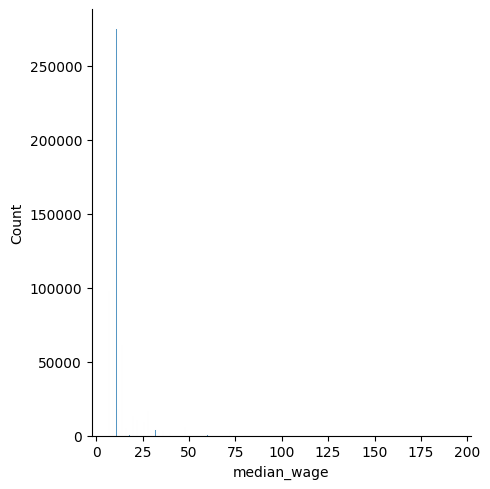

In [25]:
sns.displot(x='median_wage', data=df_contracts_ranks)

In [26]:
# Analyze whether certain categories had longer or shorter contracts.
df_contracts_ranks.groupby('category')['contract_length'].mean()

category
MEDICAL     1238.314743
MILITARY    1713.107912
OTHER       1255.295042
SEA         1055.768841
SHIP        1068.324942
TRADE       2602.280055
Name: contract_length, dtype: float64

In [27]:
# Analyze whether certain subcategories had longer or shorter contracts.
df_contracts_ranks.groupby('subcategory')['contract_length'].mean()

subcategory
Asian sailors                          300.333333
craftsmen                             1164.961646
craftsmen (on shore)                  1269.258415
food and service                       965.886509
general                               2852.611111
general (on shore)                    2208.327044
medical                               1236.258904
military craftsmen                    1232.229111
military officers                     2050.977918
musicians                             1253.398451
non-commissioned military officers    1646.282193
non-commissioned officers              973.052529
officers                               964.231328
order                                 1001.809344
other                                 1206.284192
sailors                               1064.853276
soldiers                              1721.647508
stowaway                               532.687500
trade                                 2602.280055
Name: contract_length, dtype: float64

In [28]:
# Analyze whether certain ranks had longer or shorter contracts.
df_contracts_ranks.groupby('rank_x')['contract_length'].mean()

rank_x
(all occupations)         194.000000
(house)painter           1255.705882
(other)                  1433.900000
(unknown)                1188.014644
appointee                1413.231884
                            ...     
weapons master            888.092522
weapons-master's mate    1136.829103
weapons-woodworker       1426.270270
wheel maker              1044.953488
windmill maker           1185.963768
Name: contract_length, Length: 196, dtype: float64

In [29]:
# Analyze whether certain parent_ranks had longer or shorter contracts.
df_contracts_ranks.groupby('parent_rank')['contract_length'].mean()

parent_rank
(all occupations)     194.000000
(house)painter       1255.705882
(other)              1433.900000
(unknown)            1188.014644
appointee            1413.231884
                        ...     
water maker           907.593909
weapon maker         1240.963636
weapons master        892.018765
wheel maker          1044.953488
windmill maker       1185.963768
Name: contract_length, Length: 106, dtype: float64

In [30]:
# Analyze whether certain categories had higher or lower wages.
df_contracts_ranks.groupby('category')['median_wage'].mean()

category
MEDICAL     25.831841
MILITARY     9.480654
OTHER       18.900974
SEA         11.507242
SHIP        20.758837
TRADE       36.170165
Name: median_wage, dtype: float64

In [31]:
# Analyze whether certain subcategories had higher or lower wages.
df_contracts_ranks.groupby('subcategory')['median_wage'].mean()

subcategory
Asian sailors                                NaN
craftsmen                              24.549695
craftsmen (on shore)                   14.585844
food and service                       16.192690
general                                83.678373
general (on shore)                    192.500000
medical                                25.496095
military craftsmen                     13.801895
military officers                      57.211796
musicians                              16.000000
non-commissioned military officers     14.454348
non-commissioned officers              16.362558
officers                               41.676866
order                                  15.757289
other                                  12.153053
sailors                                 9.963149
soldiers                                9.038727
stowaway                                     NaN
trade                                  36.170165
Name: median_wage, dtype: float64

In [32]:
# Analyze whether certain ranks had higher or lower wages.
df_contracts_ranks.groupby('rank_x')['median_wage'].mean()

rank_x
(all occupations)         NaN
(house)painter           14.0
(other)                  22.0
(unknown)                12.0
appointee                10.0
                         ... 
weapons master           22.0
weapons-master's mate    14.0
weapons-woodworker       14.0
wheel maker              14.0
windmill maker           14.0
Name: median_wage, Length: 196, dtype: float64

In [33]:
# Analyze whether certain parent ranks had higher or lower wages.
df_contracts_ranks.groupby('parent_rank')['median_wage'].mean()

parent_rank
(all occupations)     NaN
(house)painter       14.0
(other)              22.0
(unknown)            12.0
appointee            10.0
                     ... 
water maker          18.0
weapon maker         14.0
weapons master       22.0
wheel maker          14.0
windmill maker       14.0
Name: median_wage, Length: 106, dtype: float64

a. visualize: Crew Composition Proportion per Ship (by Category)

<Figure size 1400x1000 with 0 Axes>

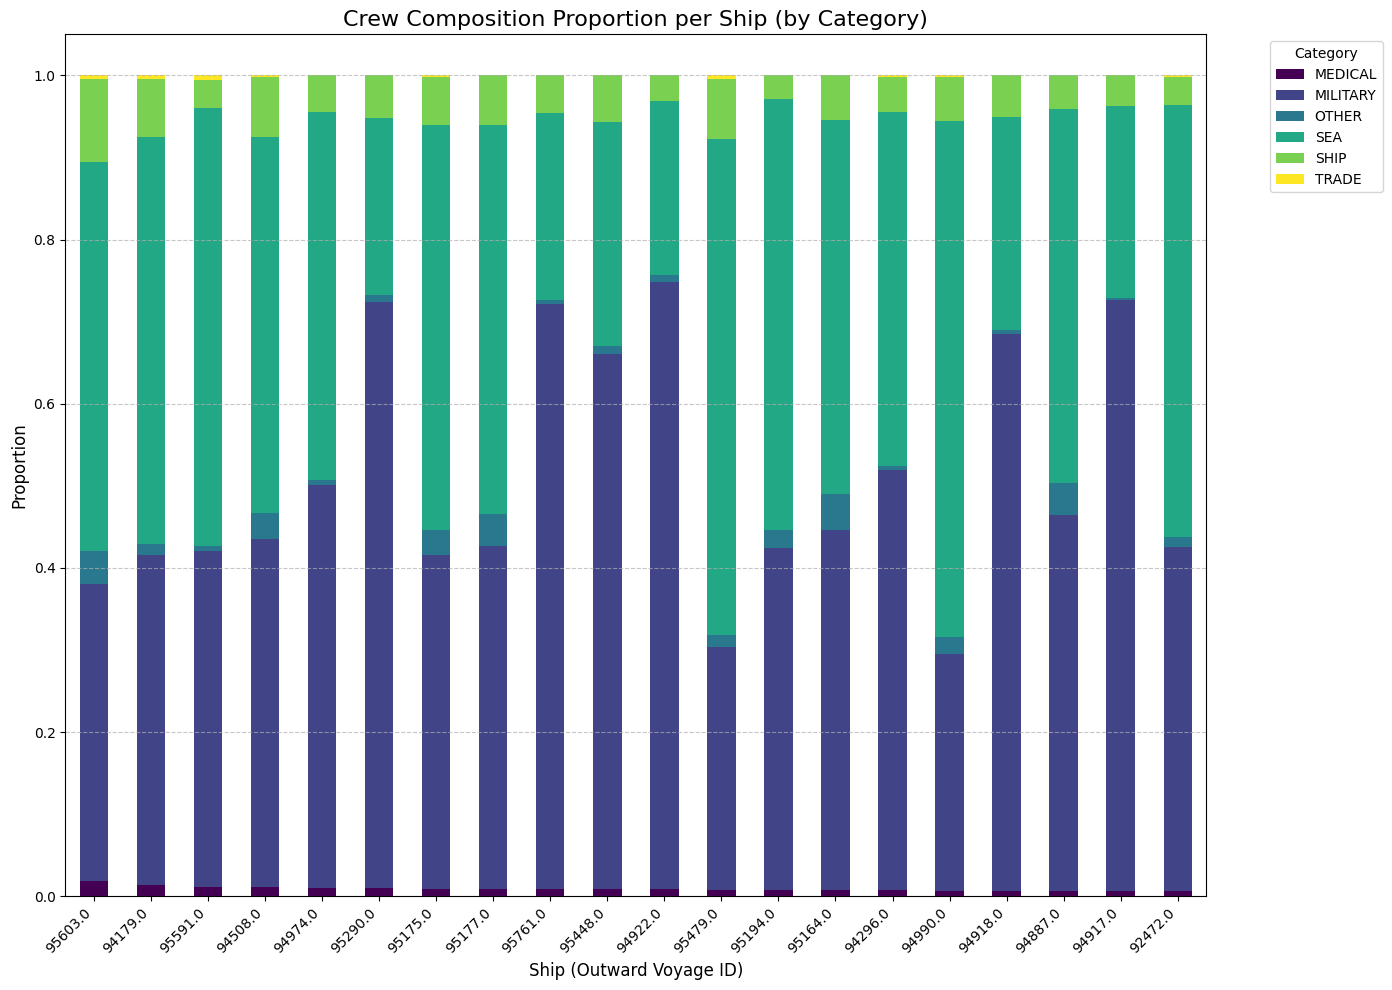

In [34]:
# visualization 1 
# Group by voyage_id and category to get crew composition

# We'll use outward_voyage_id as the ship identifier
ship_composition = df_contracts_ranks.groupby(['outward_voyage_id', 'category']).size().reset_index(name='count')

# Calculate proportions within each ship
# First get the total crew count per ship
ship_totals = ship_composition.groupby('outward_voyage_id')['count'].sum().reset_index(name='total')
# Then merge back and calculate proportion
ship_composition = pd.merge(ship_composition, ship_totals, on='outward_voyage_id')
ship_composition['proportion'] = ship_composition['count'] / ship_composition['total']

# Clean and prepare data for visualization
# Remove any ships with missing categories
ship_composition = ship_composition.dropna(subset=['category'])
# Limit to top 20 ships by crew size for better visualization
top_ships = ship_totals.sort_values('total', ascending=False).head(20)['outward_voyage_id'].tolist()
ship_composition_filtered = ship_composition[ship_composition['outward_voyage_id'].isin(top_ships)]

# Create visualization - Stacked bar chart
plt.figure(figsize=(14, 10))
# Pivot the data to create a matrix suitable for stacked bars
pivot_data = ship_composition_filtered.pivot_table(
    index='outward_voyage_id', 
    columns='category', 
    values='proportion', 
    fill_value=0
)

# Sort by the most common category (if applicable)
if not pivot_data.empty and len(pivot_data.columns) > 0:
    most_common_category = ship_composition_filtered['category'].value_counts().index[0]
    if most_common_category in pivot_data.columns:
        pivot_data = pivot_data.sort_values(by=most_common_category, ascending=False)

# Create the stacked bar chart
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(14, 10), colormap='viridis')
plt.title('Crew Composition Proportion per Ship (by Category)', fontsize=16)
plt.xlabel('Ship (Outward Voyage ID)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels
# This is optional and can be complex for stacked bars
# Uncommented for now as it can get cluttered

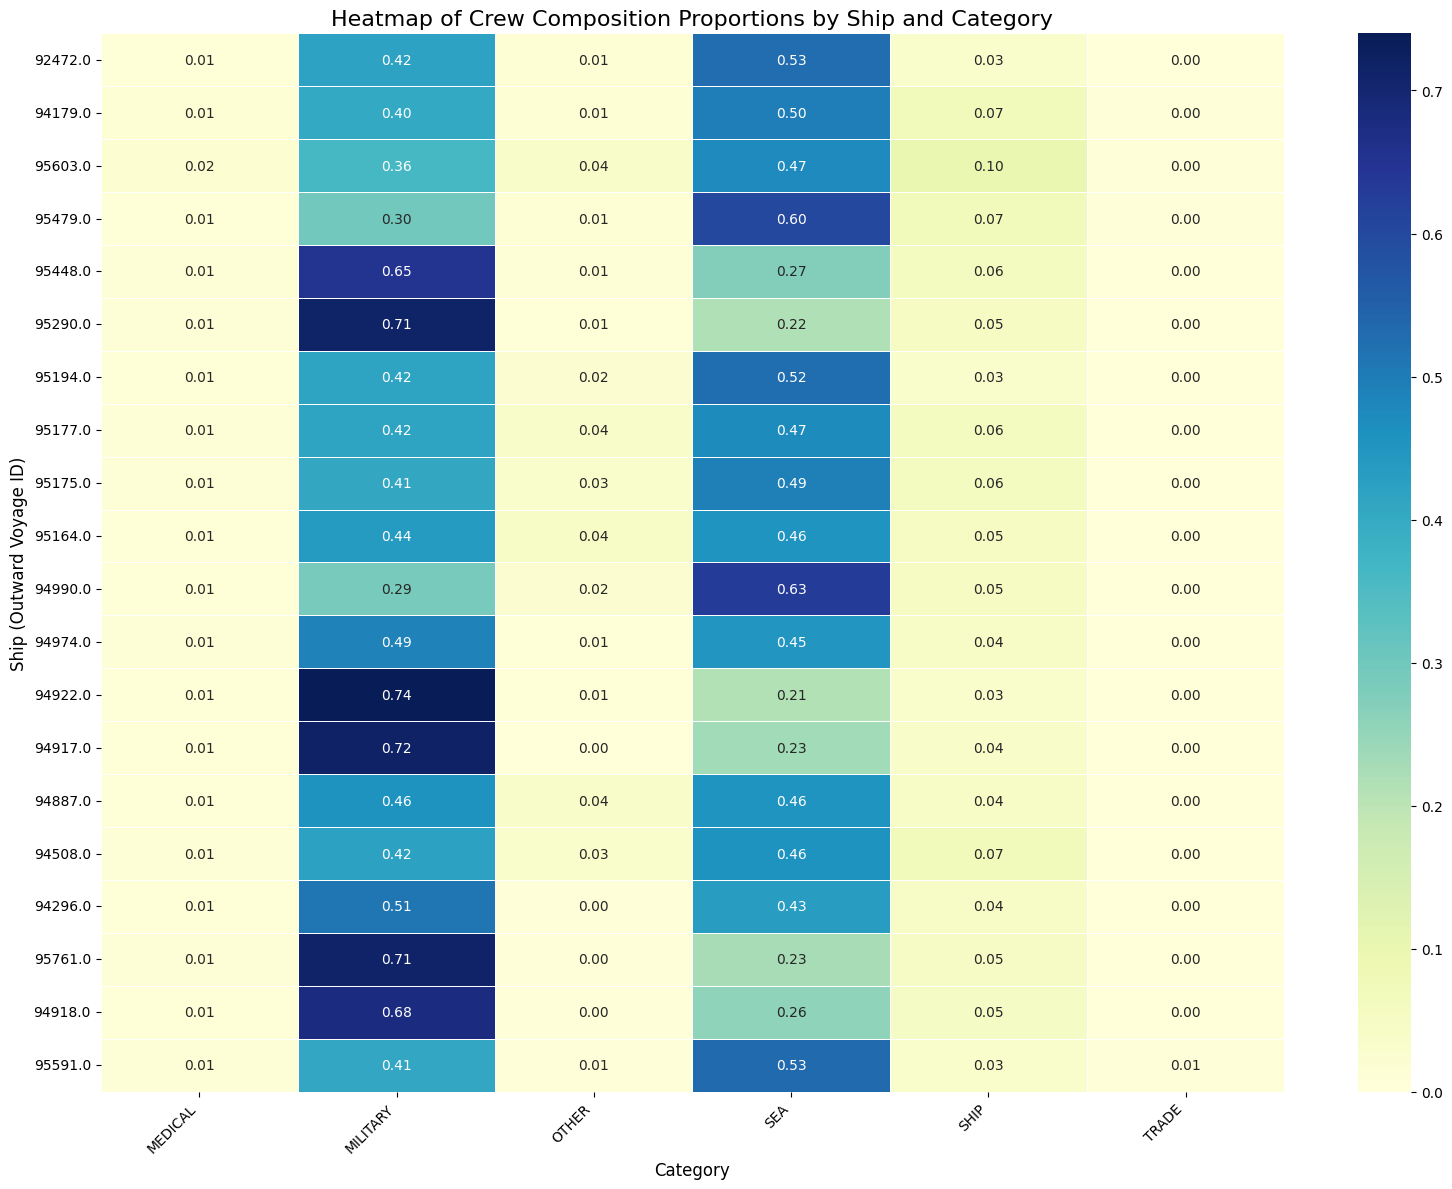

In [35]:
# visualization 2
# Create a second visualization - Heatmap of categories across ships
plt.figure(figsize=(16, 12))
pivot_for_heatmap = ship_composition_filtered.pivot_table(
    index='outward_voyage_id', 
    columns='category', 
    values='proportion', 
    fill_value=0
)

# Sort rows and columns for better visualization
if not pivot_for_heatmap.empty:
    # Sort ships by their total crew size
    pivot_for_heatmap = pivot_for_heatmap.loc[pivot_for_heatmap.sum(axis=1).sort_values(ascending=False).index]

sns.heatmap(pivot_for_heatmap, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Crew Composition Proportions by Ship and Category', fontsize=16)
plt.ylabel('Ship (Outward Voyage ID)', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

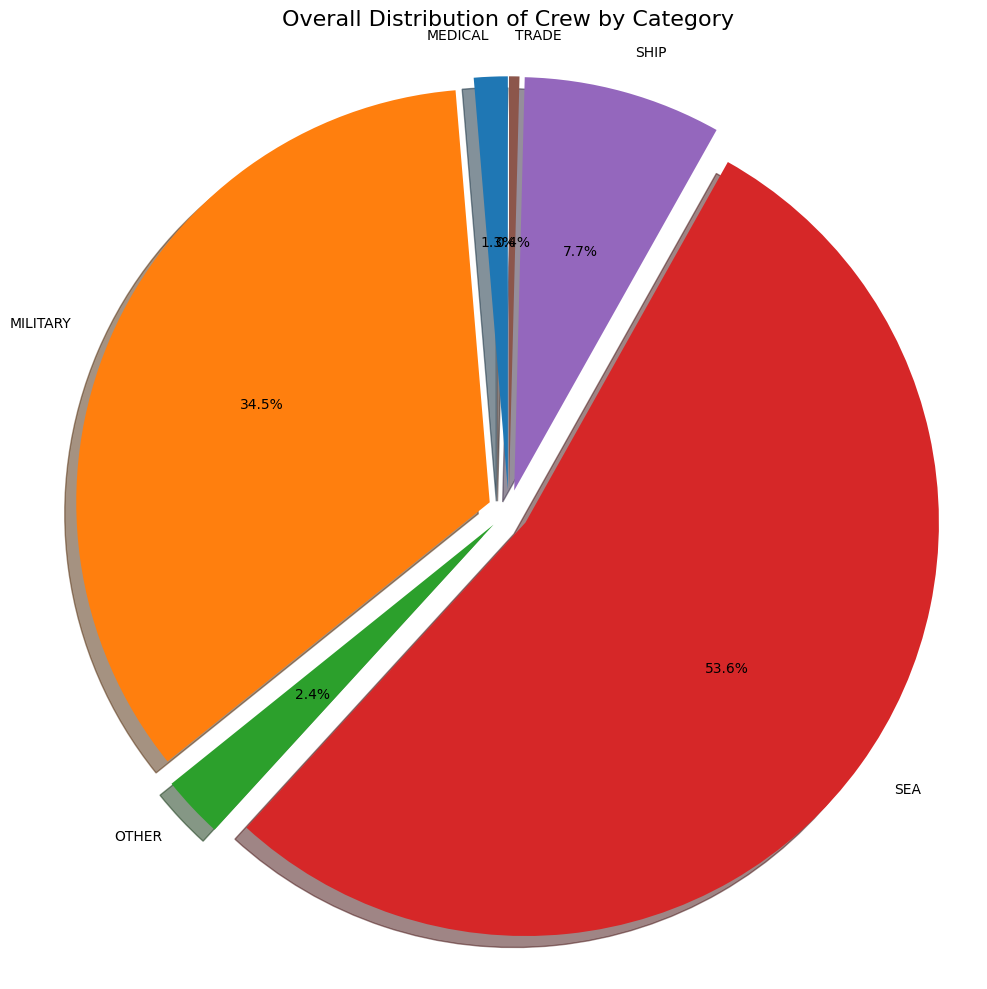

In [36]:
# visualization 3
# Create a pie chart for overall category distribution
plt.figure(figsize=(10, 10))
overall_composition = df_contracts_ranks.groupby('category').size()
plt.pie(overall_composition, labels=overall_composition.index, autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=[0.05]*len(overall_composition))
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.title('Overall Distribution of Crew by Category', fontsize=16)
plt.tight_layout()

b. Visualizing VOC Crew Composition Proportion by Year


Date range in the data:
Earliest start date: 1678-02-07 00:00:00
Latest end date: 1915-12-31 00:00:00

Crew composition by year (first few years):
   Year   MEDICAL  MEDICAL_count  MILITARY  MILITARY_count     OTHER  \
0  1678  0.007843              2  0.368627              94  0.094118   
1  1679  0.009901              5  0.366337             185  0.071287   
2  1680  0.009680             13  0.374535             503  0.029784   
3  1681  0.011129             28  0.334658             842  0.012719   
4  1682  0.012100             48  0.371817            1475  0.010335   

   OTHER_count       SEA  SEA_count      SHIP  SHIP_count     TRADE  \
0           24  0.439216        112  0.086275          22  0.003922   
1           36  0.445545        225  0.104950          53  0.001980   
2           40  0.465376        625  0.113179         152  0.007446   
3           32  0.521065       1311  0.116057         292  0.004372   
4           41  0.491807       1951  0.108646         431  0.005

<Figure size 1500x800 with 0 Axes>

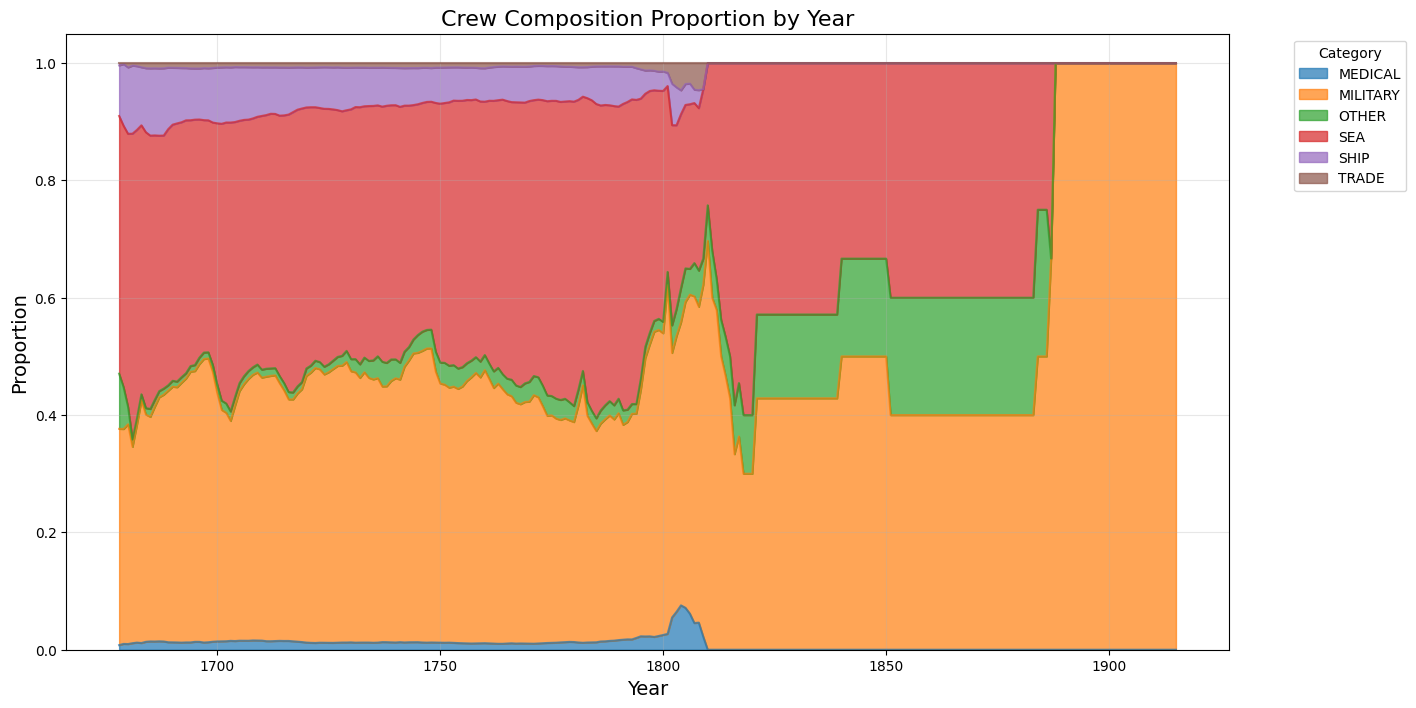

In [37]:
# Visualizing VOC Crew Composition Proportion by Year by Category 

# Parse dates and ensure they're in the correct format
# Convert to datetime 
df_contracts_ranks['date_begin_contract'] = pd.to_datetime(df_contracts_ranks['date_begin_contract'], errors='coerce')
df_contracts_ranks['date_end_contract'] = pd.to_datetime(df_contracts_ranks['date_end_contract'], errors='coerce')

# Only keep contracts between 1600 and 1800 (or 1799)
df_contracts_ranks = df_contracts_ranks[
    (df_contracts_ranks['date_begin_contract'].dt.year >= 1600) &
    (df_contracts_ranks['date_begin_contract'].dt.year <= 1799)]
    
# Check date range to ensure we're working with correct historical data
print("\nDate range in the data:")
print("Earliest start date:", df_contracts_ranks['date_begin_contract'].min())
print("Latest end date:", df_contracts_ranks['date_end_contract'].max())

# Create a function to count crew per year by category
def calculate_yearly_crew_composition(df):
    # Initialize a dictionary to store yearly counts by category
    yearly_composition = {}
    
    # Filter out rows with missing dates
    df_valid = df.dropna(subset=['date_begin_contract', 'date_end_contract', 'category'])
    
    # Iterate through each contract
    for _, row in df_valid.iterrows():
        start_year = row['date_begin_contract'].year
        end_year = row['date_end_contract'].year
        category = row['category']
        
        # Skip invalid date ranges
        if pd.isna(start_year) or pd.isna(end_year) or start_year > end_year:
            continue
            
        # For each year of the contract, increment the count for that category
        for year in range(start_year, end_year + 1):
            if year not in yearly_composition:
                yearly_composition[year] = {}
            
            if category not in yearly_composition[year]:
                yearly_composition[year][category] = 0
            
            yearly_composition[year][category] += 1
    
    return yearly_composition

# Calculate yearly crew composition
yearly_composition = calculate_yearly_crew_composition(df_contracts_ranks)

# Convert to DataFrame for easier manipulation
years = sorted(yearly_composition.keys())
categories = sorted(set(cat for year_data in yearly_composition.values() for cat in year_data.keys()))

composition_data = []
for year in years:
    year_data = yearly_composition[year]
    row = {'Year': year}
    total = sum(year_data.values())
    
    for category in categories:
        count = year_data.get(category, 0)
        proportion = count / total if total > 0 else 0
        row[category] = proportion
        row[f"{category}_count"] = count
    
    row['Total'] = total
    composition_data.append(row)

composition_df = pd.DataFrame(composition_data)

# Display some of the composition data
print("\nCrew composition by year (first few years):")
print(composition_df.head())

# Visualize the data
# Stacked area chart of proportions by year
plt.figure(figsize=(15, 8))

# Create a DataFrame for plotting with just the necessary columns
plot_df = composition_df[['Year'] + categories].copy()
plot_df = plot_df.set_index('Year')

# Plot stacked area chart
ax = plot_df.plot.area(stacked=True, alpha=0.7, figsize=(15, 8))
plt.title('Crew Composition Proportion by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('crew_composition_proportion_by_year.png', bbox_inches='tight')


Crew composition by year (first few years):
   Year  (all occupations)  (all occupations)_count  (house)painter  \
0  1678                0.0                        0             0.0   
1  1679                0.0                        0             0.0   
2  1680                0.0                        0             0.0   
3  1681                0.0                        0             0.0   
4  1682                0.0                        0             0.0   

   (house)painter_count   (other)  (other)_count  (unknown)  (unknown)_count  \
0                     0  0.000000              0   0.007782                2   
1                     0  0.001972              1   0.003945                2   
2                     0  0.000742              1   0.003709                5   
3                     0  0.000760              2   0.044436              117   
4                     0  0.000736              3   0.026503              108   

   appointee  ...  weapons master_count  weapon

<Figure size 1500x800 with 0 Axes>

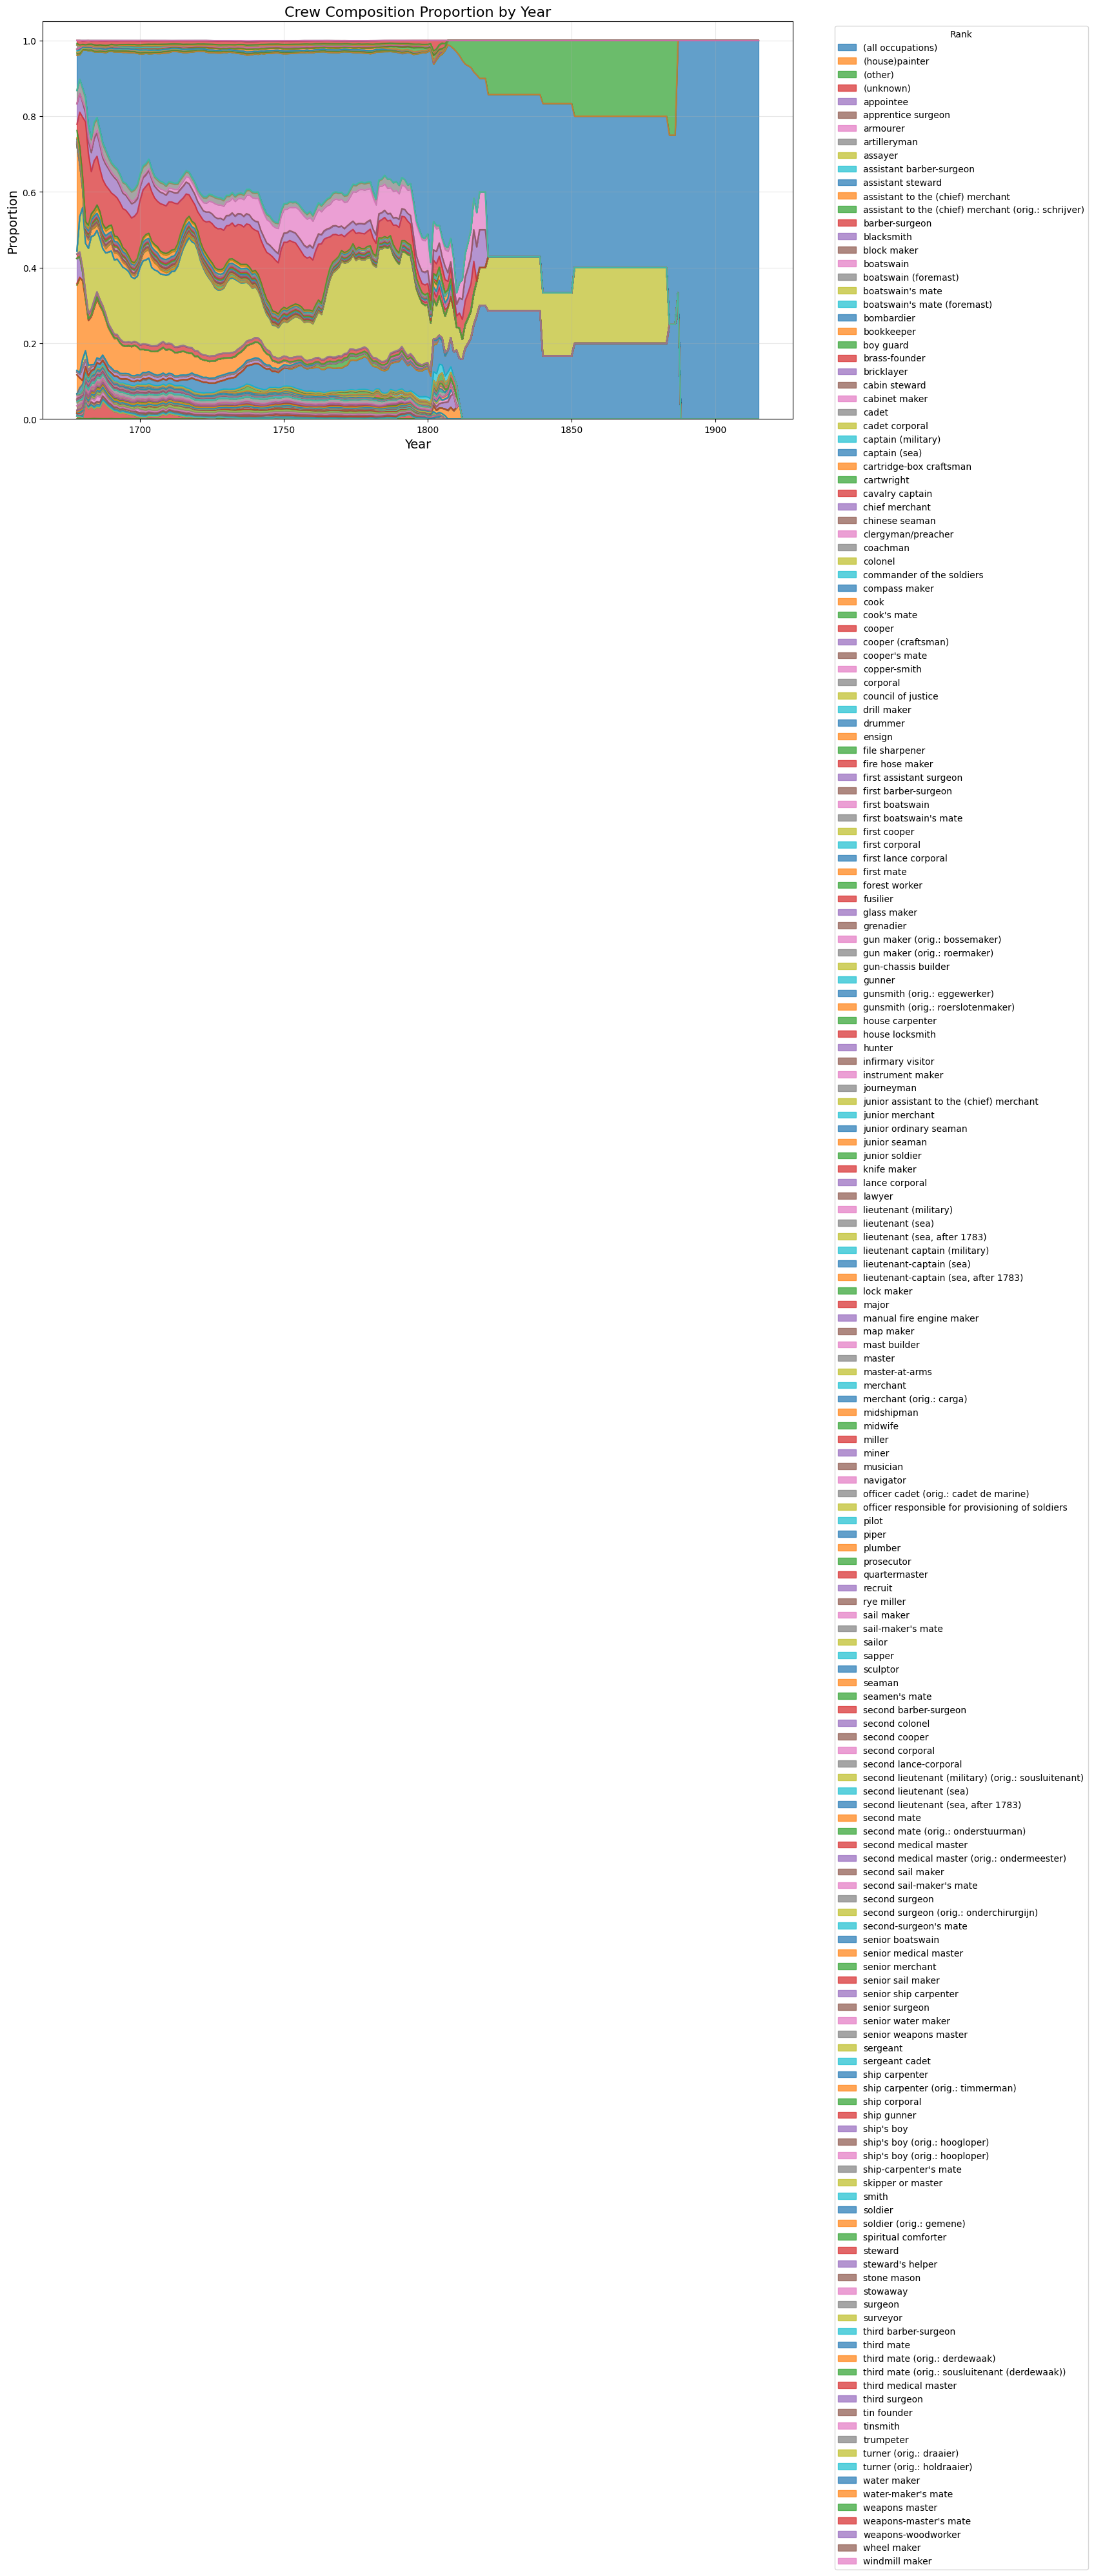

In [38]:
# Visualizing VOC Crew Composition Proportion by Year by Rank

# Create a function to count crew per year by rank
def calculate_yearly_crew_composition(df):
    # Initialize a dictionary to store yearly counts by rank
    yearly_composition = {}
    
    # Filter out rows with missing dates
    df_valid = df.dropna(subset=['date_begin_contract', 'date_end_contract', 'rank_x'])
    
    # Iterate through each contract
    for _, row in df_valid.iterrows():
        start_year = row['date_begin_contract'].year
        end_year = row['date_end_contract'].year
        rank = row['rank_x']
        
        # Skip invalid date ranges
        if pd.isna(start_year) or pd.isna(end_year) or start_year > end_year:
            continue
            
        # For each year of the contract, increment the count for that category
        for year in range(start_year, end_year + 1):
            if year not in yearly_composition:
                yearly_composition[year] = {}
            
            if rank not in yearly_composition[year]:
                yearly_composition[year][rank] = 0
            
            yearly_composition[year][rank] += 1
    
    return yearly_composition

# Calculate yearly crew composition
yearly_composition = calculate_yearly_crew_composition(df_contracts_ranks)

# Convert to DataFrame for easier manipulation
years = sorted(yearly_composition.keys())
ranks = sorted(set(rank for year_data in yearly_composition.values() for rank in year_data.keys()))

composition_data = []
for year in years:
    year_data = yearly_composition[year]
    row = {'Year': year}
    total = sum(year_data.values())
    
    for rank in ranks:
        count = year_data.get(rank, 0)
        proportion = count / total if total > 0 else 0
        row[rank] = proportion
        row[f"{rank}_count"] = count
    
    row['Total'] = total
    composition_data.append(row)

composition_df = pd.DataFrame(composition_data)

# Display some of the composition data
print("\nCrew composition by year (first few years):")
print(composition_df.head())

# Visualize the data

# Stacked area chart of proportions by year
plt.figure(figsize=(15, 8))

# Create a DataFrame for plotting with just the necessary columns
plot_df = composition_df[['Year'] + ranks].copy()
plot_df = plot_df.set_index('Year')

# Plot stacked area chart
ax = plot_df.plot.area(stacked=True, alpha=0.7, figsize=(15, 8))
plt.title('Crew Composition Proportion by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('crew_composition_proportion_by_year.png', bbox_inches='tight')


Crew composition by year (first few years):
   Year  (all occupations)  (all occupations)_count  (house)painter  \
0  1678                0.0                        0             0.0   
1  1679                0.0                        0             0.0   
2  1680                0.0                        0             0.0   
3  1681                0.0                        0             0.0   
4  1682                0.0                        0             0.0   

   (house)painter_count   (other)  (other)_count  (unknown)  (unknown)_count  \
0                     0  0.000000              0   0.007782                2   
1                     0  0.001972              1   0.003945                2   
2                     0  0.000742              1   0.003709                5   
3                     0  0.000760              2   0.044436              117   
4                     0  0.000736              3   0.026503              108   

   appointee  ...  water maker_count  weapon ma

<Figure size 1500x800 with 0 Axes>

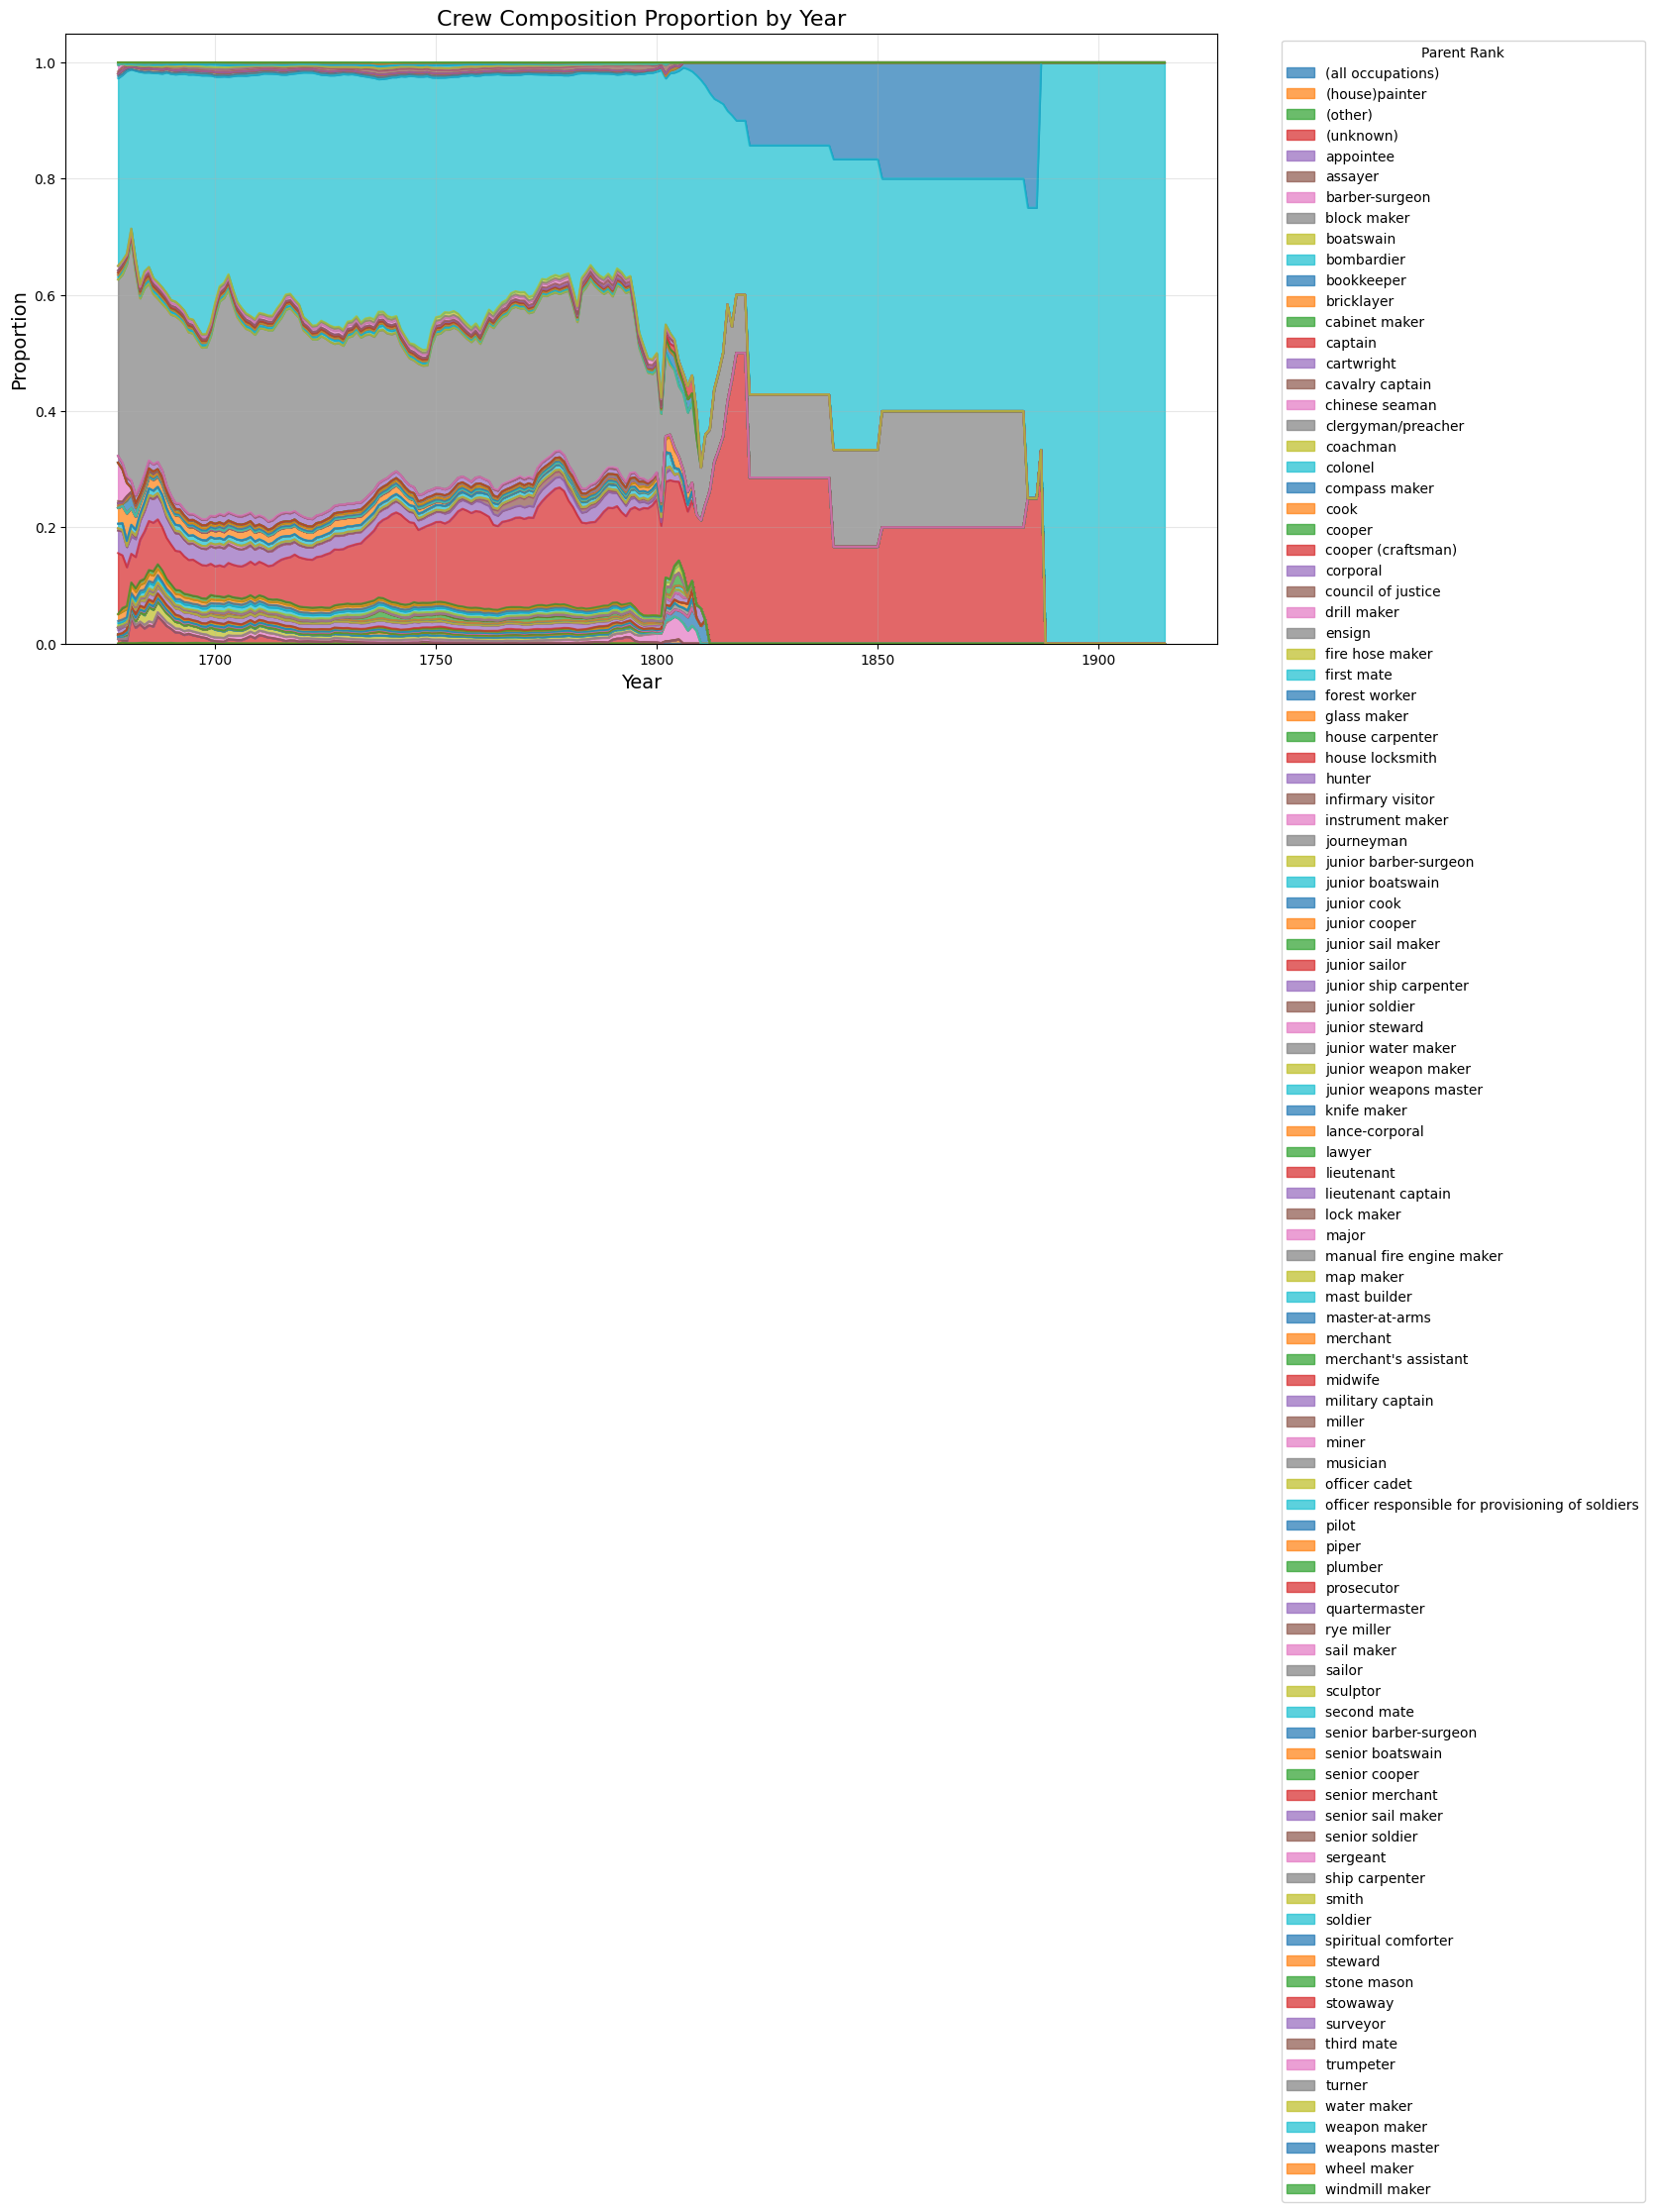

In [39]:
# Visualizing VOC Crew Composition Proportion by Year by Parent Rank

# Create a function to count crew per year by rank
def calculate_yearly_crew_composition(df):
    # Initialize a dictionary to store yearly counts by rank
    yearly_composition = {}
    
    # Filter out rows with missing dates
    df_valid = df.dropna(subset=['date_begin_contract', 'date_end_contract', 'parent_rank'])
    
    # Iterate through each contract
    for _, row in df_valid.iterrows():
        start_year = row['date_begin_contract'].year
        end_year = row['date_end_contract'].year
        parent_rank = row['parent_rank']
        
        # Skip invalid date ranges
        if pd.isna(start_year) or pd.isna(end_year) or start_year > end_year:
            continue
            
        # For each year of the contract, increment the count for that category
        for year in range(start_year, end_year + 1):
            if year not in yearly_composition:
                yearly_composition[year] = {}
            
            if parent_rank not in yearly_composition[year]:
                yearly_composition[year][parent_rank] = 0
            
            yearly_composition[year][parent_rank] += 1
    
    return yearly_composition

# Calculate yearly crew composition
yearly_composition = calculate_yearly_crew_composition(df_contracts_ranks)

# Convert to DataFrame for easier manipulation
years = sorted(yearly_composition.keys())
parent_ranks = sorted(set(parent_rank for year_data in yearly_composition.values() for parent_rank in year_data.keys()))

composition_data = []
for year in years:
    year_data = yearly_composition[year]
    row = {'Year': year}
    total = sum(year_data.values())
    
    for parent_rank in parent_ranks:
        count = year_data.get(parent_rank, 0)
        proportion = count / total if total > 0 else 0
        row[parent_rank] = proportion
        row[f"{parent_rank}_count"] = count
    
    row['Total'] = total
    composition_data.append(row)

composition_df = pd.DataFrame(composition_data)

# Display some of the composition data
print("\nCrew composition by year (first few years):")
print(composition_df.head())

# Visualize the data

# Stacked area chart of proportions by year
plt.figure(figsize=(15, 8))

# Create a DataFrame for plotting with just the necessary columns
plot_df = composition_df[['Year'] + parent_ranks].copy()
plot_df = plot_df.set_index('Year')

# Plot stacked area chart
ax = plot_df.plot.area(stacked=True, alpha=0.7, figsize=(15, 8))
plt.title('Crew Composition Proportion by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Parent Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('crew_composition_proportion_by_year.png', bbox_inches='tight')

c. Visualizing VOC Crew Composition Absolute numbers by Year

<Figure size 1500x800 with 0 Axes>

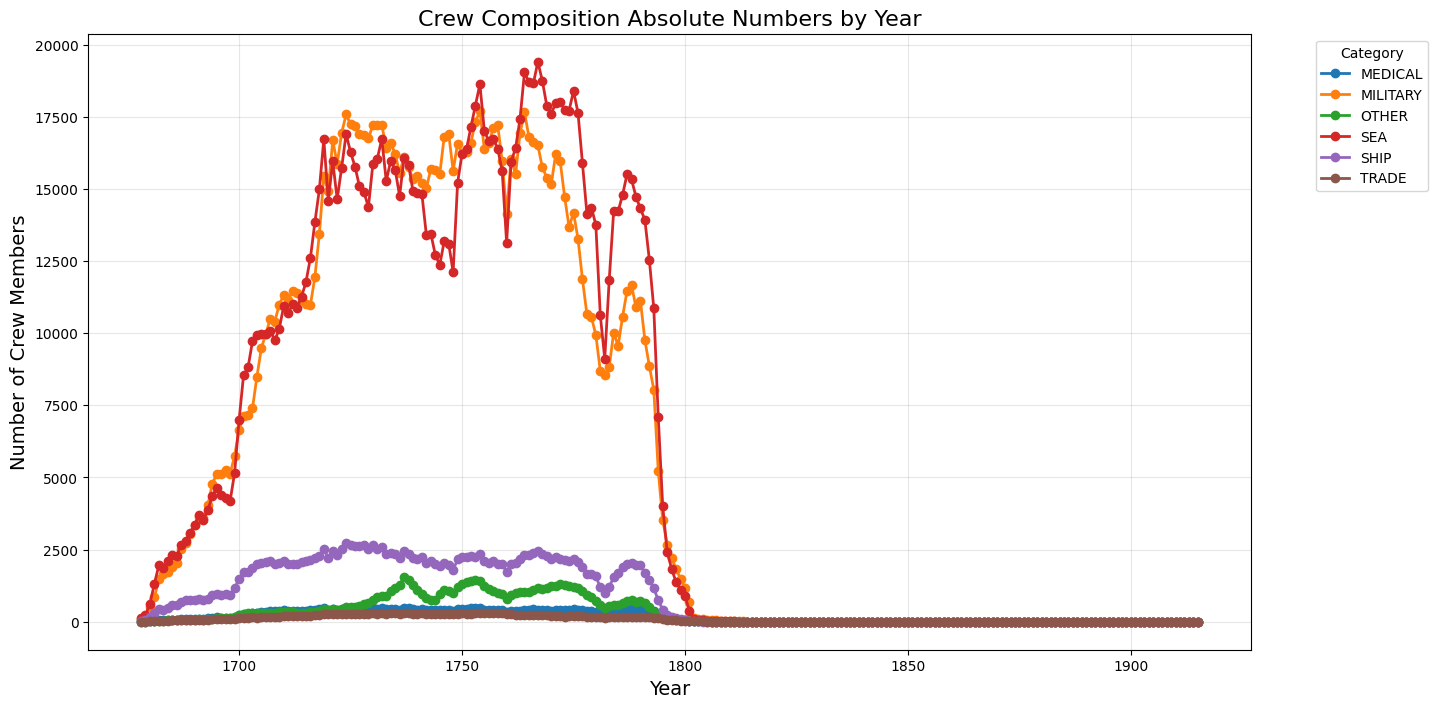

In [40]:
# Line chart for absolute numbers by Year by Category

# Create a function to count crew per year by category
def calculate_yearly_crew_composition(df):
    # Initialize a dictionary to store yearly counts by category
    yearly_composition = {}
    
    # Filter out rows with missing dates
    df_valid = df.dropna(subset=['date_begin_contract', 'date_end_contract', 'category'])
    
    # Iterate through each contract
    for _, row in df_valid.iterrows():
        start_year = row['date_begin_contract'].year
        end_year = row['date_end_contract'].year
        category = row['category']
        
        # Skip invalid date ranges
        if pd.isna(start_year) or pd.isna(end_year) or start_year > end_year:
            continue
            
        # For each year of the contract, increment the count for that category
        for year in range(start_year, end_year + 1):
            if year not in yearly_composition:
                yearly_composition[year] = {}
            
            if category not in yearly_composition[year]:
                yearly_composition[year][category] = 0
            
            yearly_composition[year][category] += 1
    
    return yearly_composition

# Calculate yearly crew composition
yearly_composition = calculate_yearly_crew_composition(df_contracts_ranks)

# Convert to DataFrame for easier manipulation
years = sorted(yearly_composition.keys())
categories = sorted(set(cat for year_data in yearly_composition.values() for cat in year_data.keys()))

composition_data = []
for year in years:
    year_data = yearly_composition[year]
    row = {'Year': year}
    total = sum(year_data.values())
    
    for category in categories:
        count = year_data.get(category, 0)
        proportion = count / total if total > 0 else 0
        row[category] = proportion
        row[f"{category}_count"] = count
    
    row['Total'] = total
    composition_data.append(row)

composition_df = pd.DataFrame(composition_data)


plt.figure(figsize=(15, 8))
count_cols = [f"{category}_count" for category in categories]
count_df = composition_df[['Year'] + count_cols].copy()
count_df = count_df.set_index('Year')
count_df.columns = [col.replace('_count', '') for col in count_df.columns]

ax = count_df.plot(figsize=(15, 8), linewidth=2, marker='o')
plt.title('Crew Composition Absolute Numbers by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Crew Members', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('crew_composition_counts_by_year.png', bbox_inches='tight')

<Figure size 1500x800 with 0 Axes>

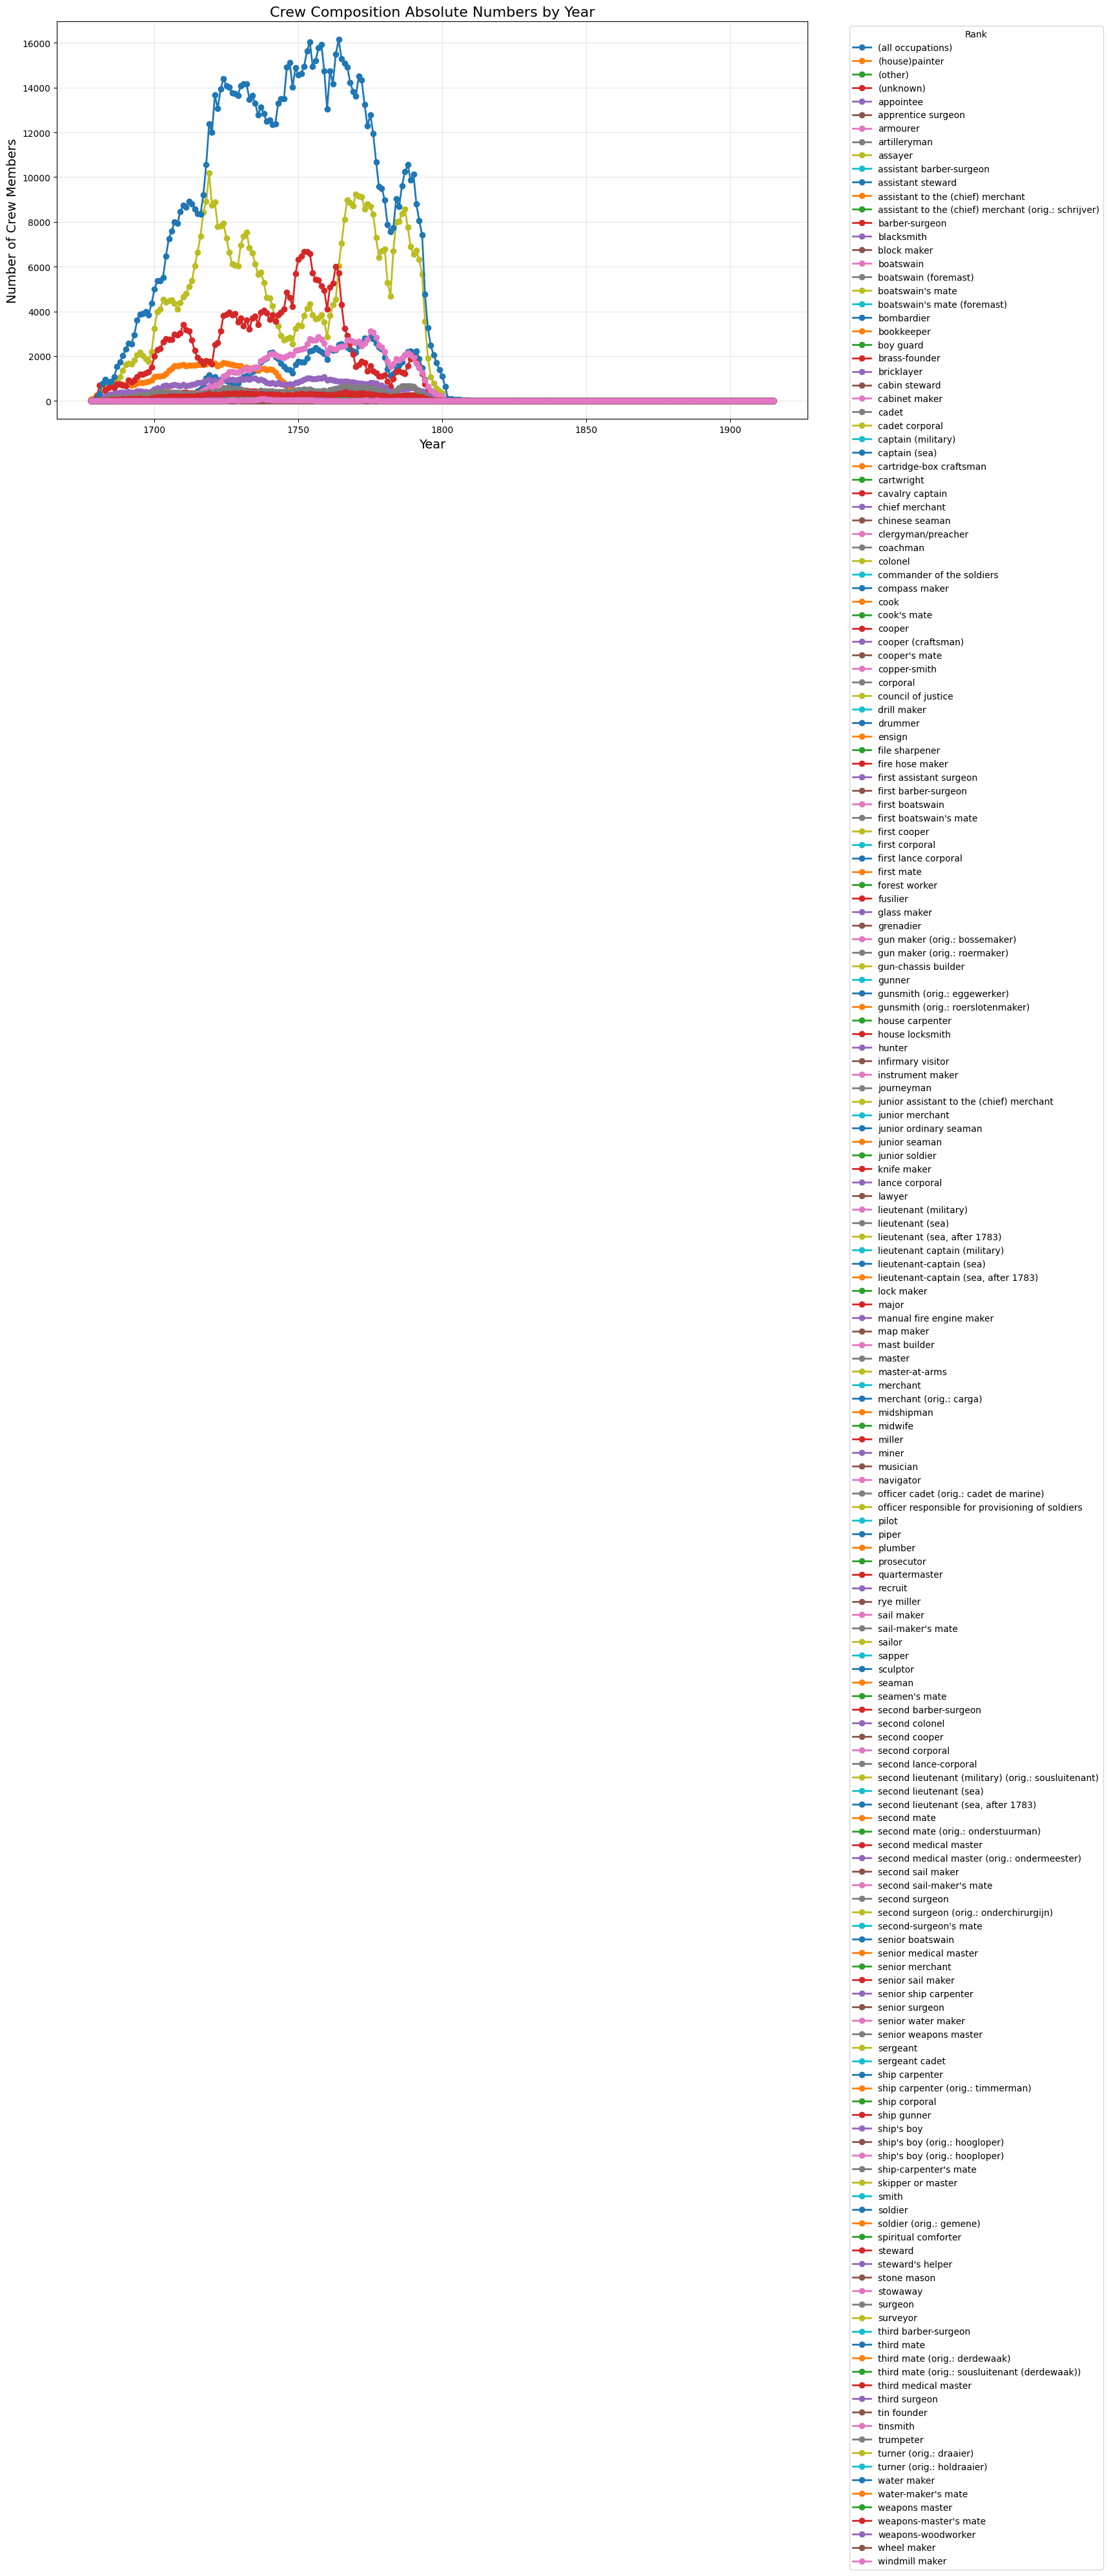

In [41]:
# Line chart for absolute numbers by Year by Rank

# Create a function to count crew per year by rank
def calculate_yearly_crew_composition(df):
    # Initialize a dictionary to store yearly counts by rank
    yearly_composition = {}
    
    # Filter out rows with missing dates
    df_valid = df.dropna(subset=['date_begin_contract', 'date_end_contract', 'rank_x'])
    
    # Iterate through each contract
    for _, row in df_valid.iterrows():
        start_year = row['date_begin_contract'].year
        end_year = row['date_end_contract'].year
        rank = row['rank_x']
        
        # Skip invalid date ranges
        if pd.isna(start_year) or pd.isna(end_year) or start_year > end_year:
            continue
            
        # For each year of the contract, increment the count for that category
        for year in range(start_year, end_year + 1):
            if year not in yearly_composition:
                yearly_composition[year] = {}
            
            if rank not in yearly_composition[year]:
                yearly_composition[year][rank] = 0
            
            yearly_composition[year][rank] += 1
    
    return yearly_composition

# Calculate yearly crew composition
yearly_composition = calculate_yearly_crew_composition(df_contracts_ranks)

# Convert to DataFrame for easier manipulation
years = sorted(yearly_composition.keys())
ranks = sorted(set(rank for year_data in yearly_composition.values() for rank in year_data.keys()))

composition_data = []
for year in years:
    year_data = yearly_composition[year]
    row = {'Year': year}
    total = sum(year_data.values())
    
    for rank in ranks:
        count = year_data.get(rank, 0)
        proportion = count / total if total > 0 else 0
        row[rank] = proportion
        row[f"{rank}_count"] = count
    
    row['Total'] = total
    composition_data.append(row)

composition_df = pd.DataFrame(composition_data)


plt.figure(figsize=(15, 8))
count_cols = [f"{rank}_count" for rank in ranks]
count_df = composition_df[['Year'] + count_cols].copy()
count_df = count_df.set_index('Year')
count_df.columns = [col.replace('_count', '') for col in count_df.columns]

ax = count_df.plot(figsize=(15, 8), linewidth=2, marker='o')
plt.title('Crew Composition Absolute Numbers by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Crew Members', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('crew_composition_counts_by_year.png', bbox_inches='tight')

<Figure size 1500x800 with 0 Axes>

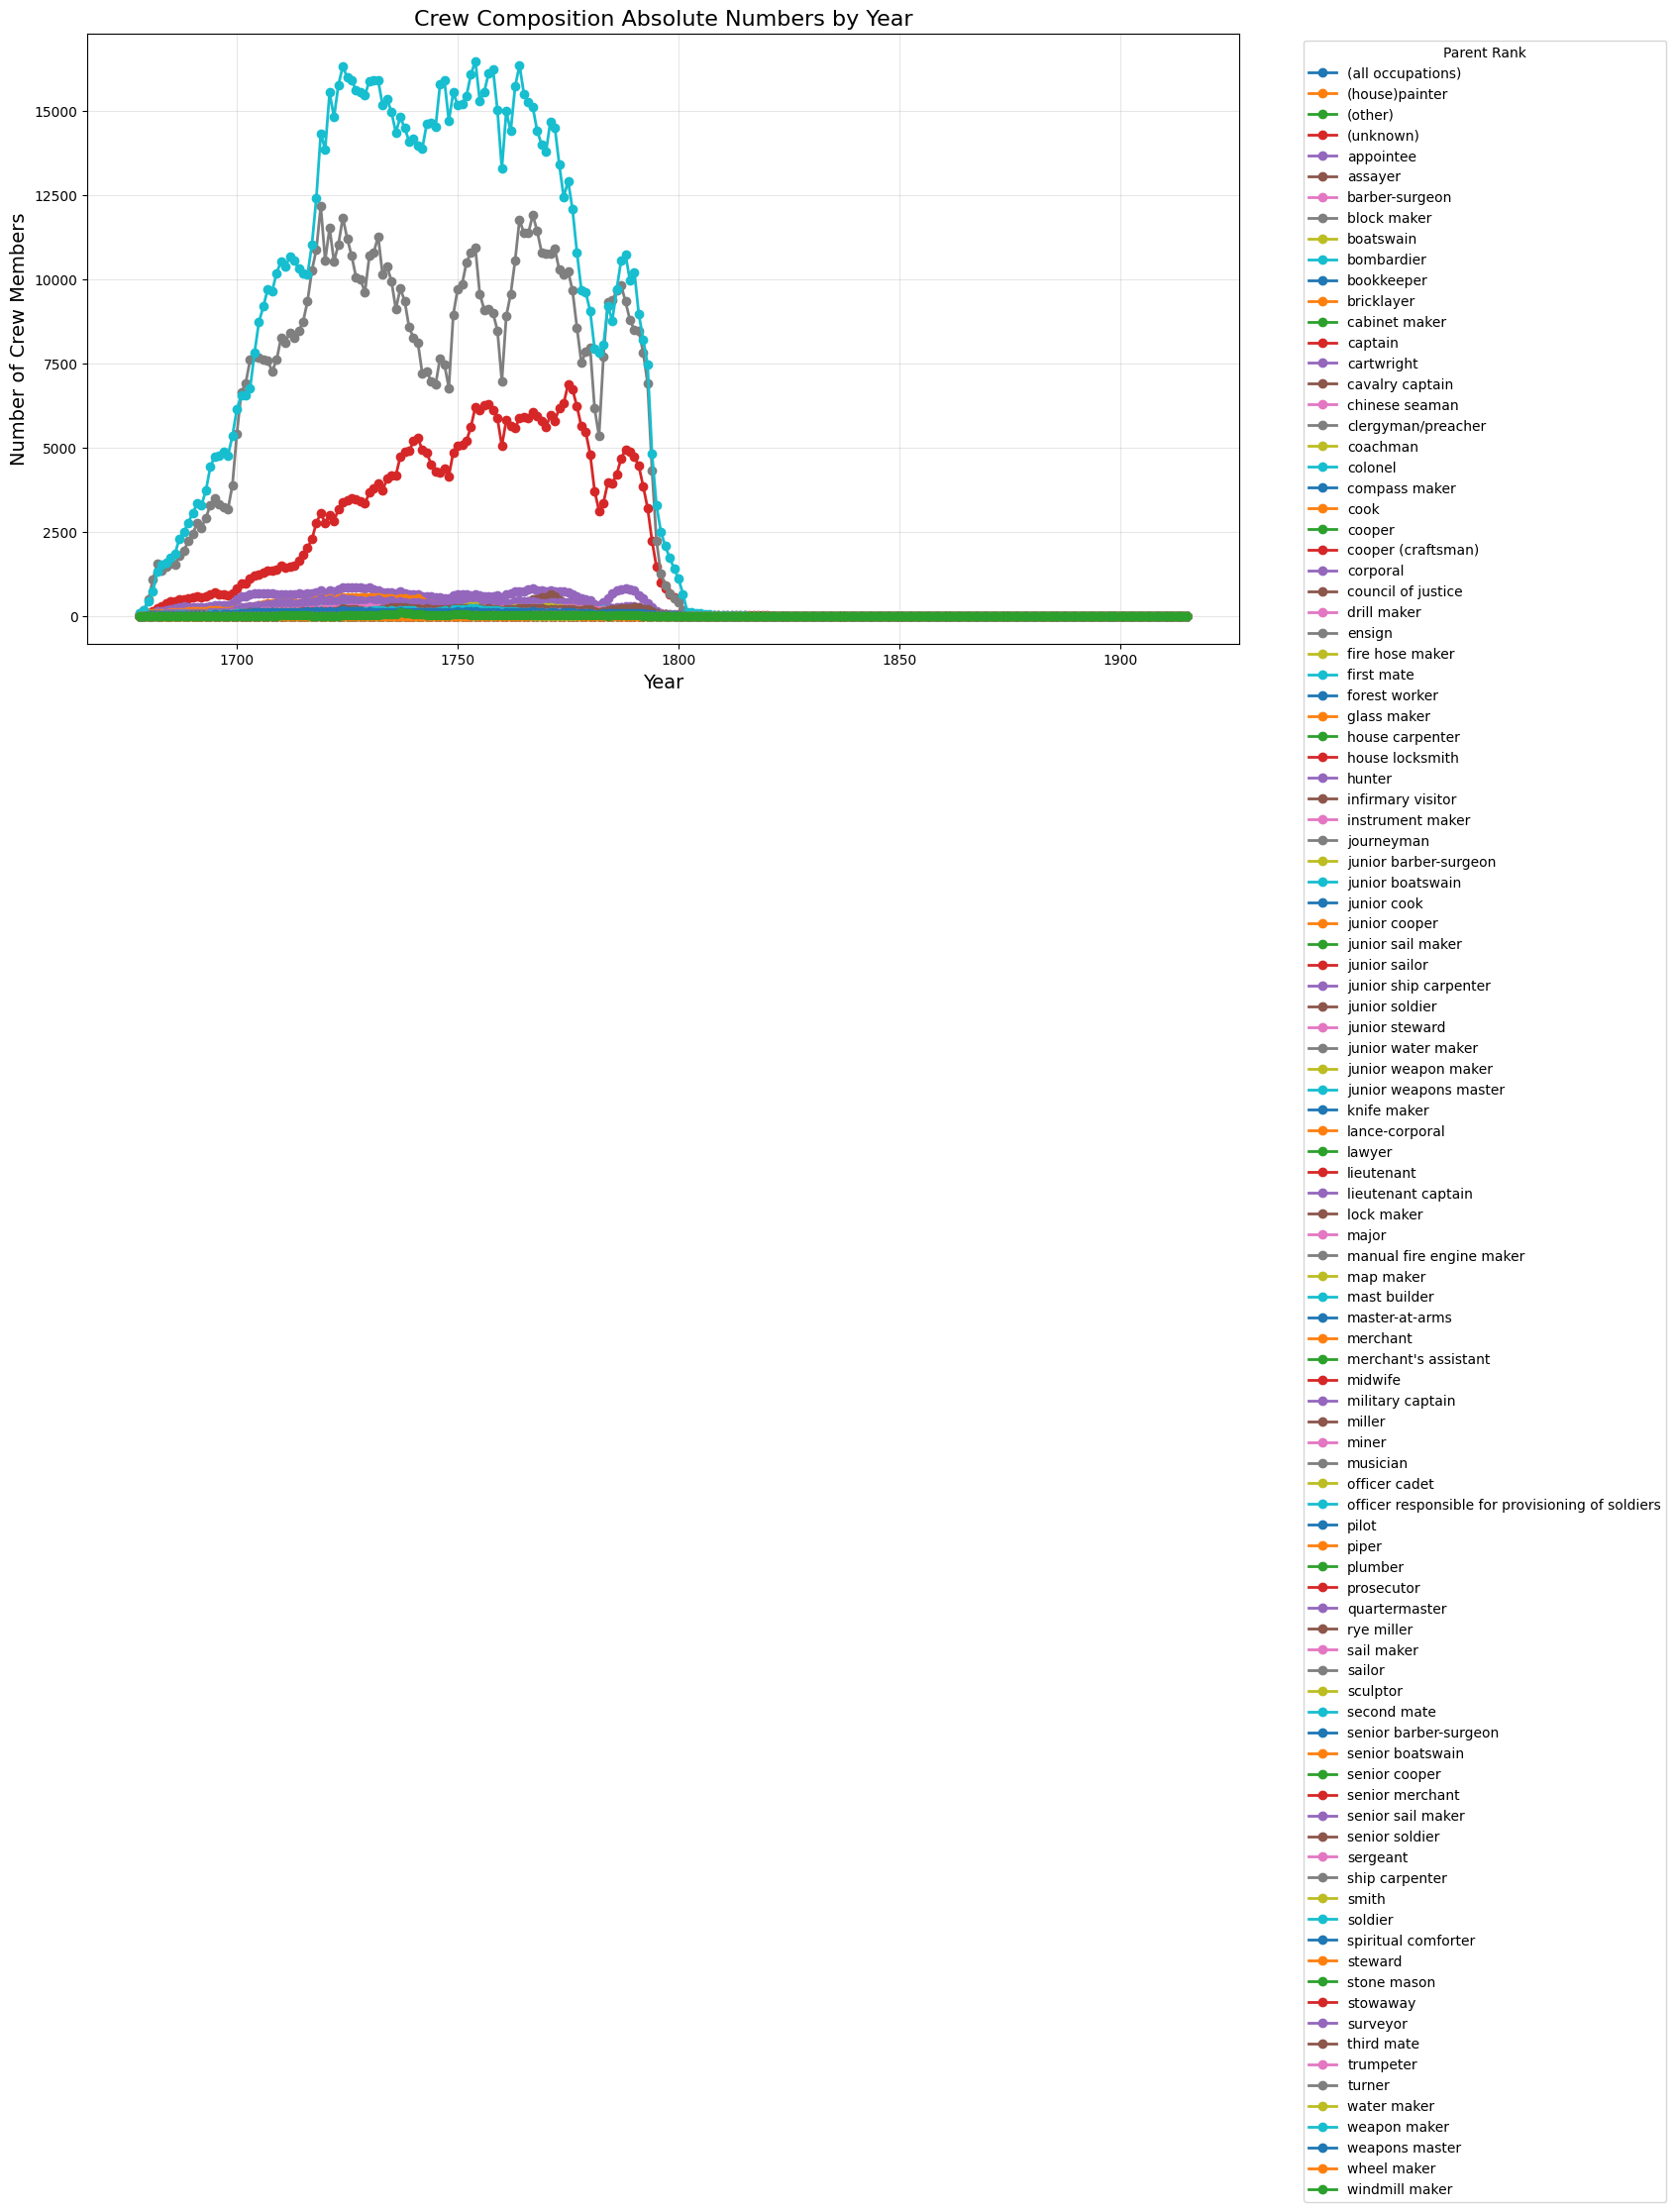

In [42]:
# Line chart for absolute numbers by Year by Parent Rank

def calculate_yearly_crew_composition(df):
    # Initialize a dictionary to store yearly counts by rank
    yearly_composition = {}
    
    # Filter out rows with missing dates
    df_valid = df.dropna(subset=['date_begin_contract', 'date_end_contract', 'parent_rank'])
    
    # Iterate through each contract
    for _, row in df_valid.iterrows():
        start_year = row['date_begin_contract'].year
        end_year = row['date_end_contract'].year
        parent_rank = row['parent_rank']
        
        # Skip invalid date ranges
        if pd.isna(start_year) or pd.isna(end_year) or start_year > end_year:
            continue
            
        # For each year of the contract, increment the count for that category
        for year in range(start_year, end_year + 1):
            if year not in yearly_composition:
                yearly_composition[year] = {}
            
            if parent_rank not in yearly_composition[year]:
                yearly_composition[year][parent_rank] = 0
            
            yearly_composition[year][parent_rank] += 1
    
    return yearly_composition

# Calculate yearly crew composition
yearly_composition = calculate_yearly_crew_composition(df_contracts_ranks)

# Convert to DataFrame for easier manipulation
years = sorted(yearly_composition.keys())
parent_ranks = sorted(set(parent_rank for year_data in yearly_composition.values() for parent_rank in year_data.keys()))

composition_data = []
for year in years:
    year_data = yearly_composition[year]
    row = {'Year': year}
    total = sum(year_data.values())
    
    for parent_rank in parent_ranks:
        count = year_data.get(parent_rank, 0)
        proportion = count / total if total > 0 else 0
        row[parent_rank] = proportion
        row[f"{parent_rank}_count"] = count
    
    row['Total'] = total
    composition_data.append(row)

composition_df = pd.DataFrame(composition_data)

plt.figure(figsize=(15, 8))
count_cols = [f"{parent_rank}_count" for parent_rank in parent_ranks]
count_df = composition_df[['Year'] + count_cols].copy()
count_df = count_df.set_index('Year')
count_df.columns = [col.replace('_count', '') for col in count_df.columns]

ax = count_df.plot(figsize=(15, 8), linewidth=2, marker='o')
plt.title('Crew Composition Absolute Numbers by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Crew Members', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Parent Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('crew_composition_counts_by_year.png', bbox_inches='tight')

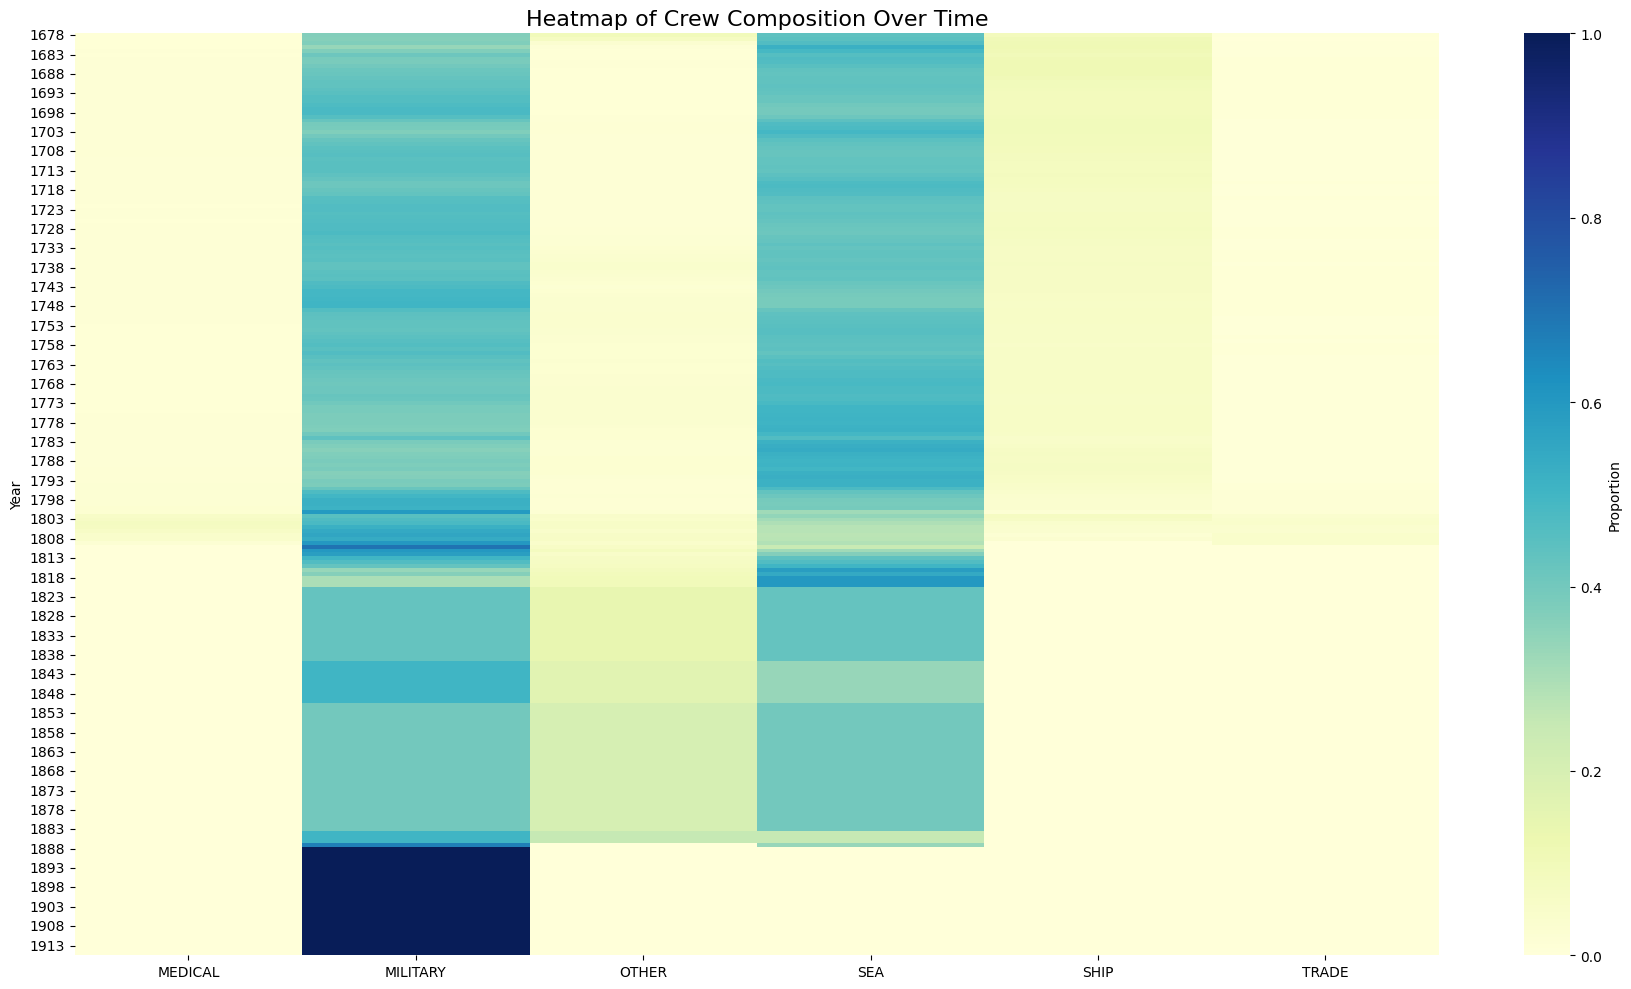

In [43]:
# Create a function to count crew per year by category
def calculate_yearly_crew_composition(df):
    # Initialize a dictionary to store yearly counts by category
    yearly_composition = {}
    
    # Filter out rows with missing dates
    df_valid = df.dropna(subset=['date_begin_contract', 'date_end_contract', 'category'])
    
    # Iterate through each contract
    for _, row in df_valid.iterrows():
        start_year = row['date_begin_contract'].year
        end_year = row['date_end_contract'].year
        category = row['category']
        
        # Skip invalid date ranges
        if pd.isna(start_year) or pd.isna(end_year) or start_year > end_year:
            continue
            
        # For each year of the contract, increment the count for that category
        for year in range(start_year, end_year + 1):
            if year not in yearly_composition:
                yearly_composition[year] = {}
            
            if category not in yearly_composition[year]:
                yearly_composition[year][category] = 0
            
            yearly_composition[year][category] += 1
    
    return yearly_composition

# Calculate yearly crew composition
yearly_composition = calculate_yearly_crew_composition(df_contracts_ranks)

# Convert to DataFrame for easier manipulation
years = sorted(yearly_composition.keys())
categories = sorted(set(cat for year_data in yearly_composition.values() for cat in year_data.keys()))

composition_data = []
for year in years:
    year_data = yearly_composition[year]
    row = {'Year': year}
    total = sum(year_data.values())
    
    for category in categories:
        count = year_data.get(category, 0)
        proportion = count / total if total > 0 else 0
        row[category] = proportion
        row[f"{category}_count"] = count
    
    row['Total'] = total
    composition_data.append(row)

composition_df = pd.DataFrame(composition_data)

# Heatmap of crew composition over time
plt.figure(figsize=(18, 10))
pivot_df = composition_df.pivot_table(index='Year', values=[f"{cat}_count" for cat in categories])
pivot_df.columns = [col.replace('_count', '') for col in pivot_df.columns]

# Normalize for better visualization
normalized_pivot = pivot_df.div(pivot_df.sum(axis=1), axis=0)

sns.heatmap(normalized_pivot, cmap="YlGnBu", annot=False, fmt=".2f", cbar_kws={'label': 'Proportion'})
plt.title('Heatmap of Crew Composition Over Time', fontsize=16)
plt.tight_layout()
plt.savefig('crew_composition_heatmap.png', bbox_inches='tight')

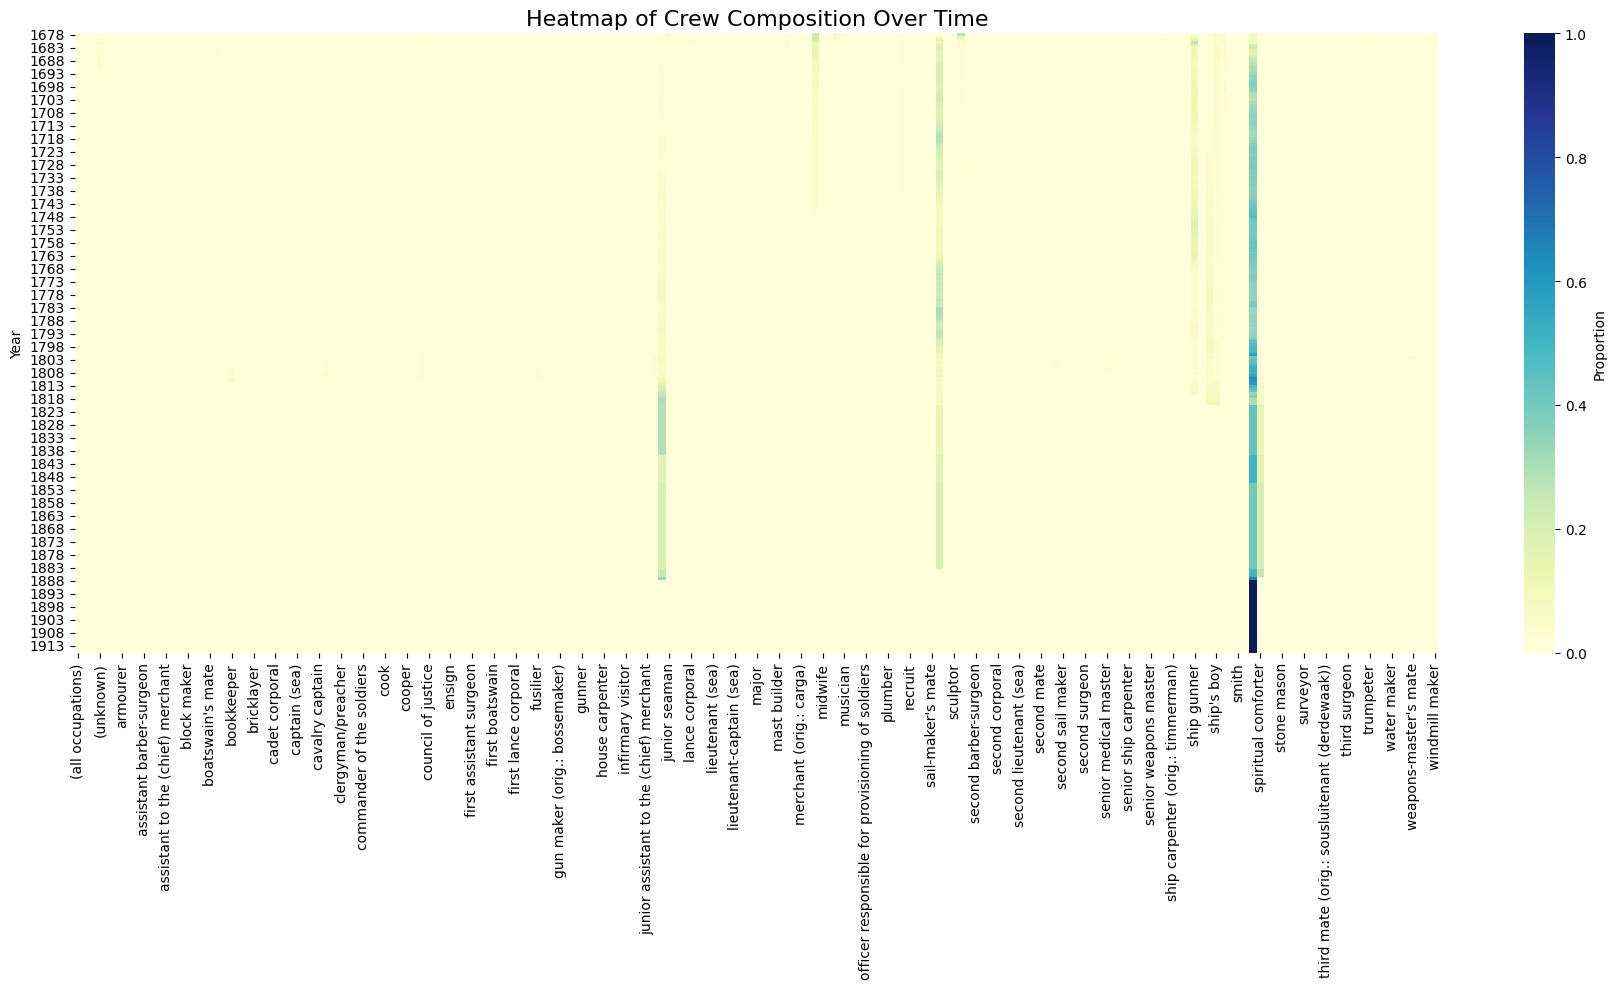

In [44]:
def calculate_yearly_crew_composition(df):
    # Initialize a dictionary to store yearly counts by rank
    yearly_composition = {}
    
    # Filter out rows with missing dates
    df_valid = df.dropna(subset=['date_begin_contract', 'date_end_contract', 'rank_x'])
    
    # Iterate through each contract
    for _, row in df_valid.iterrows():
        start_year = row['date_begin_contract'].year
        end_year = row['date_end_contract'].year
        rank = row['rank_x']
        
        # Skip invalid date ranges
        if pd.isna(start_year) or pd.isna(end_year) or start_year > end_year:
            continue
            
        # For each year of the contract, increment the count for that category
        for year in range(start_year, end_year + 1):
            if year not in yearly_composition:
                yearly_composition[year] = {}
            
            if rank not in yearly_composition[year]:
                yearly_composition[year][rank] = 0
            
            yearly_composition[year][rank] += 1
    
    return yearly_composition

# Calculate yearly crew composition
yearly_composition = calculate_yearly_crew_composition(df_contracts_ranks)

# Convert to DataFrame for easier manipulation
years = sorted(yearly_composition.keys())
ranks = sorted(set(rank for year_data in yearly_composition.values() for rank in year_data.keys()))

composition_data = []
for year in years:
    year_data = yearly_composition[year]
    row = {'Year': year}
    total = sum(year_data.values())
    
    for rank in ranks:
        count = year_data.get(rank, 0)
        proportion = count / total if total > 0 else 0
        row[rank] = proportion
        row[f"{rank}_count"] = count
    
    row['Total'] = total
    composition_data.append(row)

composition_df = pd.DataFrame(composition_data)

# Heatmap of crew composition over time
plt.figure(figsize=(18, 10))
pivot_df = composition_df.pivot_table(index='Year', values=[f"{rank}_count" for rank in ranks])
pivot_df.columns = [col.replace('_count', '') for col in pivot_df.columns]

# Normalize for better visualization
normalized_pivot = pivot_df.div(pivot_df.sum(axis=1), axis=0)

sns.heatmap(normalized_pivot, cmap="YlGnBu", annot=False, fmt=".2f", cbar_kws={'label': 'Proportion'})
plt.title('Heatmap of Crew Composition Over Time', fontsize=16)
plt.tight_layout()
plt.savefig('crew_composition_heatmap.png', bbox_inches='tight')

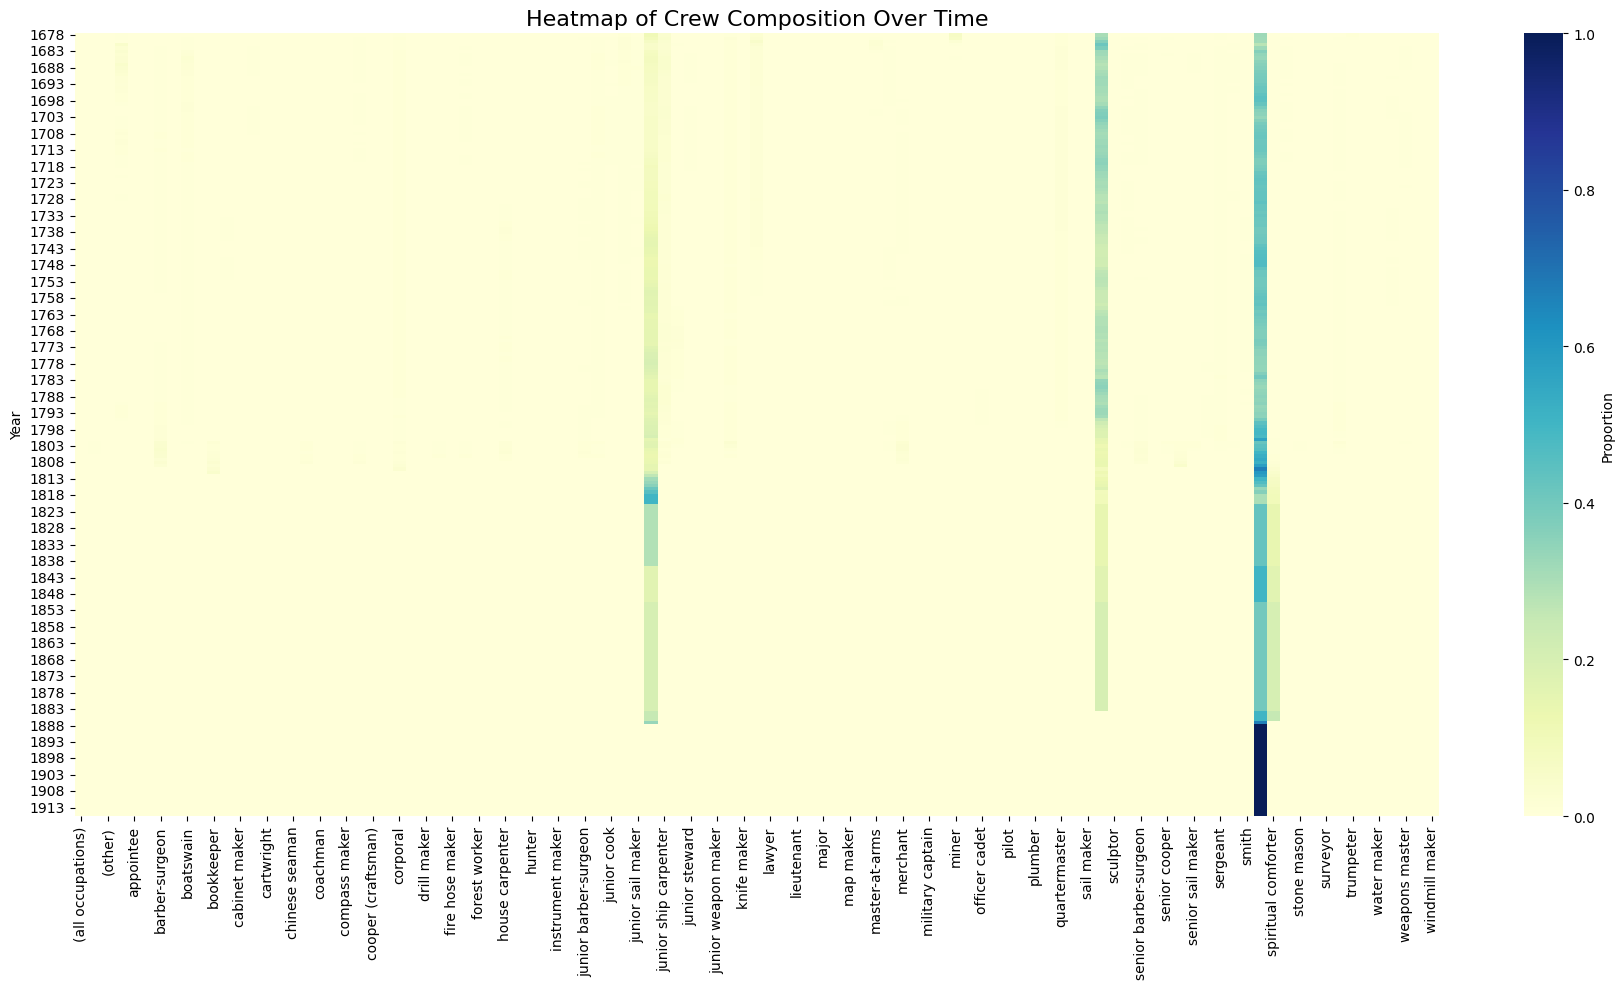

In [45]:
def calculate_yearly_crew_composition(df):
    # Initialize a dictionary to store yearly counts by rank
    yearly_composition = {}
    
    # Filter out rows with missing dates
    df_valid = df.dropna(subset=['date_begin_contract', 'date_end_contract', 'parent_rank'])
    
    # Iterate through each contract
    for _, row in df_valid.iterrows():
        start_year = row['date_begin_contract'].year
        end_year = row['date_end_contract'].year
        parent_rank = row['parent_rank']
        
        # Skip invalid date ranges
        if pd.isna(start_year) or pd.isna(end_year) or start_year > end_year:
            continue
            
        # For each year of the contract, increment the count for that category
        for year in range(start_year, end_year + 1):
            if year not in yearly_composition:
                yearly_composition[year] = {}
            
            if parent_rank not in yearly_composition[year]:
                yearly_composition[year][parent_rank] = 0
            
            yearly_composition[year][parent_rank] += 1
    
    return yearly_composition

# Calculate yearly crew composition
yearly_composition = calculate_yearly_crew_composition(df_contracts_ranks)

# Convert to DataFrame for easier manipulation
years = sorted(yearly_composition.keys())
parent_ranks = sorted(set(parent_rank for year_data in yearly_composition.values() for parent_rank in year_data.keys()))

composition_data = []
for year in years:
    year_data = yearly_composition[year]
    row = {'Year': year}
    total = sum(year_data.values())
    
    for parent_rank in parent_ranks:
        count = year_data.get(parent_rank, 0)
        proportion = count / total if total > 0 else 0
        row[parent_rank] = proportion
        row[f"{parent_rank}_count"] = count
    
    row['Total'] = total
    composition_data.append(row)

composition_df = pd.DataFrame(composition_data)

# Heatmap of crew composition over time
plt.figure(figsize=(18, 10))
pivot_df = composition_df.pivot_table(index='Year', values=[f"{parent_rank}_count" for parent_rank in parent_ranks])
pivot_df.columns = [col.replace('_count', '') for col in pivot_df.columns]

# Normalize for better visualization
normalized_pivot = pivot_df.div(pivot_df.sum(axis=1), axis=0)

sns.heatmap(normalized_pivot, cmap="YlGnBu", annot=False, fmt=".2f", cbar_kws={'label': 'Proportion'})
plt.title('Heatmap of Crew Composition Over Time', fontsize=16)
plt.tight_layout()
plt.savefig('crew_composition_heatmap.png', bbox_inches='tight')

In [46]:
# Generate summary statistics
print("Summary of Crew Composition by Category:")
category_summary = df_contracts_ranks.groupby('category').size().reset_index(name='count')
category_summary['percentage'] = category_summary['count'] / category_summary['count'].sum() * 100
print(category_summary.sort_values('count', ascending=False))

print("\nNumber of unique ships (outward voyages):", df_contracts_ranks['outward_voyage_id'].nunique())
print("\nMedian crew size per ship:", 
      df_contracts_ranks.groupby('outward_voyage_id').size().median())

# Export the merged dataset if needed for further analysis
df_contracts_ranks.to_csv('voc_persons_with_ranks.csv', index=False)

Summary of Crew Composition by Category:
   category   count  percentage
3       SEA  404571   53.667379
1  MILITARY  259716   34.451992
4      SHIP   58255    7.727675
2     OTHER   18409    2.442001
0   MEDICAL    9917    1.315515
5     TRADE    2981    0.395437

Number of unique ships (outward voyages): 3219

Median crew size per ship: 236.0


<Axes: title={'center': 'Reasons for Contract Termination'}, xlabel='reason_end_contract'>

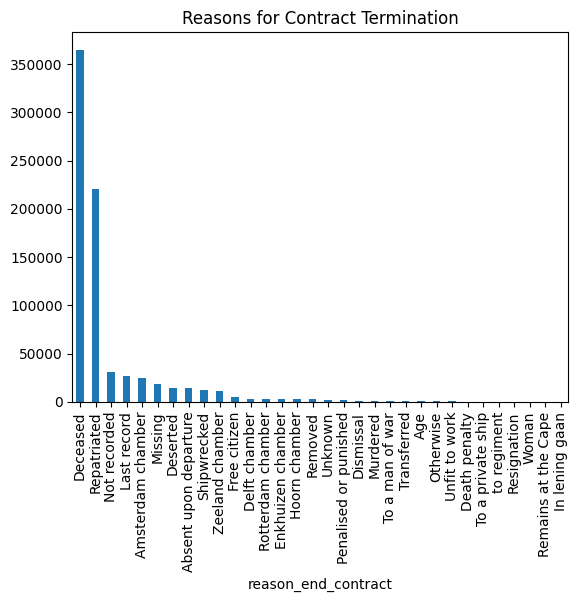

In [47]:
# Reasons for Contract Termination in general
df_contracts_ranks['reason_end_contract'].value_counts().plot(kind='bar', title='Reasons for Contract Termination')

Text(0.5, 0.98, 'Reasons for Contract Termination by Category')

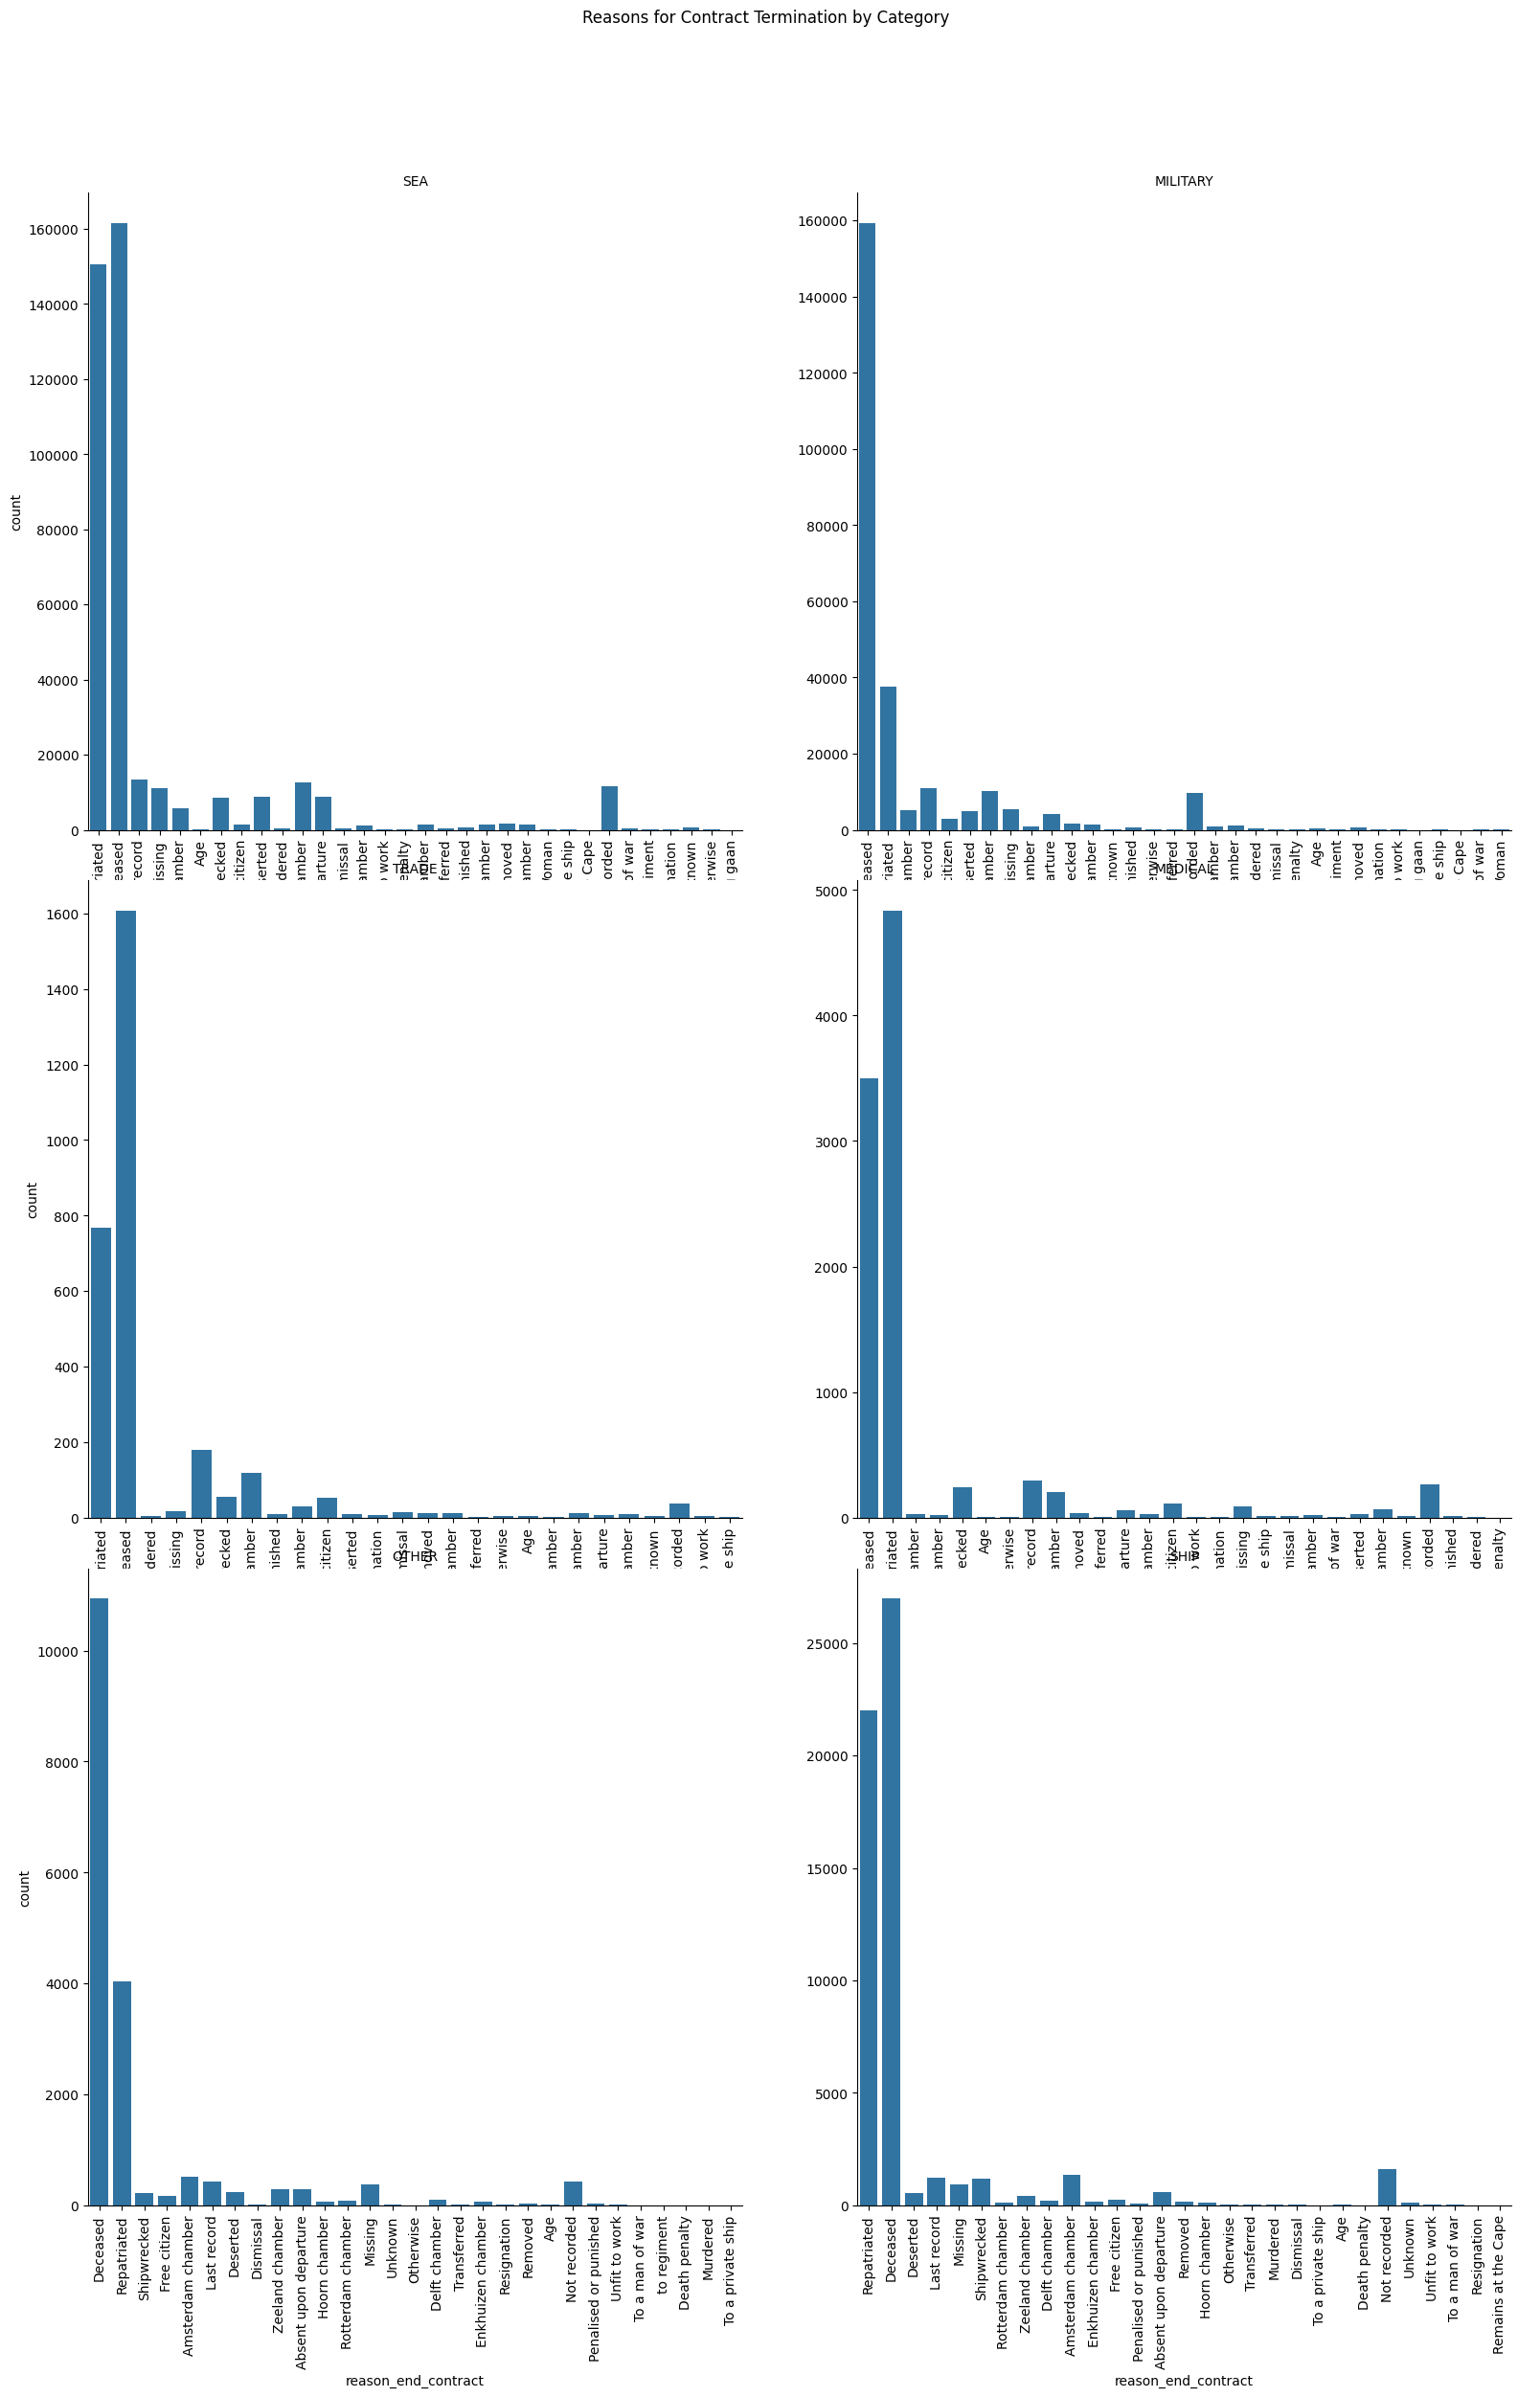

In [48]:
# Reasons for Contract Termination by Category

import seaborn as sns
import matplotlib.pyplot as plt

# Drop missing values in both columns
subset = df_contracts_ranks[['category', 'reason_end_contract']].dropna()

# Plot using Seaborn FacetGrid
g = sns.catplot(
    data=subset,
    kind='count',
    x='reason_end_contract',
    col='category',
    col_wrap=2,
    height=8,
    sharex=False,
    sharey=False
)
g.set_titles('{col_name}')
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Reasons for Contract Termination by Category')

In [49]:
# how many people had more than one contract?
person_counts = df_contracts_ranks['disambiguated_person'].value_counts()
repeat_employees = person_counts[person_counts > 1]
print(f"{len(repeat_employees)} people had more than one contract.")

2 people had more than one contract.


<Axes: title={'center': 'Could Muster Again?'}, ylabel='count'>

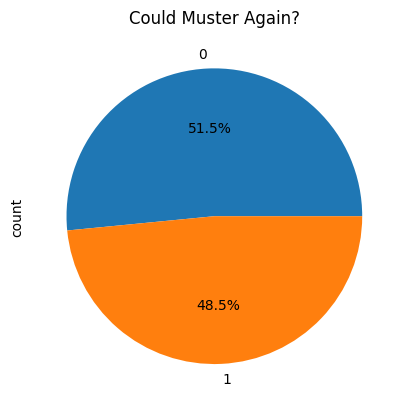

In [50]:
# how many people could muster again?
completion_status = df_contracts_ranks['could_muster_again'].value_counts()
completion_status.plot(kind='pie', autopct='%1.1f%%', title='Could Muster Again?')

<Axes: title={'center': 'Changed Ship at Cape of Good Hope?'}, xlabel='changed_ship_at_cape'>

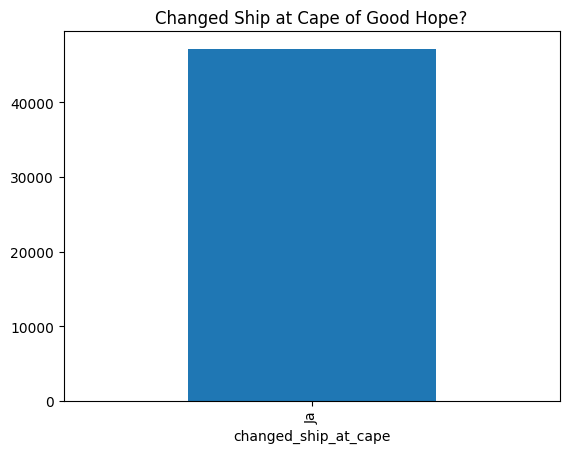

In [51]:
# how many people changed ships at cape?
cape_change_counts = df_contracts_ranks['changed_ship_at_cape'].value_counts()
cape_change_counts.plot(kind='bar', title='Changed Ship at Cape of Good Hope?')

d. Compare median wage across different contract lengths or time periods.

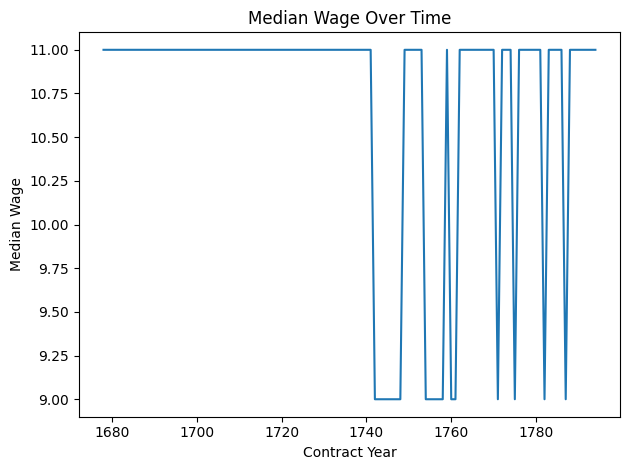

In [52]:
# how did the Median Wage change Over Time

# Parse with relaxed bounds (coerces invalid/malformed entries to NaT)
df_contracts_ranks['date_begin_contract'] = pd.to_datetime(
    df_contracts_ranks['date_begin_contract'],
    errors='coerce'
)

# Extract year (will skip rows where date was NaT)
df_contracts_ranks['contract_year'] = df_contracts_ranks['date_begin_contract'].dt.year

# Drop rows with missing years
df_contracts_ranks = df_contracts_ranks.dropna(subset=['contract_year'])

# Group and plot
wage_by_year = df_contracts_ranks.groupby('contract_year')['median_wage'].median().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='contract_year', y='median_wage', data=wage_by_year)
plt.title("Median Wage Over Time")
plt.xlabel("Contract Year")
plt.ylabel("Median Wage")
plt.tight_layout()
plt.show()

<Axes: xlabel='median_wage', ylabel='category'>

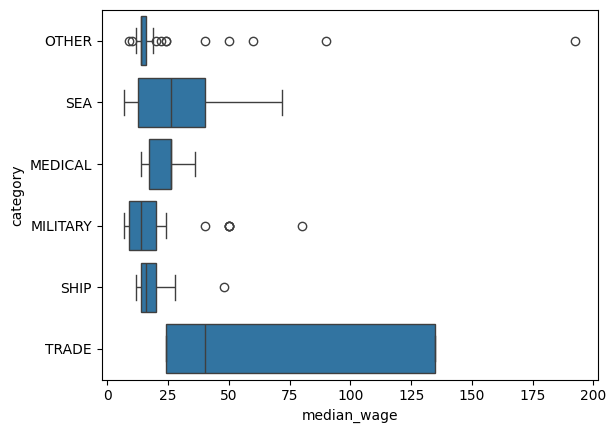

In [53]:
# distribution of median wage by category
sns.boxplot(x='median_wage', y='category', data=df_voc_ranks)

<Axes: xlabel='median_wage', ylabel='subcategory'>

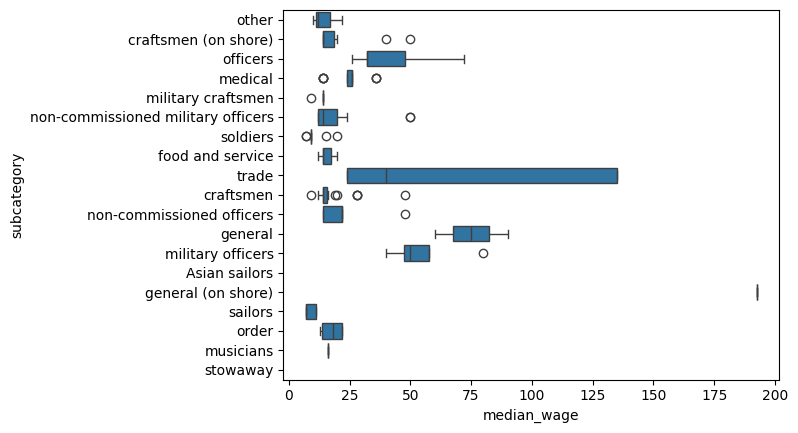

In [54]:
# distribution of median wage by subcategory
sns.boxplot(x='median_wage', y='subcategory', data=df_voc_ranks)

<Axes: xlabel='median_wage', ylabel='parent_rank'>

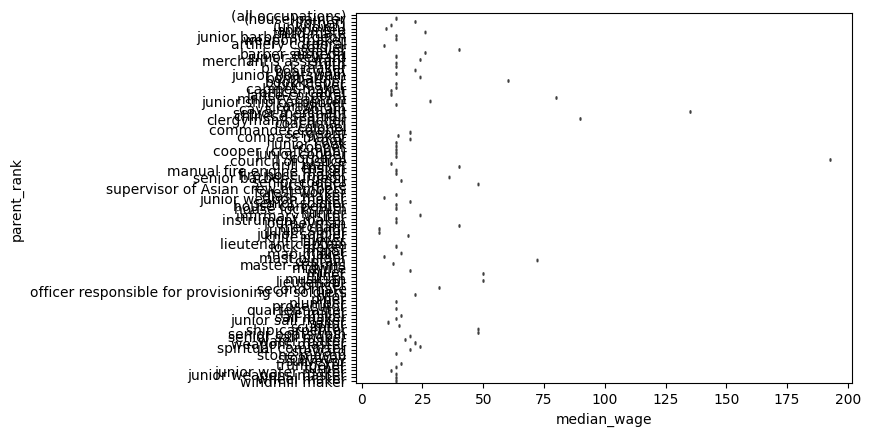

In [55]:
# distribution of median wage by parent rank
sns.boxplot(x='median_wage', y='parent_rank', data=df_voc_ranks)

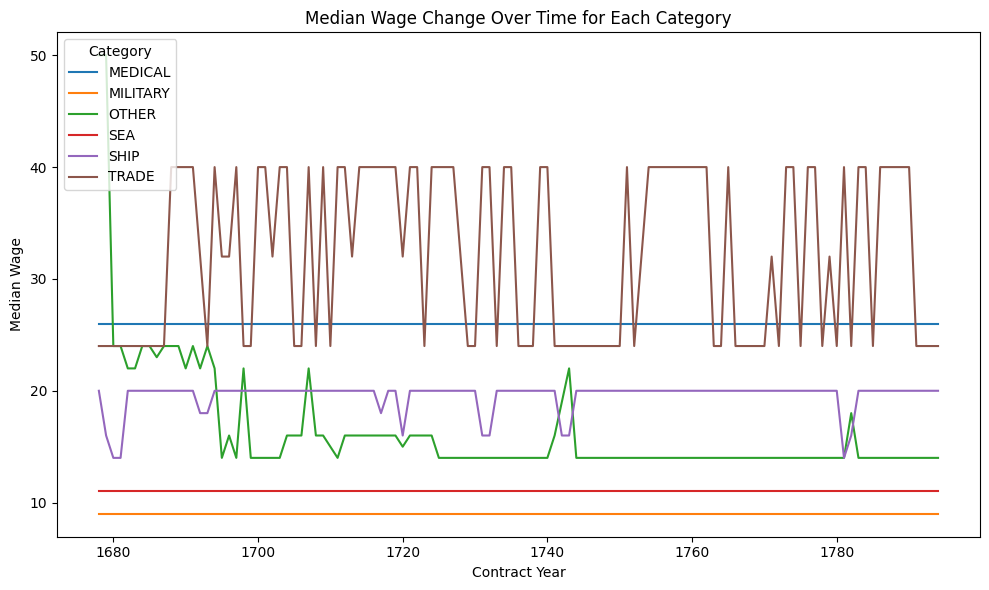

In [56]:
# how did the median wage change over time for each category
df_contracts_ranks = pd.merge(df_voc_persons_contracts, df_voc_ranks, on = "rank_id")

# Parse with relaxed bounds (coerces invalid/malformed entries to NaT)
df_contracts_ranks['date_begin_contract'] = pd.to_datetime(
    df_contracts_ranks['date_begin_contract'],errors='coerce'
)

# Extract year (will skip rows where date was NaT)
df_contracts_ranks['contract_year'] = df_contracts_ranks['date_begin_contract'].dt.year

# Drop rows with missing years
df_contracts_ranks = df_contracts_ranks.dropna(subset=['contract_year'])

# Group by 'contract_year' and 'category' and calculate median wage
wage_by_year_category = df_contracts_ranks.groupby(['contract_year', 'category'])['median_wage'].median().reset_index()

# Plot median wage change over time for each category
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(x='contract_year', y='median_wage', hue='category', data=wage_by_year_category)

plt.title("Median Wage Change Over Time for Each Category")
plt.xlabel("Contract Year")
plt.ylabel("Median Wage")
plt.legend(title='Category', loc='upper left')
plt.tight_layout()
plt.show()

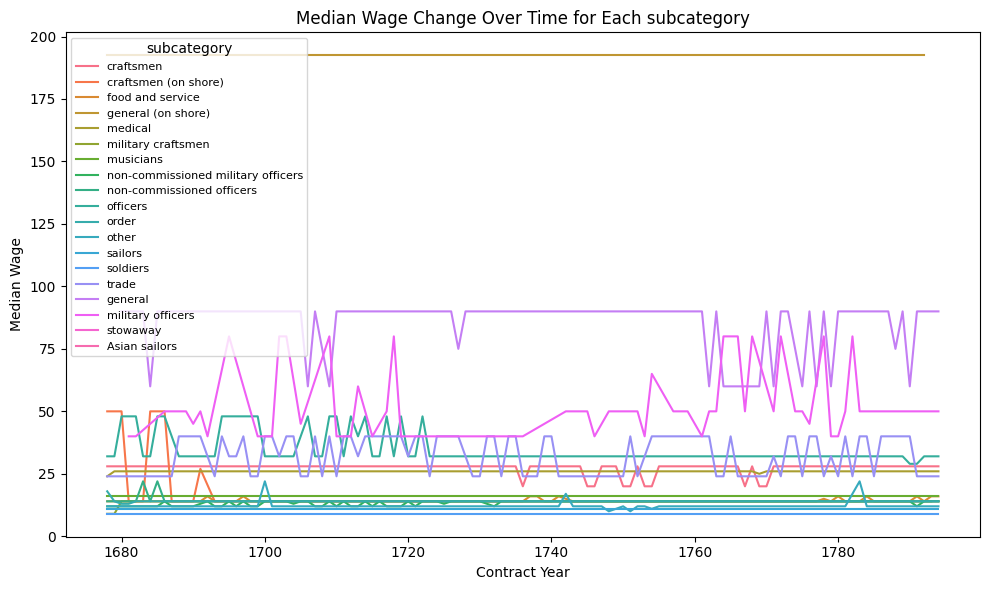

In [57]:
# Group by 'contract_year' and 'subcategory' and calculate median wage
wage_by_year_sub_category = df_contracts_ranks.groupby(['contract_year', 'subcategory'])['median_wage'].median().reset_index()

# Plot median wage change over time for each category
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(x='contract_year', y='median_wage', hue='subcategory', data=wage_by_year_sub_category)

plt.title("Median Wage Change Over Time for Each subcategory")
plt.xlabel("Contract Year")
plt.ylabel("Median Wage")
plt.legend(title='subcategory', fontsize="8", loc='upper left')
plt.tight_layout()
plt.show()

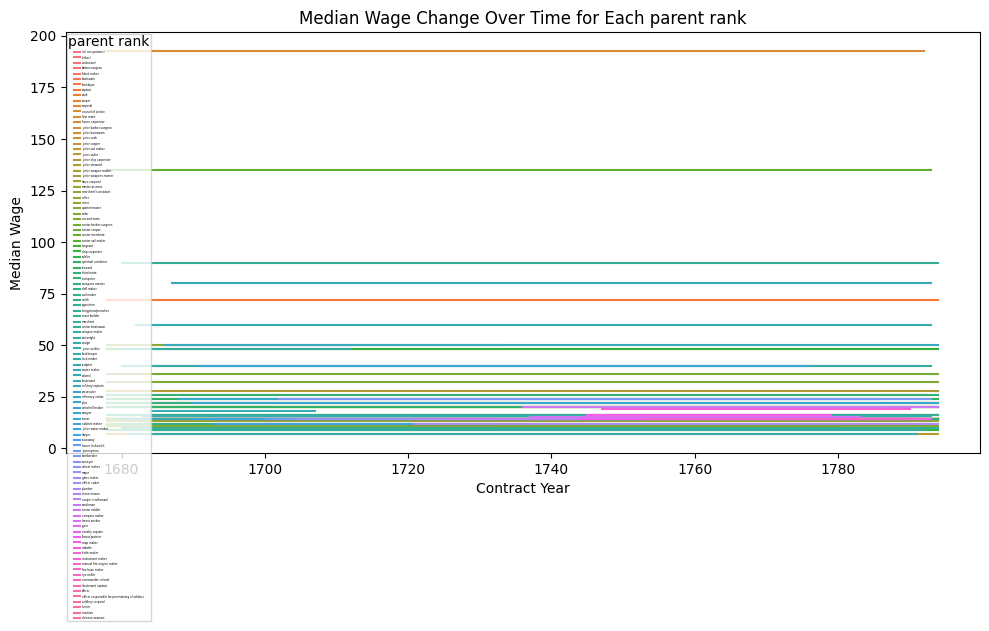

<Figure size 640x3000 with 0 Axes>

In [58]:
# Group by 'contract_year' and 'parent rank' and calculate median wage
wage_by_year_parent_rank = df_contracts_ranks.groupby(['contract_year', 'parent_rank'])['median_wage'].median().reset_index()

# Plot median wage change over time for each category
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(x='contract_year', y='median_wage', hue='parent_rank', data=wage_by_year_parent_rank)

plt.title("Median Wage Change Over Time for Each parent rank")
plt.xlabel("Contract Year")
plt.ylabel("Median Wage")
plt.legend(title='parent rank', fontsize="2", loc='upper left')
plt.tight_layout()
plt.figure().set_figheight(30)
plt.show()

In [59]:
# Use parent_rank to study promotion paths (e.g., from sailor → boatswain).

# Drop rows with missing parent_rank
df_promotions = df_contracts_ranks.dropna(subset=['parent_rank'])

# Count how many times a promotion path occurred
promotion_counts = df_promotions.groupby(['parent_rank', 'rank_x']).size().reset_index(name='count')

# Sort by count for visibility
promotion_counts = promotion_counts.sort_values('count', ascending=False)

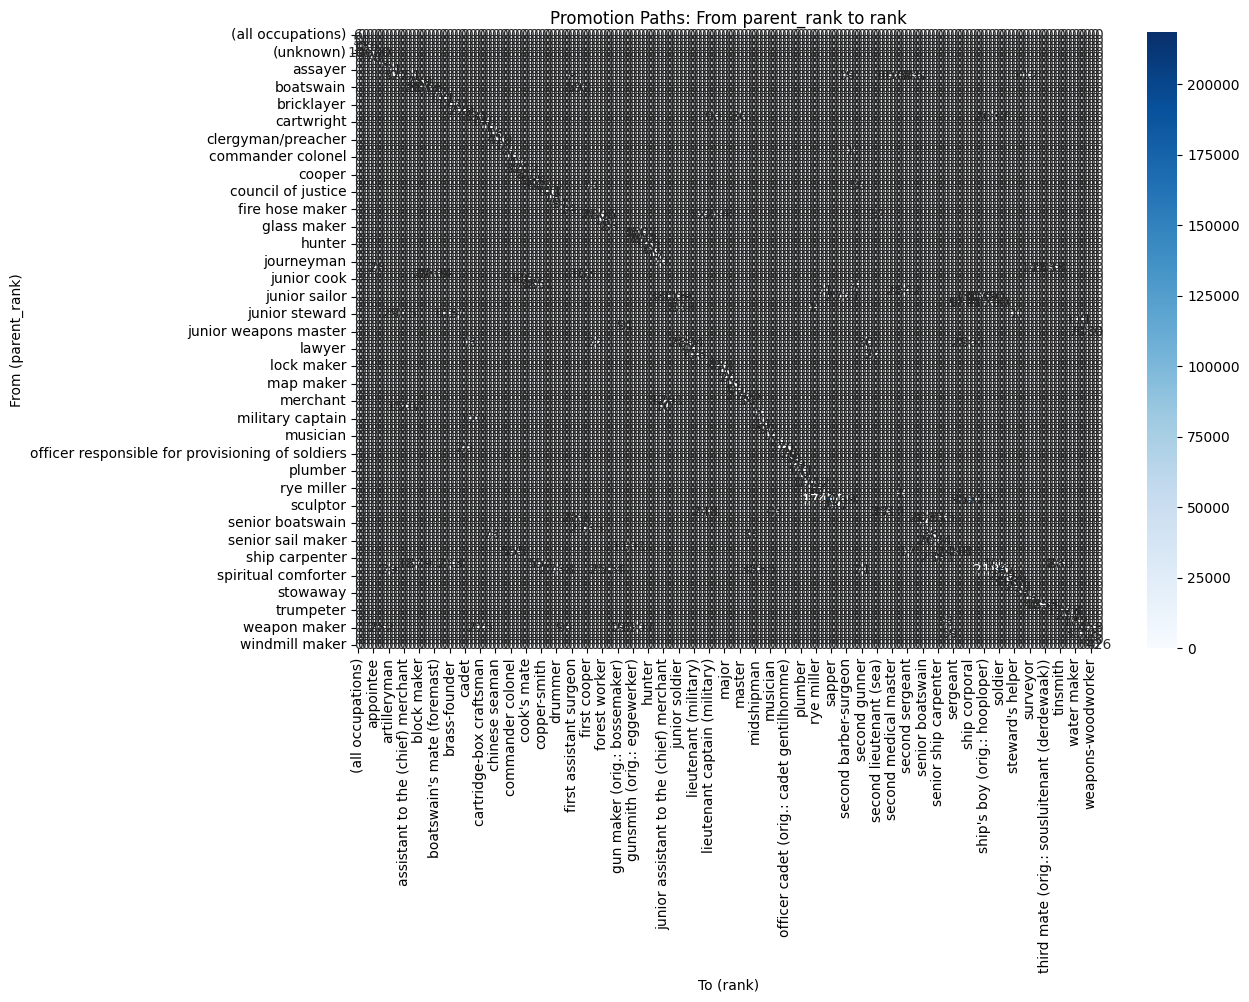

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

promotion_pivot = promotion_counts.pivot(index='parent_rank', columns='rank_x', values='count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(promotion_pivot, annot=True, fmt=".0f", cmap='Blues')
plt.title("Promotion Paths: From parent_rank to rank")
plt.ylabel("From (parent_rank)")
plt.xlabel("To (rank)")
plt.show()

<Axes: xlabel='contract_length', ylabel='category'>

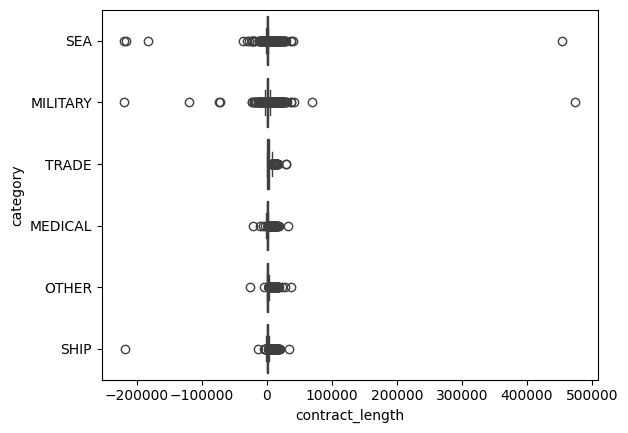

In [61]:
sns.boxplot(x='contract_length', y='category', data=df_contracts_ranks)

<Axes: xlabel='contract_length', ylabel='subcategory'>

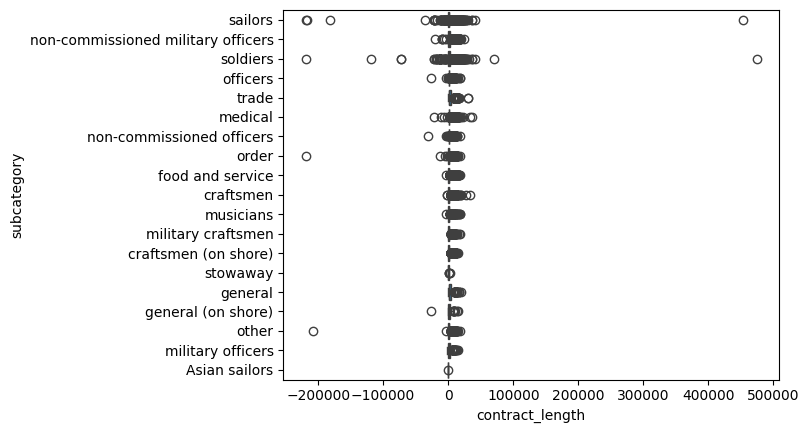

In [62]:
sns.boxplot(x='contract_length', y='subcategory', data=df_contracts_ranks)

<Axes: xlabel='contract_length', ylabel='parent_rank'>

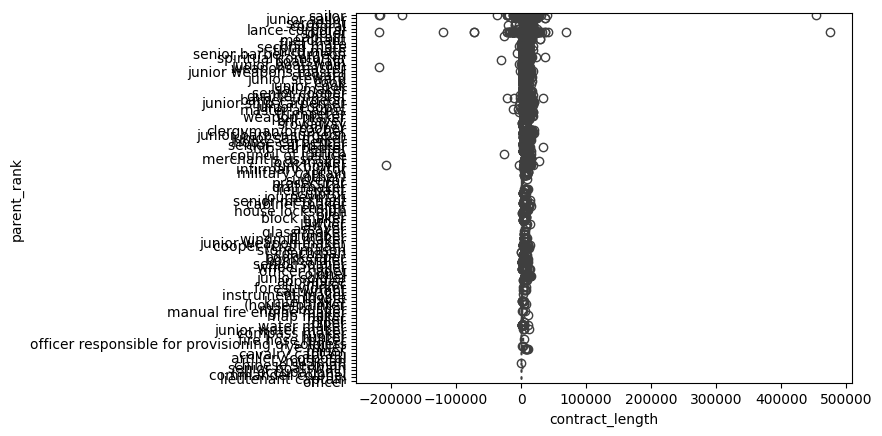

In [63]:
sns.boxplot(x='contract_length', y='parent_rank', data=df_contracts_ranks)

<Axes: xlabel='contract_length', ylabel='rank_x'>

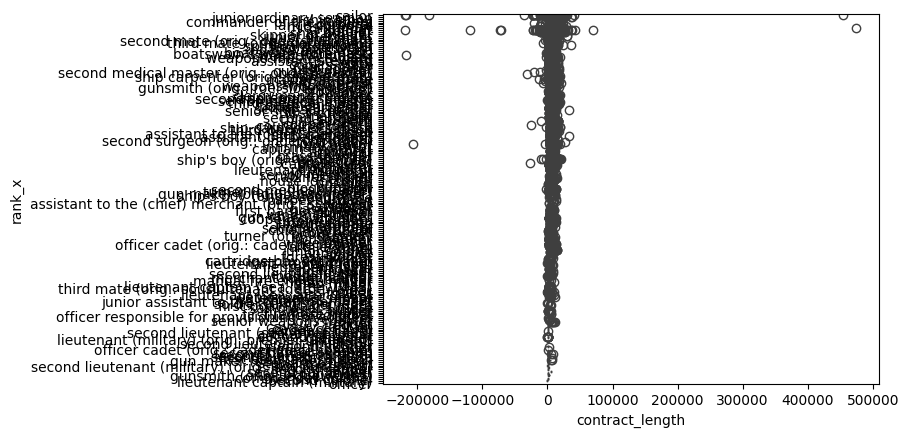

In [64]:
sns.boxplot(x='contract_length', y='rank_x', data=df_contracts_ranks)

e. make a hierarchy for job categories

In [65]:
from collections import defaultdict

# Start with a nested defaultdict
hierarchy_nested = defaultdict(lambda: defaultdict(list))

# Sort to make output neater
df_sorted = df_voc_ranks.sort_values(['category', 'subcategory', 'parent_rank', 'rank'])

# Fill the nested structure
for _, row in df_sorted.iterrows():
    cat = row['category']
    sub = row['subcategory']
    parent = row['parent_rank'] if pd.notna(row['parent_rank']) else row['rank']
    rank_id = row['rank_id']
    rank = row['rank']
    
    hierarchy_nested[(cat, sub)][parent].append((rank_id, rank))

# Convert to regular dict for readability / use
hierarchy_with_parents = {k: dict(v) for k, v in hierarchy_nested.items()}

In [66]:
hierarchy_with_parents

{('MEDICAL', 'craftsmen'): {'instrument maker': [(84, 'instrument maker')]},
 ('MEDICAL',
  'medical'): {'barber-surgeon': [(12, 'assistant barber-surgeon'),
   (16, 'barber-surgeon'),
   (60, 'first assistant surgeon'),
   (131, 'second barber-surgeon'),
   (141, 'second medical master'),
   (140, 'second medical master (orig.: ondermeester)'),
   (148, 'second surgeon'),
   (149, 'second surgeon (orig.: onderchirurgijn)'),
   (150, "second-surgeon's mate"),
   (178, 'surgeon')], 'junior barber-surgeon': [(7, 'apprentice surgeon'),
   (180, 'third barber-surgeon'),
   (184, 'third medical master'),
   (185, 'third surgeon')], 'senior barber-surgeon': [(61,
    'first barber-surgeon'),
   (153, 'senior medical master'),
   (156, 'senior surgeon')]},
 ('MILITARY',
  'military craftsmen'): {'junior weapon maker': [(75,
    'gun-chassis builder')], 'weapon maker': [(8, 'armourer'),
   (35, 'cartridge-box craftsman'),
   (57, 'file sharpener'),
   (73, 'gun maker (orig.: bossemaker)'),
   

# 3. merge "voc_persons_contracts.csv" with voyages.csv

In [67]:
df_voc_voyages = pd.read_csv('/Users/zhujiaqi/Downloads/VOC_Dataset/enriched/voc_voyages.csv')
print(len(df_voc_voyages))

8189


# 4. merge "voc_persons_contracts.csv" with sources.csv

In [68]:
df_voc_sources = pd.read_csv('/Users/zhujiaqi/Downloads/VOC_Dataset/enriched/voc_sources.csv')
print(len(df_voc_sources))

3246


In [69]:
df_contracts_sources = pd.merge(df_voc_persons_contracts, df_voc_sources, on = "source_id")
len(df_contracts_sources)

774200

In [70]:
# Identify which ships had the most contracts issued.

# Group by ship_name and count number of contracts
ship_contract_counts = (
    df_contracts_sources.groupby('ship_name')
    .size()
    .reset_index(name='contract_count')
    .sort_values(by='contract_count', ascending=False)
)

# Display the top ships
print(ship_contract_counts.head(10))

           ship_name  contract_count
546          Overnes            3847
688  Standvastigheid            3761
543        Ouwerkerk            3659
769         Vrijburg            3310
467       Meijenburg            3281
299             Hoop            3162
331    Huis ten Donk            3111
177        Eendracht            3096
550           Pallas            3010
430           Liefde            2916


/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_59299/2084881125.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_ships, x='contract_count', y='ship_name', palette='viridis')


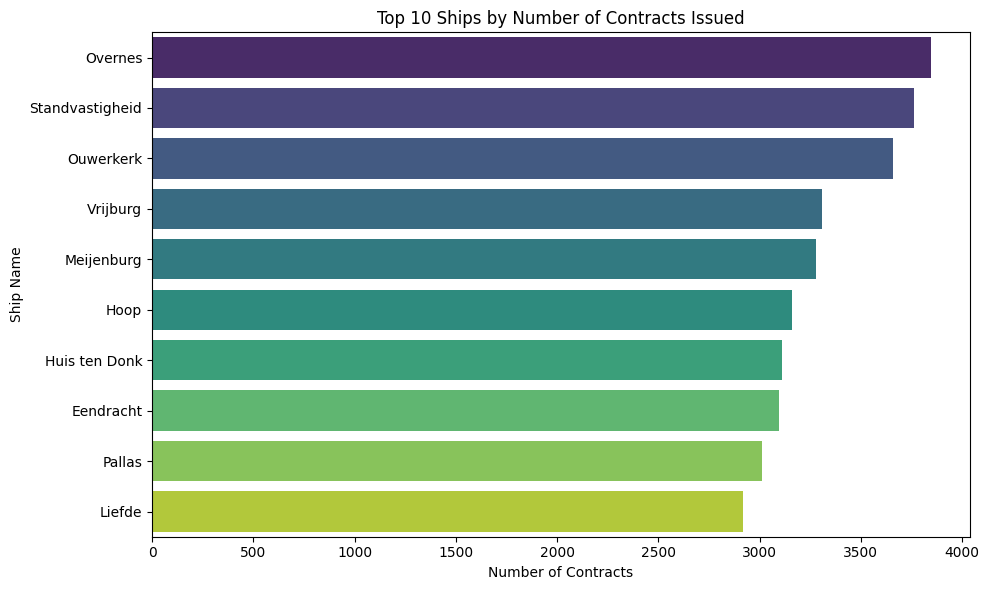

In [71]:
# Top 10 Ships by Number of Contracts Issued
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top 10 ships
top_ships = ship_contract_counts.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_ships, x='contract_count', y='ship_name', palette='viridis')
plt.title('Top 10 Ships by Number of Contracts Issued')
plt.xlabel('Number of Contracts')
plt.ylabel('Ship Name')
plt.tight_layout()
plt.show()

In [72]:
# further merge it with the "ranks.csv"
df_contracts_sources_ranks = pd.merge(df_contracts_sources, df_voc_ranks, on = "rank_id")
len(df_contracts_sources_ranks)

774063

In [73]:
# Analyze which ships required rank-specific crew compositions (e.g., more military ranks).
crew_by_ship_category = (
    df_contracts_sources_ranks
    .groupby(['ship_name', 'category'])
    .size()
    .reset_index(name='count')
)

In [74]:
total_crew_per_ship = (
    df_contracts_sources_ranks
    .groupby('ship_name')
    .size()
    .reset_index(name='total_crew')
)

In [75]:
crew_with_total = crew_by_ship_category.merge(total_crew_per_ship, on='ship_name')
crew_with_total['proportion'] = crew_with_total['count'] / crew_with_total['total_crew']

In [76]:
crew_pivot = crew_with_total.pivot(index='ship_name', columns='category', values='proportion').fillna(0)

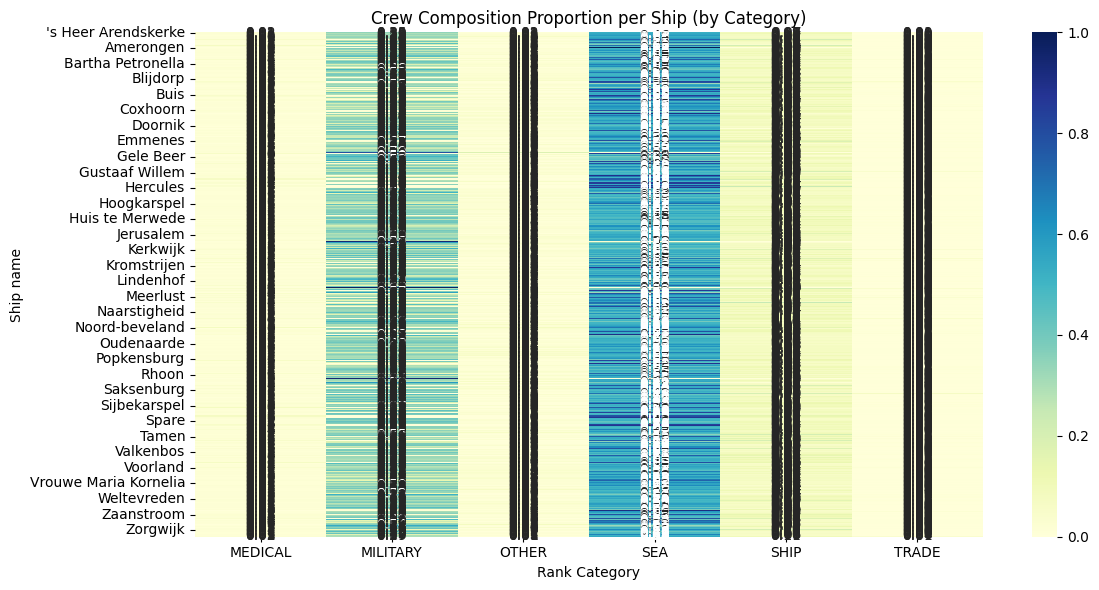

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(crew_pivot, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Crew Composition Proportion per Ship (by Category)")
plt.xlabel("Rank Category")
plt.ylabel("Ship name")
plt.tight_layout()
plt.show()

a. Compare hiring practices across VOC chambers: contract lengths, ranks, regions of origin

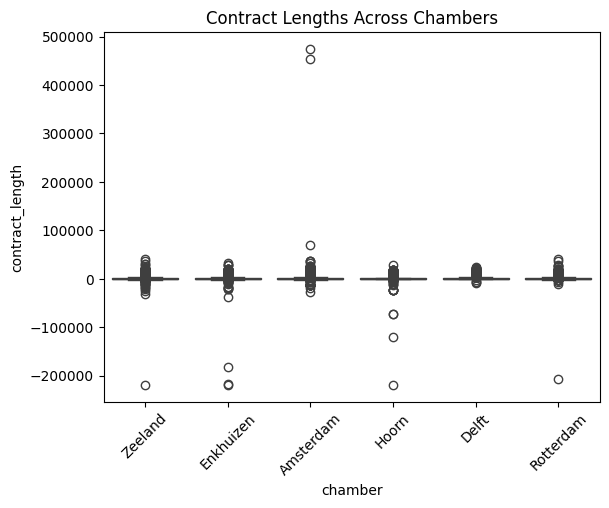

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Contract lengths per chamber
sns.boxplot(data=df_contracts_sources_ranks, x='chamber', y='contract_length')
plt.title('Contract Lengths Across Chambers')
plt.xticks(rotation=45)
plt.show()

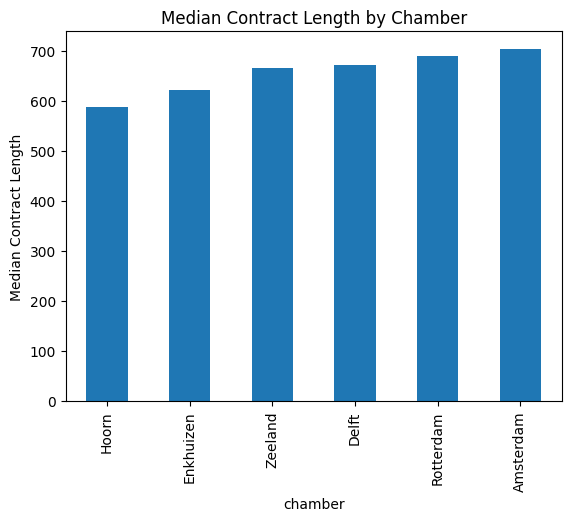

In [79]:
# Median contract length per chamber
df_contracts_sources_ranks.groupby('chamber')['contract_length'].median().sort_values().plot(kind='bar')
plt.ylabel('Median Contract Length')
plt.title('Median Contract Length by Chamber')
plt.show()

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_59299/177775472.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


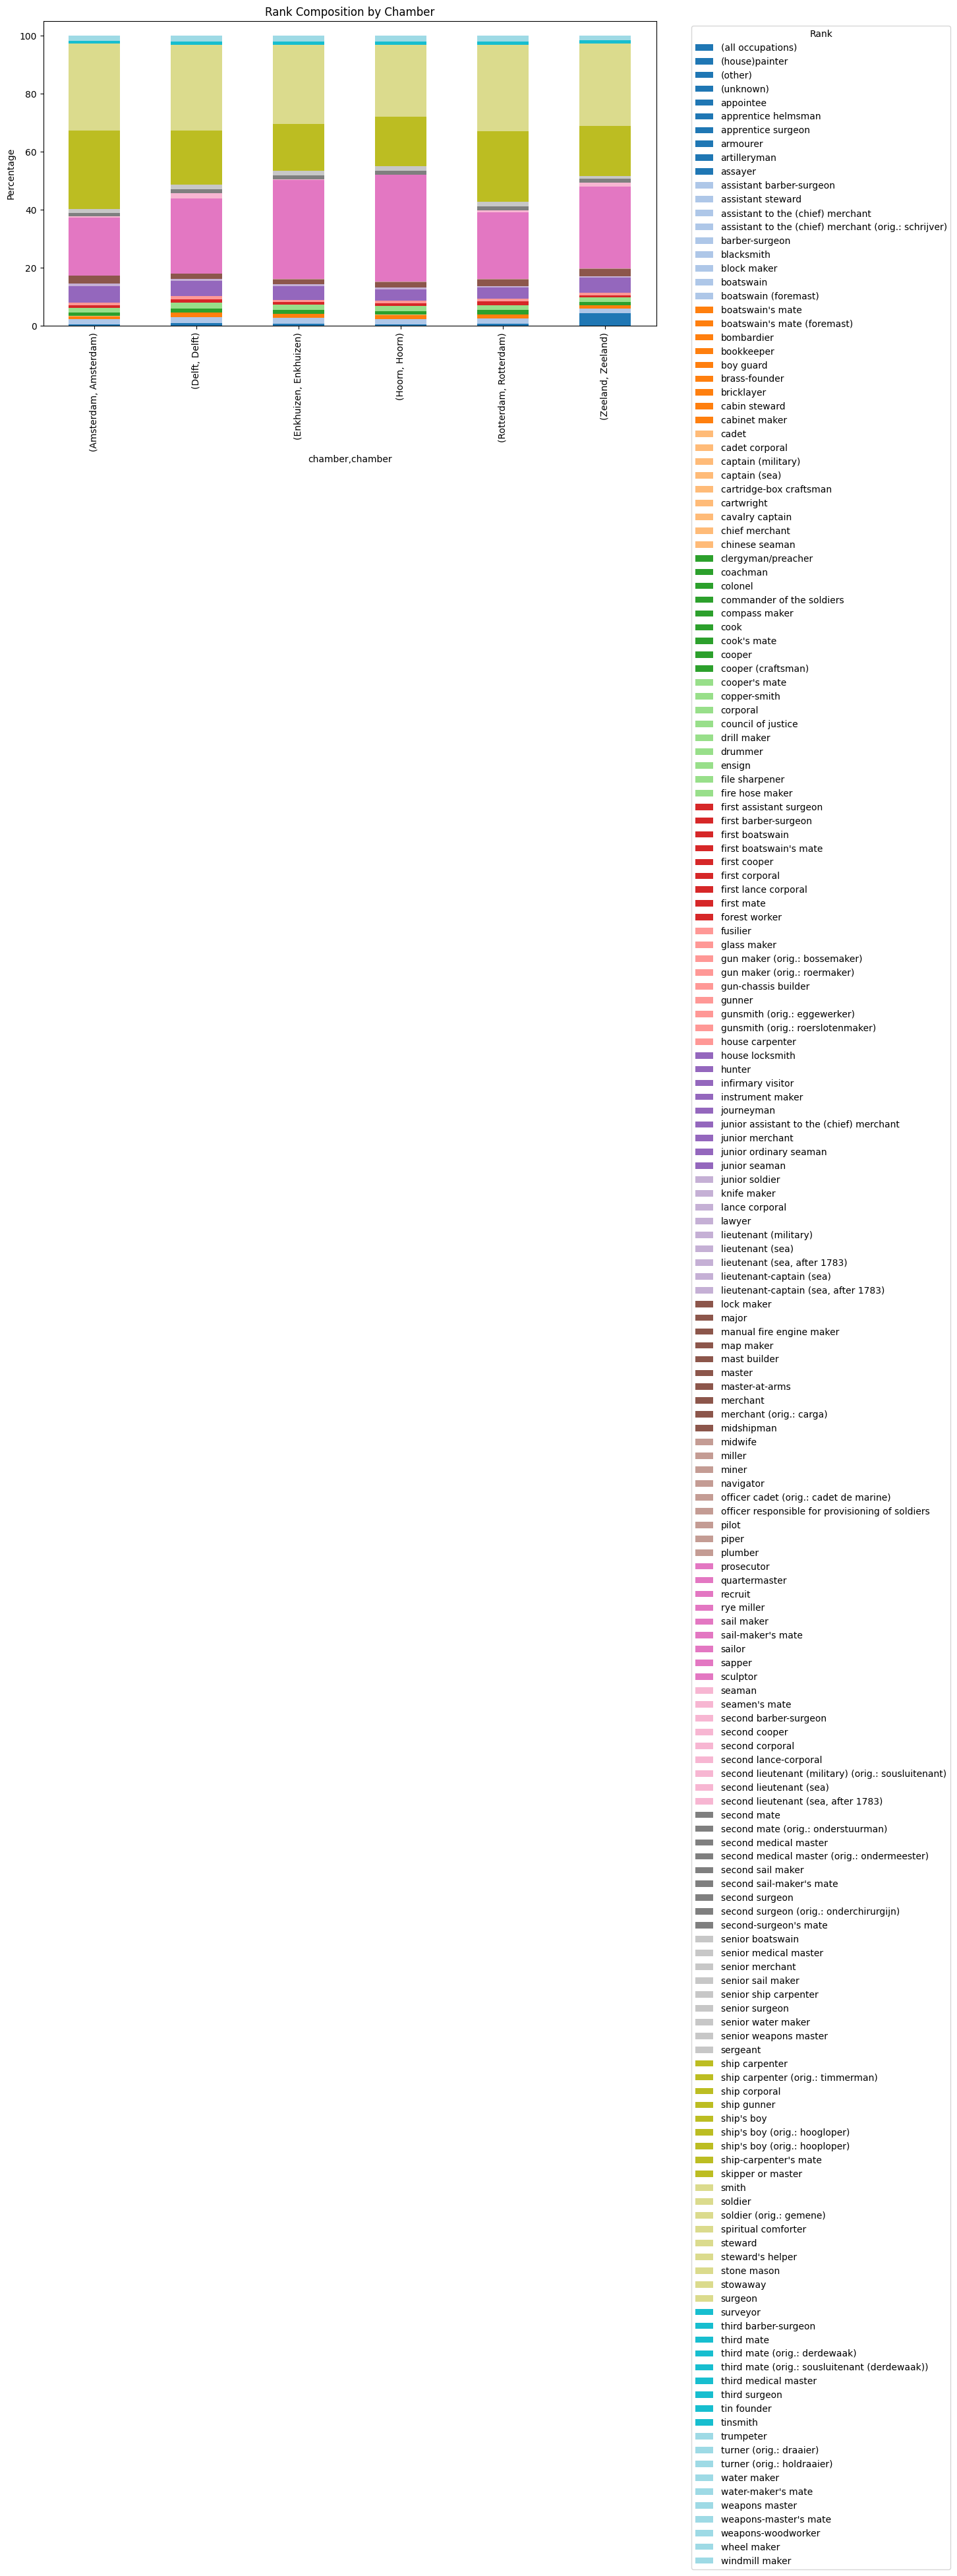

In [80]:
# Rank Composition by Chamber
rank_dist = (
    df_contracts_sources_ranks.groupby(['chamber', 'rank_x'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
    .fillna(0)
)

rank_dist.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.ylabel('Percentage')
plt.title('Rank Composition by Chamber')
plt.legend(title='Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

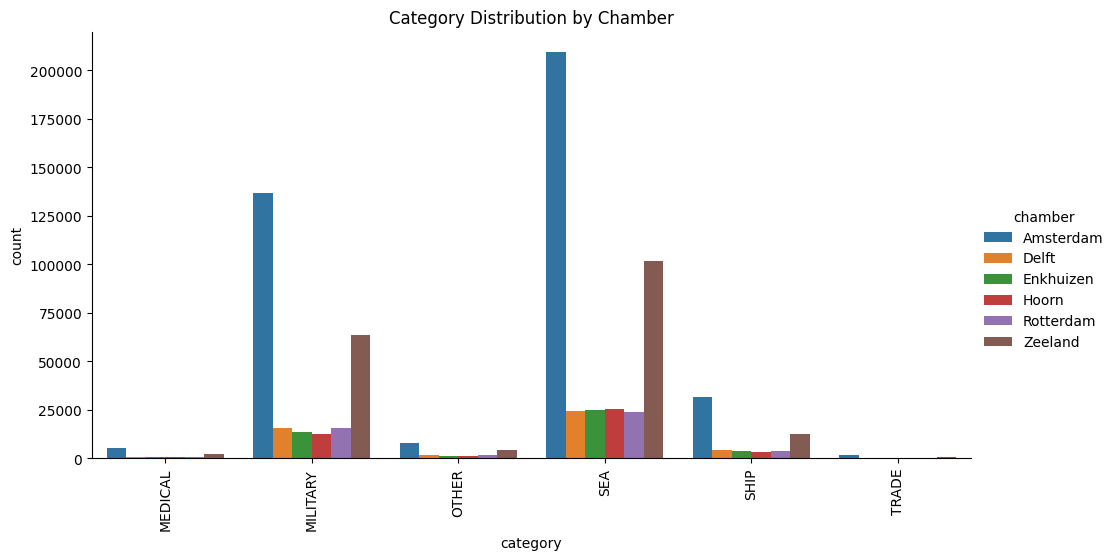

In [81]:
# Count of categories per chamber
rank_counts = df_contracts_sources_ranks.groupby(['chamber', 'category']).size().reset_index(name='count')

# Plot as barplot
sns.catplot(data=rank_counts, x='category', y='count', hue='chamber', kind='bar', height=5, aspect=2)
plt.xticks(rotation=90)
plt.title('Category Distribution by Chamber')
plt.show()

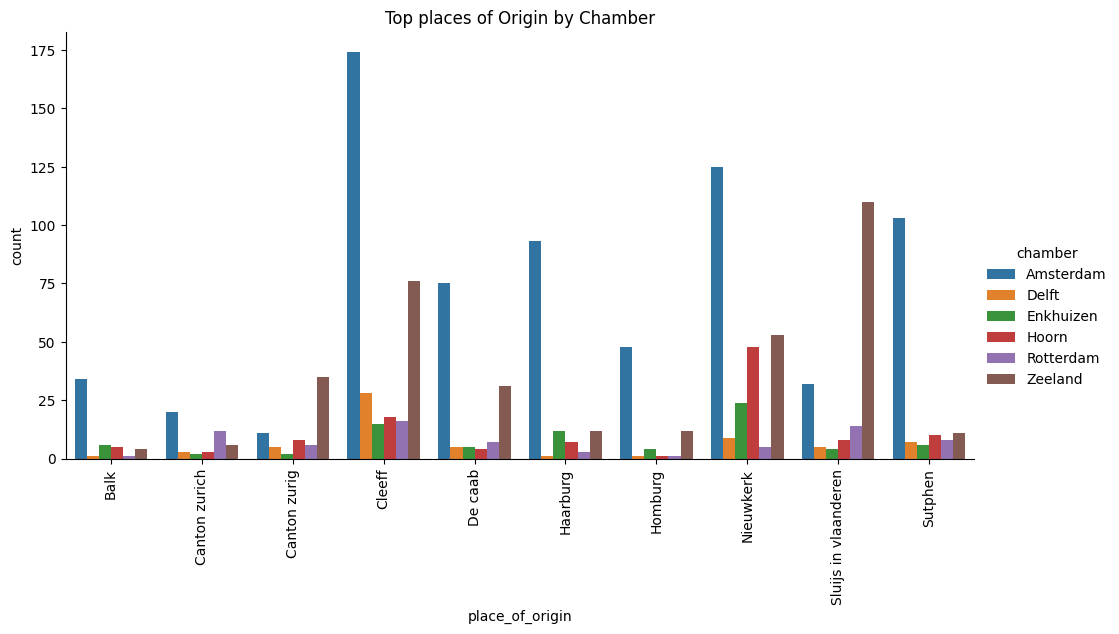

In [82]:
# Count places of origin per chamber
origin_counts = df_contracts_sources_ranks.groupby(['chamber', 'place_of_origin']).size().reset_index(name='count')

# Optional: Show top regions only
top_places = origin_counts['place_of_origin'].value_counts().nlargest(10).index
filtered_origin_counts = origin_counts[origin_counts['place_of_origin'].isin(top_places)]

sns.catplot(data=filtered_origin_counts, x='place_of_origin', y='count', hue='chamber', kind='bar', height=5, aspect=2)
plt.xticks(rotation=90)
plt.title('Top places of Origin by Chamber')
plt.show()

# 5. merge "voc_persons_contracts.csv" with "names.csv"

In [83]:
df_voc_names = pd.read_csv('/Users/zhujiaqi/Downloads/VOC_Dataset/enriched/voc_names.csv')
print(len(df_voc_names))

774200


In [84]:
df_contracts_names = pd.merge(df_voc_persons_contracts, df_voc_names, on = "vocop_id")
len(df_contracts_names)

774200

In [85]:
# Convert to datetime if not already done (handle out-of-bounds earlier if needed!)
df_contracts_names['date_begin_contract'] = pd.to_datetime(df_contracts_names['date_begin_contract'], errors='coerce')

# Extract decade
df_contracts_names['decade'] = (df_contracts_names['date_begin_contract'].dt.year // 10) * 10

In [86]:
top_names_by_decade_rank = (
    df_contracts_names.groupby(['decade', 'rank', 'family_name_normalized'])
    .size()
    .reset_index(name='count')
    .sort_values(['decade', 'rank', 'count'], ascending=[True, True, False])
)

In [87]:
top_names_by_place_rank = (
    df_contracts_names.groupby(['place_of_origin', 'rank', 'family_name_normalized'])
    .size()
    .reset_index(name='count')
    .sort_values(['place_of_origin', 'rank', 'count'], ascending=[True, True, False])
)

In [88]:
top5_per_decade_rank = (
    top_names_by_decade_rank.groupby(['decade', 'rank']).head(5)
)

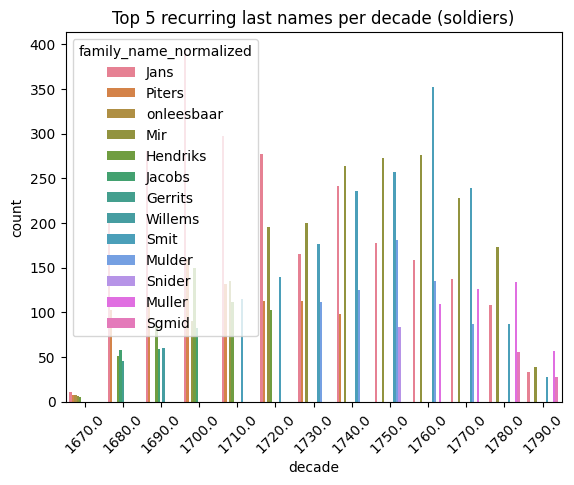

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Top families per decade for a specific rank
sns.barplot(data=top5_per_decade_rank[top5_per_decade_rank['rank'] == 'soldier'],
            x='decade', y='count', hue='family_name_normalized')
plt.title('Top 5 recurring last names per decade (soldiers)')
plt.xticks(rotation=45)
plt.show()

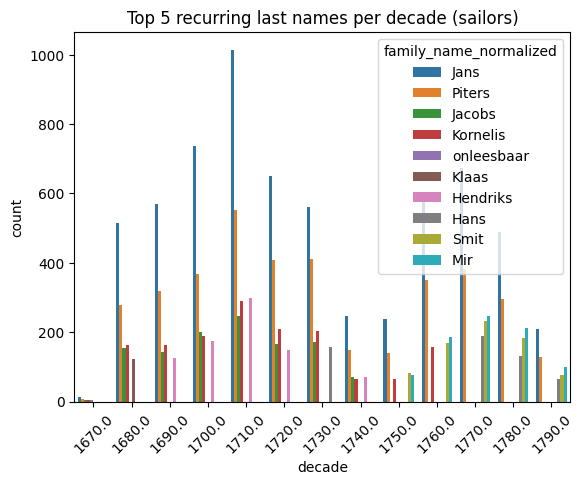

In [90]:
sns.barplot(data=top5_per_decade_rank[top5_per_decade_rank['rank'] == 'sailor'],
            x='decade', y='count', hue='family_name_normalized')
plt.title('Top 5 recurring last names per decade (sailors)')
plt.xticks(rotation=45)
plt.show()

# 6. merge "voc_persons_contracts.csv" with "places.csv"

In [91]:
df_voc_places = pd.read_csv('/Users/zhujiaqi/Downloads/VOC_Dataset/enriched/voc_places.csv')
print(len(df_voc_places))

152315


In [92]:
df_contracts_places = pd.merge(df_voc_persons_contracts, df_voc_places, on = "place_id")
len(df_contracts_places)

769891

<Axes: title={'center': 'Top 20 Places of Origin'}, ylabel='place_of_origin'>

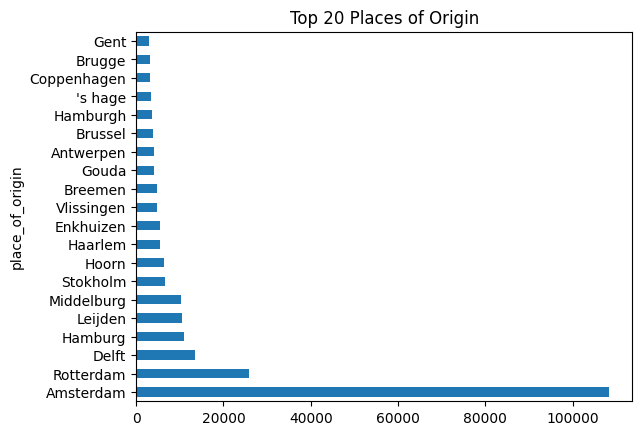

In [93]:
top_places = df_contracts_places['place_of_origin'].value_counts().head(20)
top_places.plot(kind='barh', title='Top 20 Places of Origin')

In [94]:
df_contracts_ranks_places = pd.merge(df_contracts_ranks, df_voc_places, on = "place_id")
len(df_contracts_ranks_places)

760333

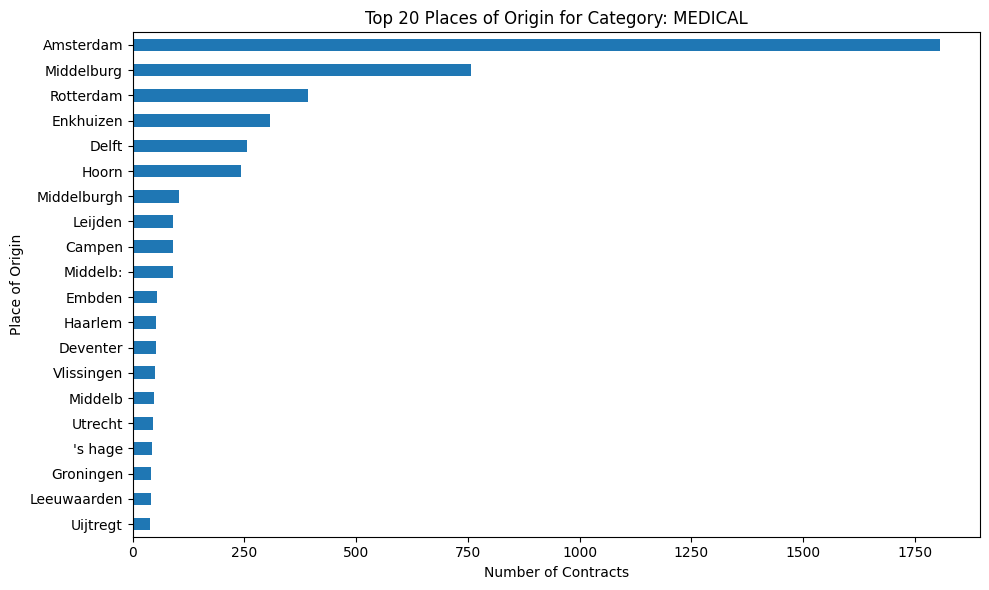

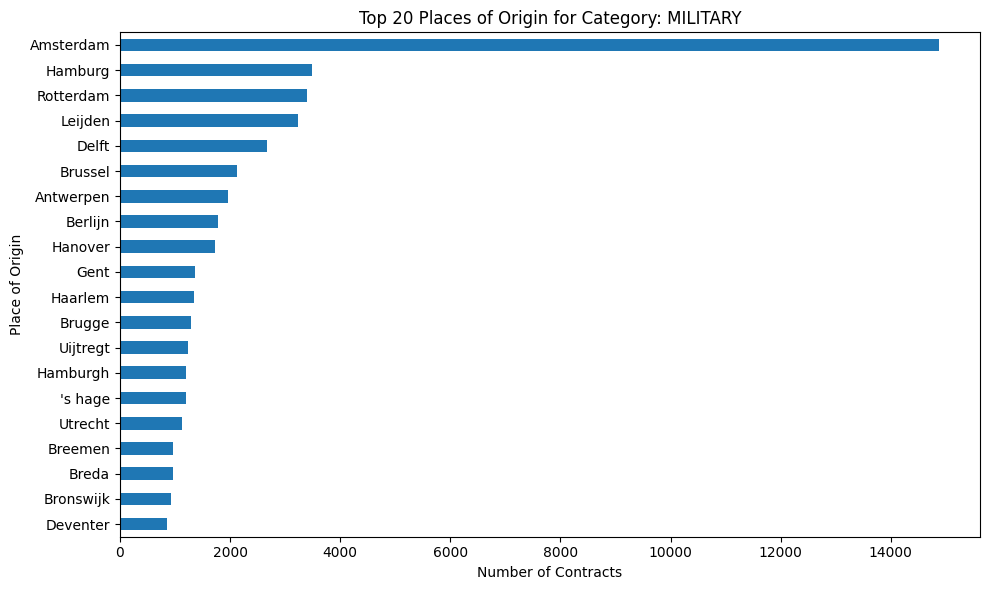

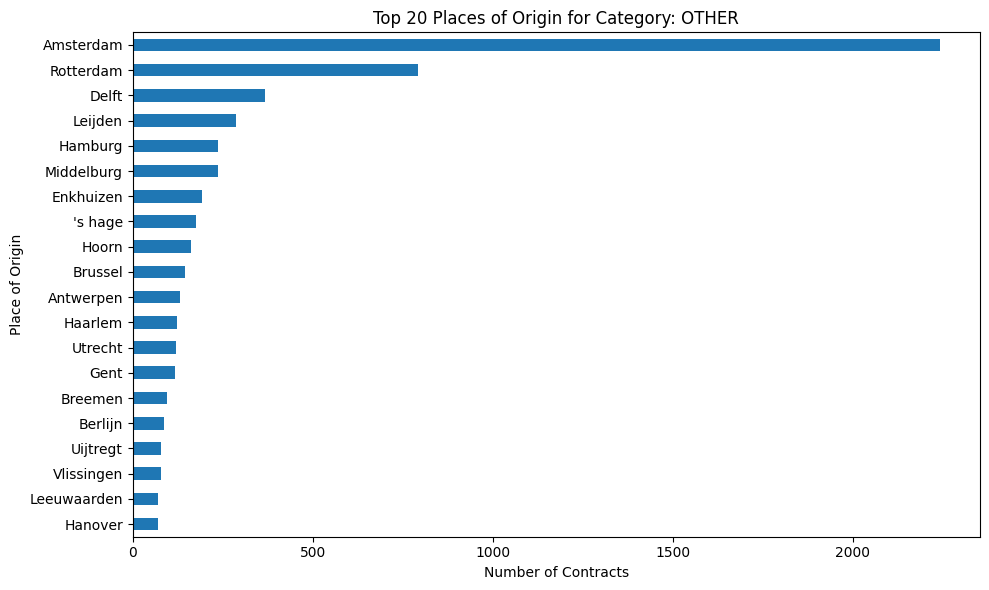

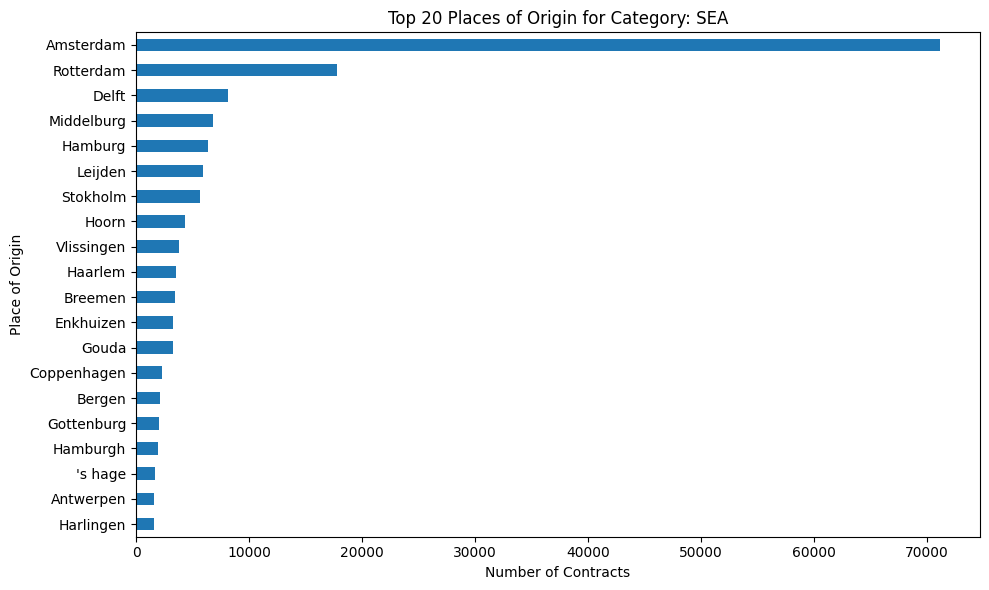

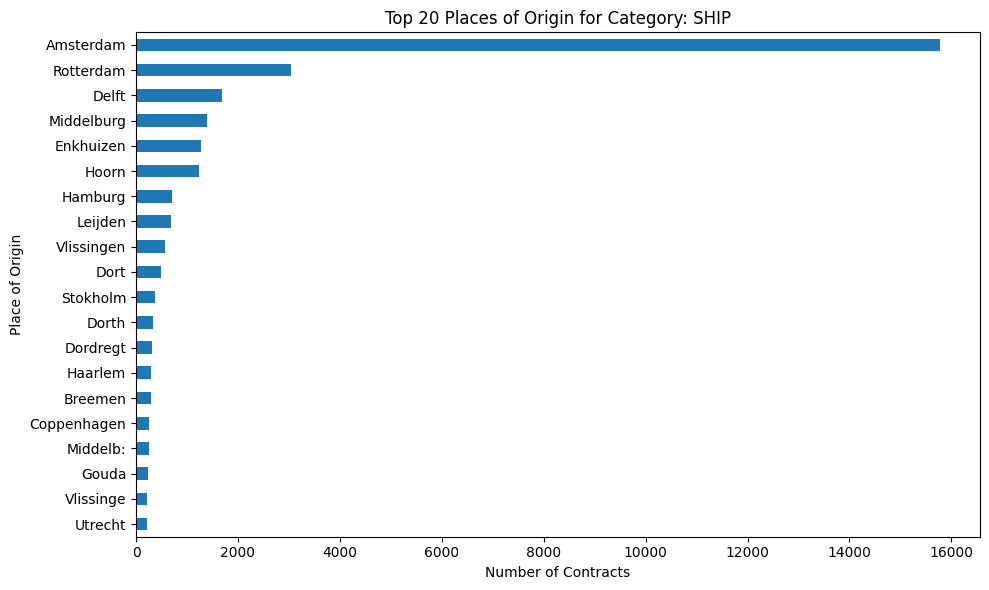

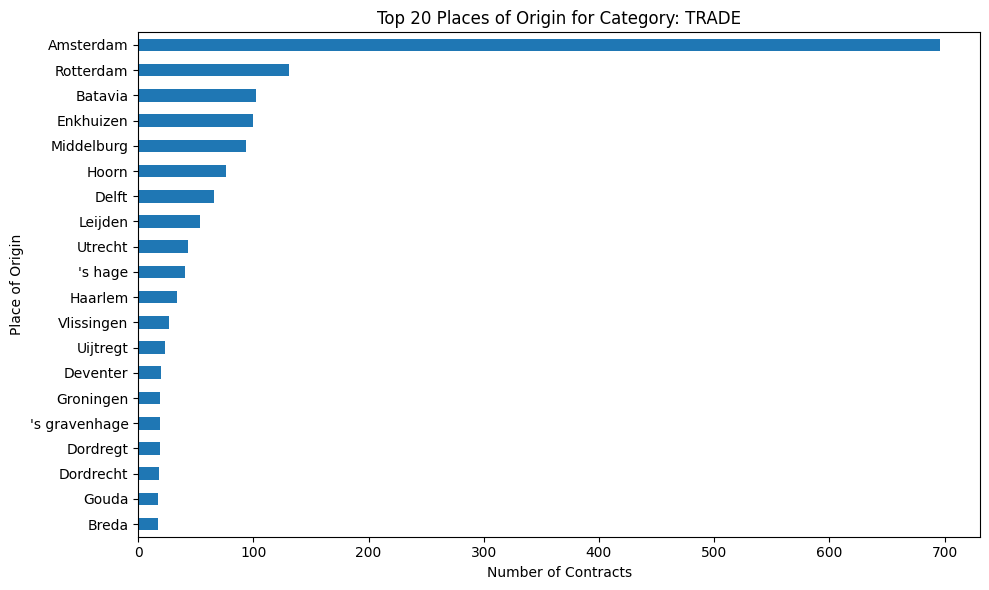

In [95]:
import matplotlib.pyplot as plt

# Drop rows where either rank or place is missing
df_filtered = df_contracts_ranks_places.dropna(subset=['category', 'place_of_origin'])

# Group by rank and count places
grouped = df_filtered.groupby('category')['place_of_origin'].value_counts()

# For each rank, get top 20 places and plot
for category in grouped.index.get_level_values(0).unique():
    top_places = grouped[category].head(20)  # top 20 for that rank
    
    plt.figure(figsize=(10, 6))
    top_places.sort_values().plot(kind='barh')
    plt.title(f"Top 20 Places of Origin for Category: {category}")
    plt.xlabel("Number of Contracts")
    plt.ylabel("Place of Origin")
    plt.tight_layout()
    plt.show()

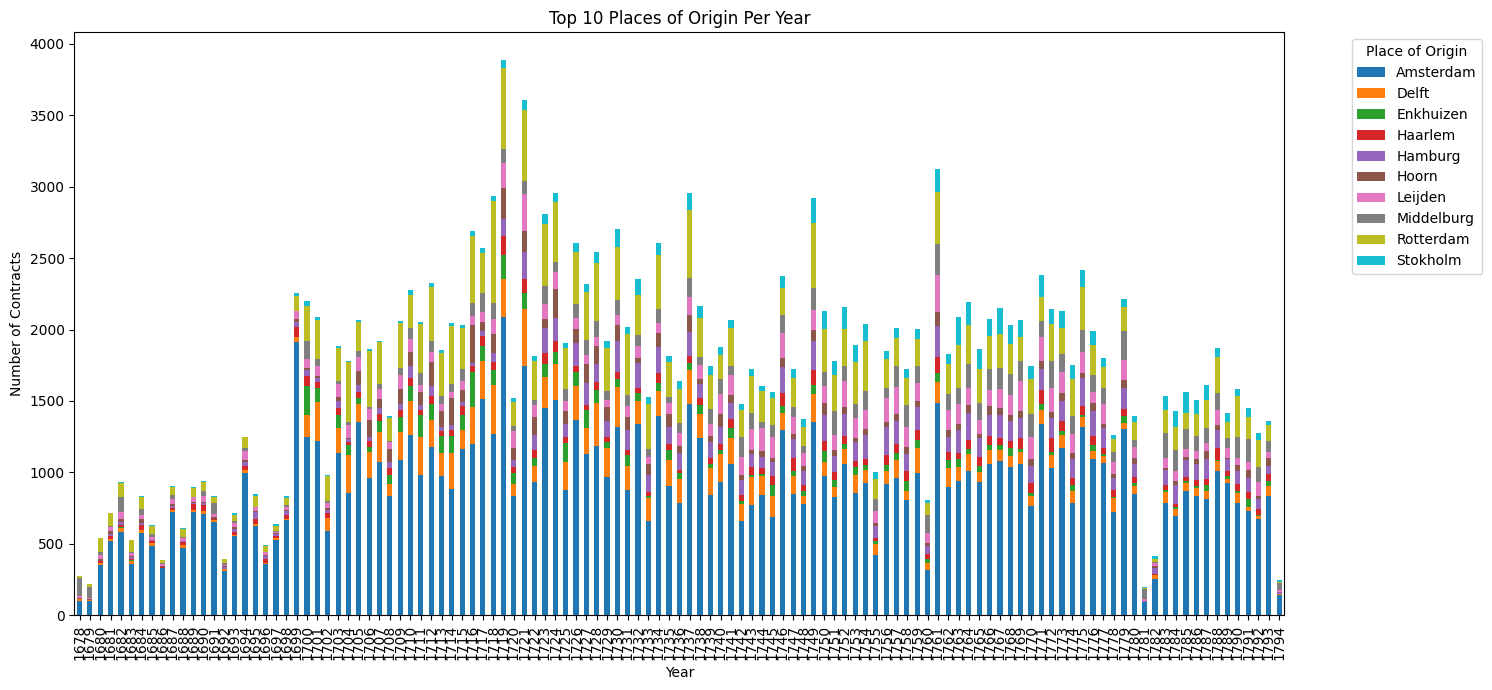

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date column is datetime
df_contracts_ranks_places['date_begin_contract'] = pd.to_datetime(df_contracts_ranks_places['date_begin_contract'], errors='coerce')
df_contracts_ranks_places['year_begin'] = df_contracts_ranks_places['date_begin_contract'].dt.year

# Limit to top N places overall to keep plot readable
top_places_overall = df_contracts_ranks_places['place_of_origin'].value_counts().head(10).index

# Filter only those rows
filtered = df_contracts_ranks_places[df_contracts_ranks_places['place_of_origin'].isin(top_places_overall)]

# Group by year and place_of_origin
grouped = filtered.groupby(['year_begin', 'place_of_origin']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(15, 7), title='Top 10 Places of Origin Per Year')
plt.ylabel('Number of Contracts')
plt.xlabel('Year')
plt.legend(title='Place of Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

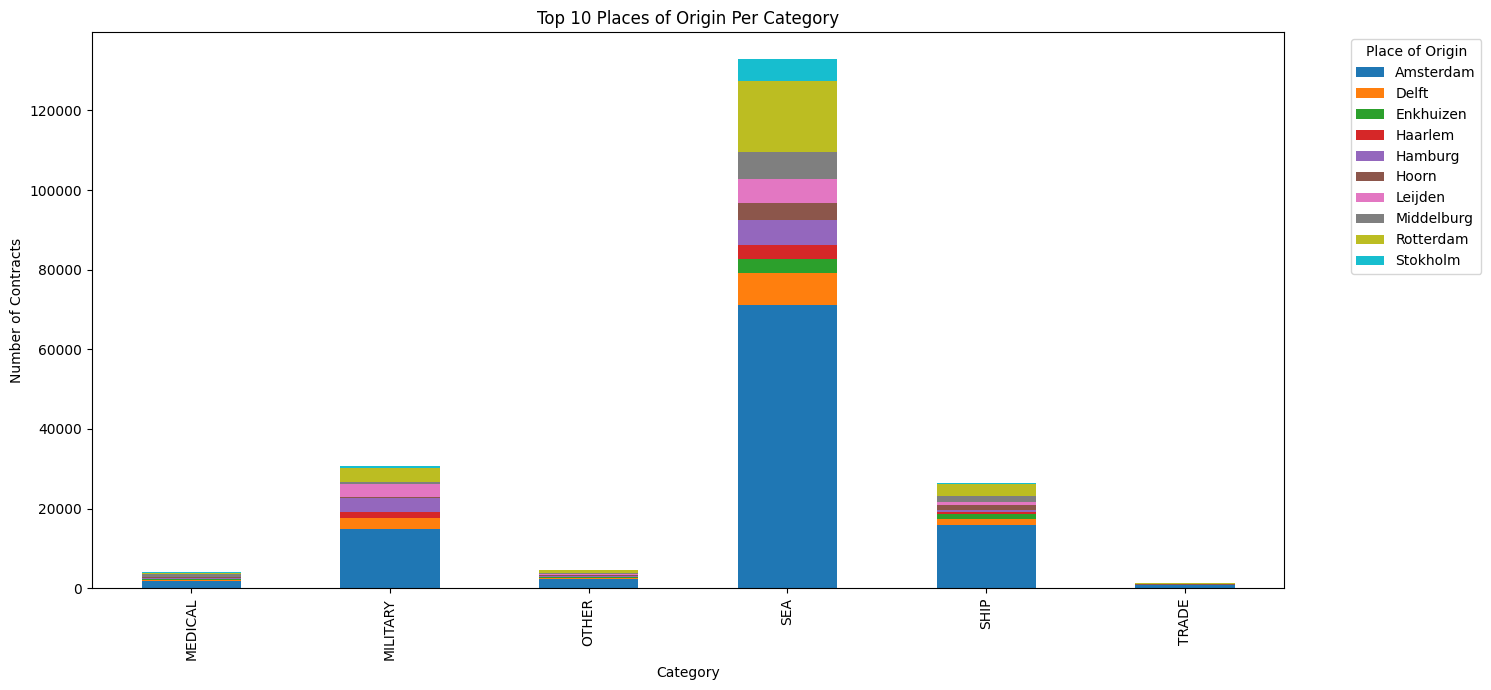

In [97]:
top_places_overall = df_contracts_ranks_places['place_of_origin'].value_counts().head(10).index
filtered = df_contracts_ranks_places[df_contracts_ranks_places['place_of_origin'].isin(top_places_overall)]
grouped = filtered.groupby(['category', 'place_of_origin']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True, figsize=(15, 7), title='Top 10 Places of Origin Per Category')
plt.ylabel('Number of Contracts')
plt.xlabel('Category')
plt.legend(title='Place of Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

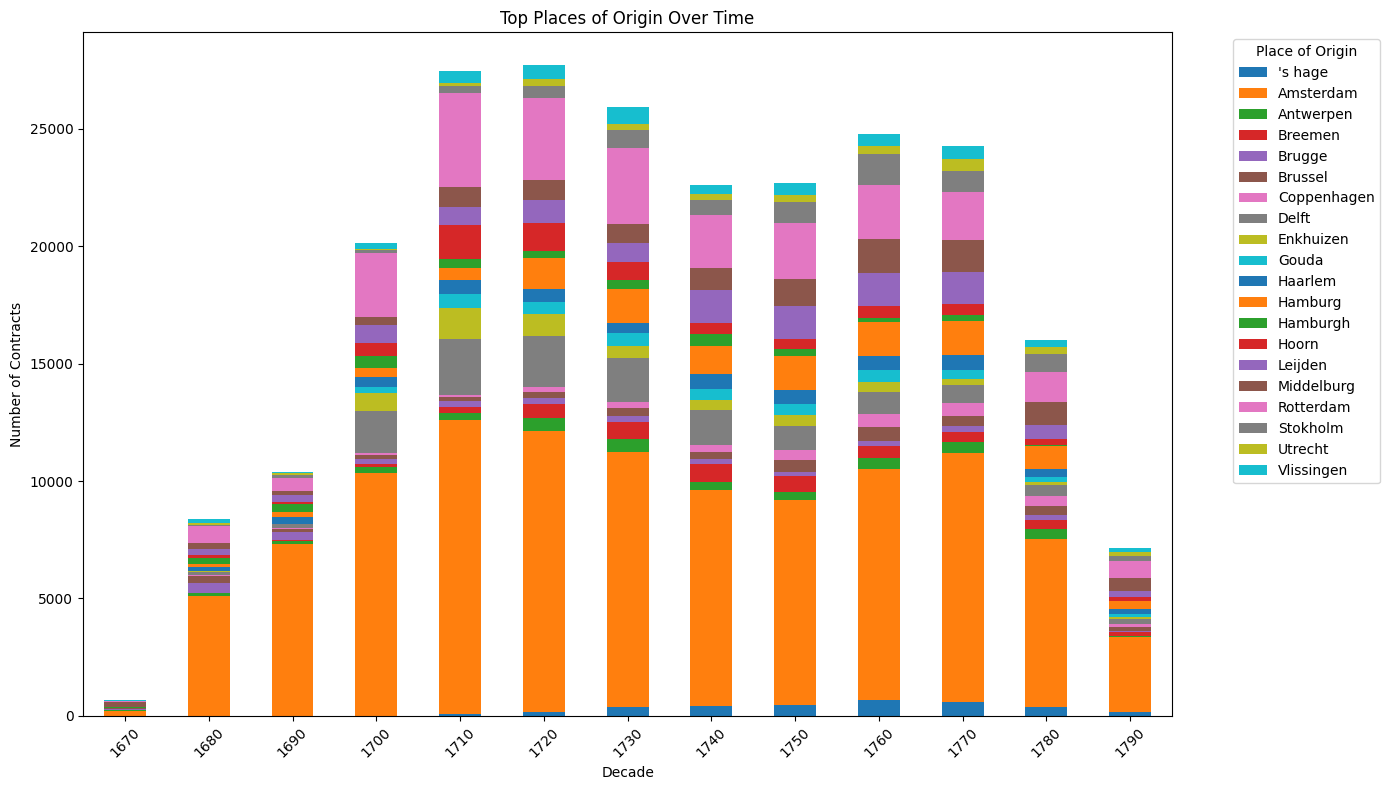

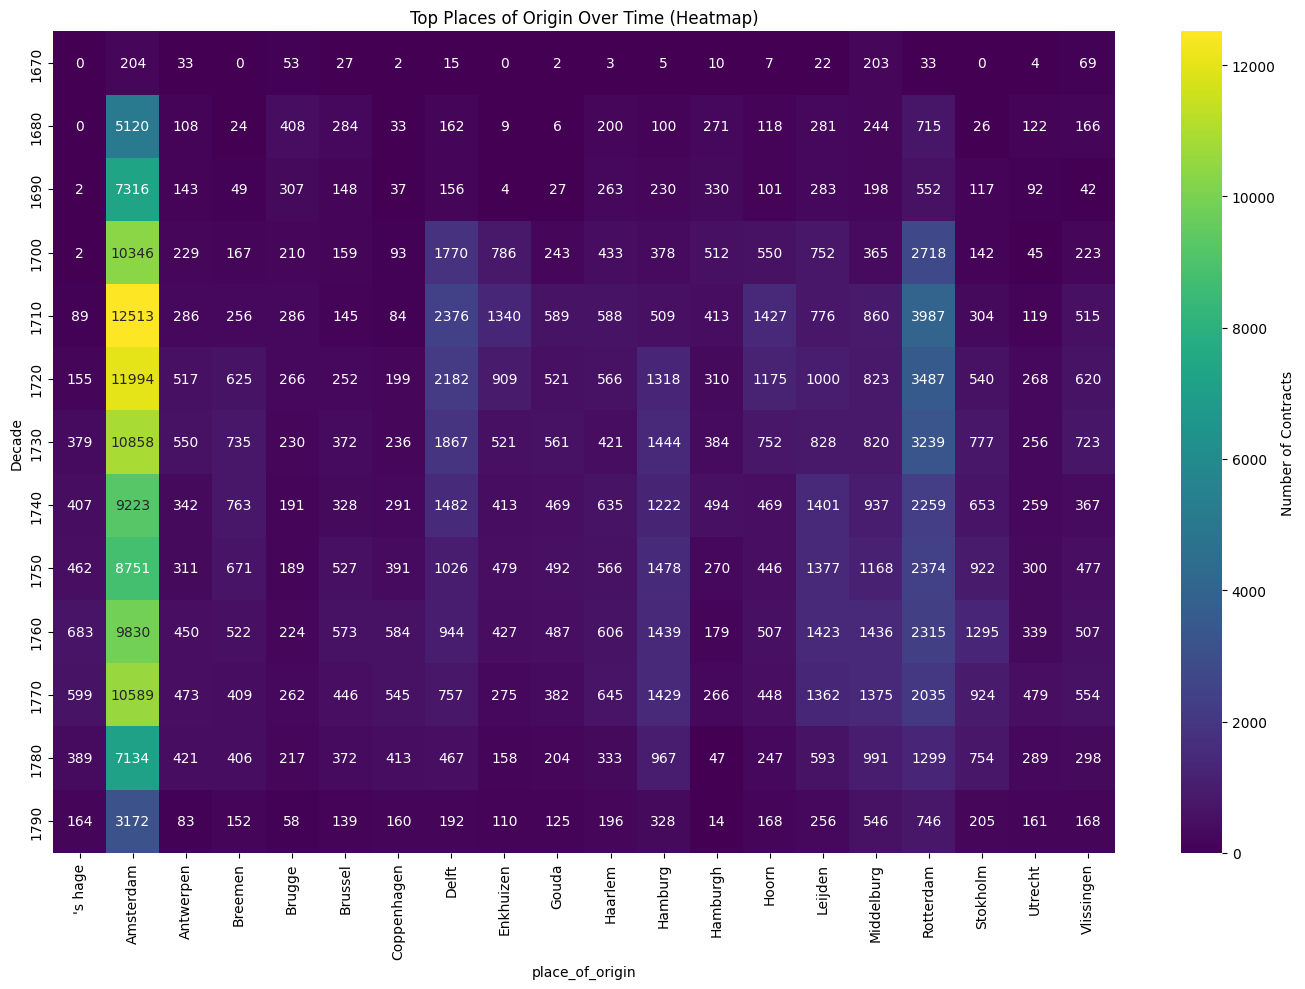

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First, check if we have duplicate columns
#print(df_contracts_ranks_places.columns.value_counts())

# If there are duplicate 'place_of_origin' columns, let's fix that first
# Keep only one instance of the column
if df_contracts_ranks_places.columns.value_counts()['place_of_origin'] > 1:
    # Get column positions
    cols_pos = [i for i, col in enumerate(df_contracts_ranks_places.columns) if col == 'place_of_origin']
    # Keep the first occurrence and rename others
    for i, pos in enumerate(cols_pos[1:], 1):
        df_contracts_ranks_places.columns.values[pos] = f'place_of_origin_{i}'
        
# Make sure date_begin_contract is datetime
df_contracts_ranks_places['date_begin_contract'] = pd.to_datetime(
    df_contracts_ranks_places['date_begin_contract'], errors='coerce'
)

# Create a 'year' column
df_contracts_ranks_places['year'] = df_contracts_ranks_places['date_begin_contract'].dt.year

# Create a 'decade' column by flooring the year to the nearest decade
df_contracts_ranks_places['decade'] = (df_contracts_ranks_places['year'] // 10) * 10


# Alternative approach: Create a count table directly instead of using pivot_table
# Group by decade and place of origin
place_counts = df_contracts_ranks_places.groupby(['decade', 'place_of_origin']).size().reset_index(name='count')

# Get top 20 places overall
top_places_overall = df_contracts_ranks_places['place_of_origin'].value_counts().nlargest(20).index.tolist()

# Filter for only the top places
place_counts_filtered = place_counts[place_counts['place_of_origin'].isin(top_places_overall)]

# Reshape the data into the desired format (wide format)
places_by_decade = place_counts_filtered.pivot(index='decade', columns='place_of_origin', values='count').fillna(0)

# Plot the data
plt.figure(figsize=(14, 8))
places_by_decade.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top Places of Origin Over Time')
plt.xlabel('Decade')
plt.ylabel('Number of Contracts')
plt.xticks(rotation=45)
plt.legend(title='Place of Origin', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create a heatmap for another visualization option
plt.figure(figsize=(14, 10))
sns.heatmap(places_by_decade, cmap='viridis', annot=True, fmt='.0f', cbar_kws={'label': 'Number of Contracts'})
plt.title('Top Places of Origin Over Time (Heatmap)')
plt.ylabel('Decade')
plt.tight_layout()
plt.show()

# 7. merge "voc_persons_contracts.csv" with "places_standardized.csv"

In [101]:
df_voc_places_standardized = pd.read_csv('/Users/zhujiaqi/Downloads/VOC_Dataset/enriched/voc_places_standardized.csv')
print(len(df_voc_places_standardized))

8591


In [102]:
df_contracts_ranks_places_standardized = pd.merge(df_contracts_ranks_places, df_voc_places_standardized, on = "place_standardized_id")
len(df_contracts_ranks_places_standardized)

629727

<Axes: title={'center': 'Top 20 Countries of Origin'}, ylabel='country_code'>

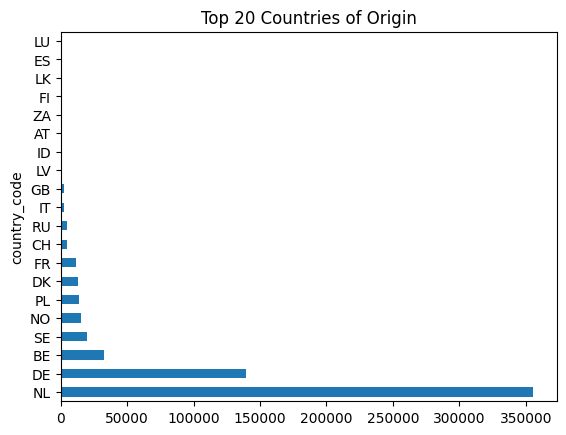

In [103]:
top_countries = df_contracts_ranks_places_standardized['country_code'].value_counts().head(20)
top_countries.plot(kind='barh', title='Top 20 Countries of Origin')

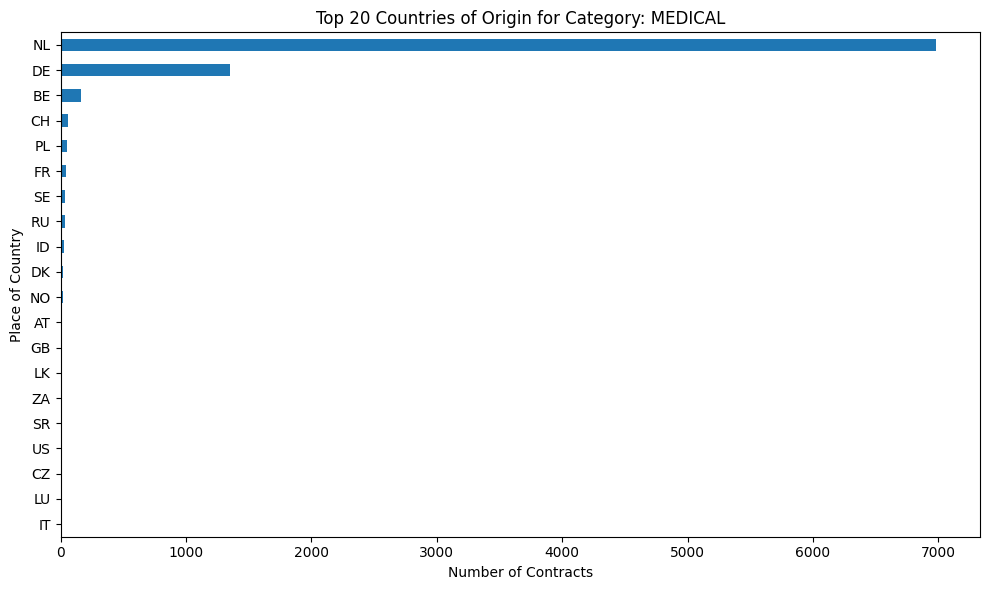

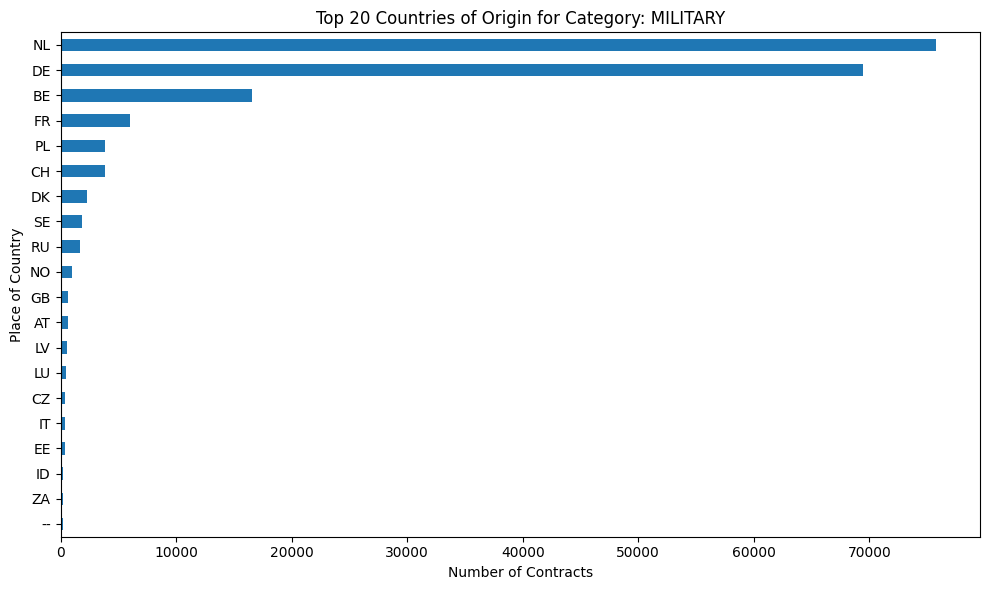

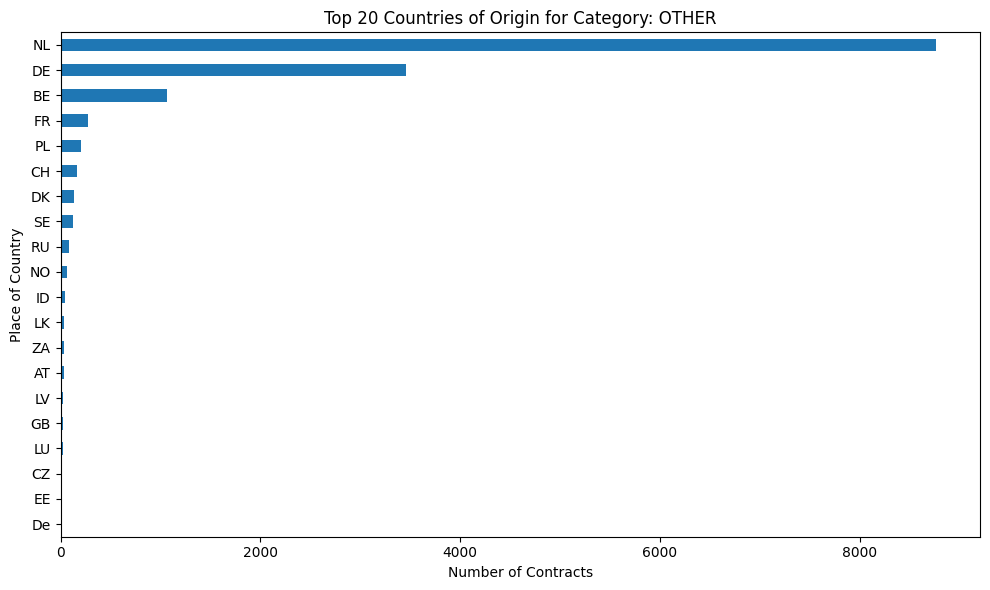

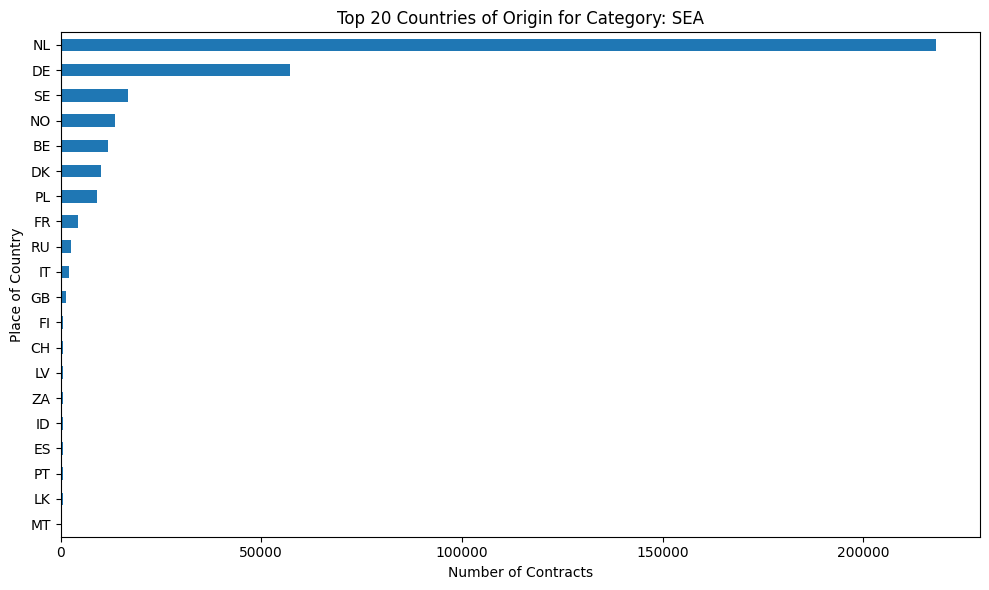

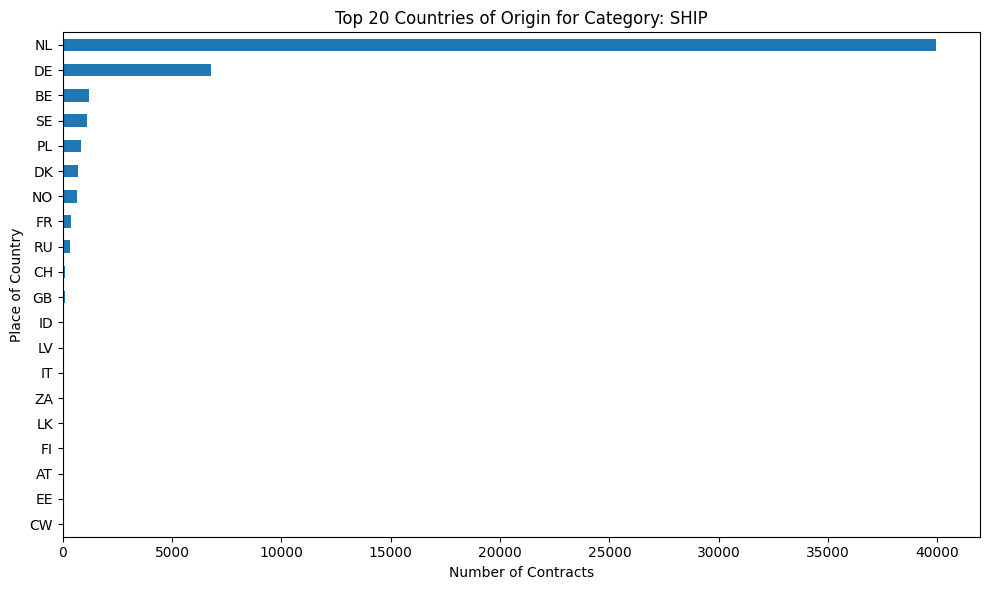

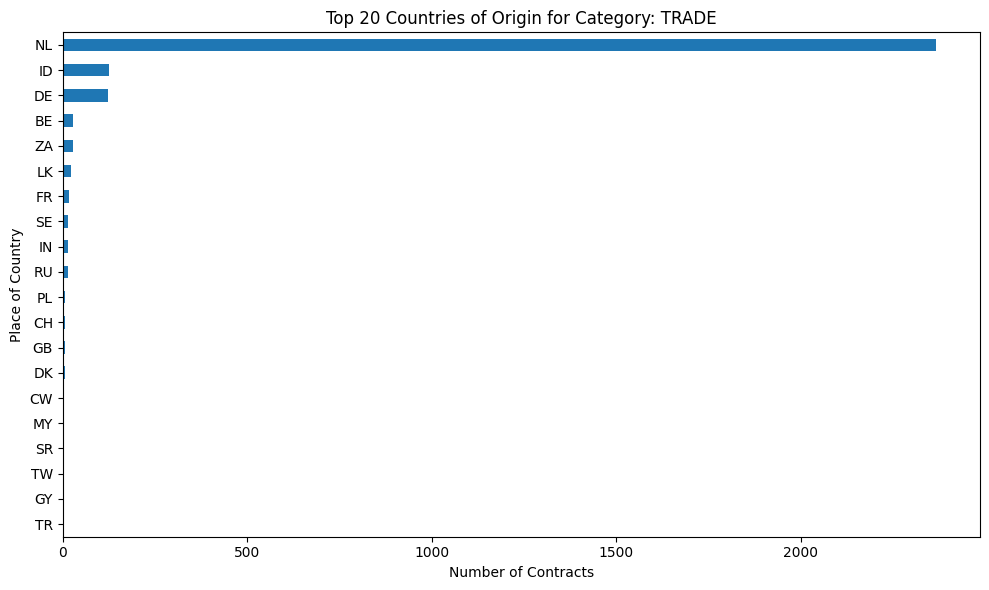

In [104]:
import matplotlib.pyplot as plt

# Drop rows where either rank or place is missing
df_filtered = df_contracts_ranks_places_standardized.dropna(subset=['category', 'country_code'])

# Group by rank and count places
grouped = df_filtered.groupby('category')['country_code'].value_counts()

# For each rank, get top 20 places and plot
for category in grouped.index.get_level_values(0).unique():
    top_countries = grouped[category].head(20)  # top 20 for that rank
    
    plt.figure(figsize=(10, 6))
    top_countries.sort_values().plot(kind='barh')
    plt.title(f"Top 20 Countries of Origin for Category: {category}")
    plt.xlabel("Number of Contracts")
    plt.ylabel("Place of Country")
    plt.tight_layout()
    plt.show()

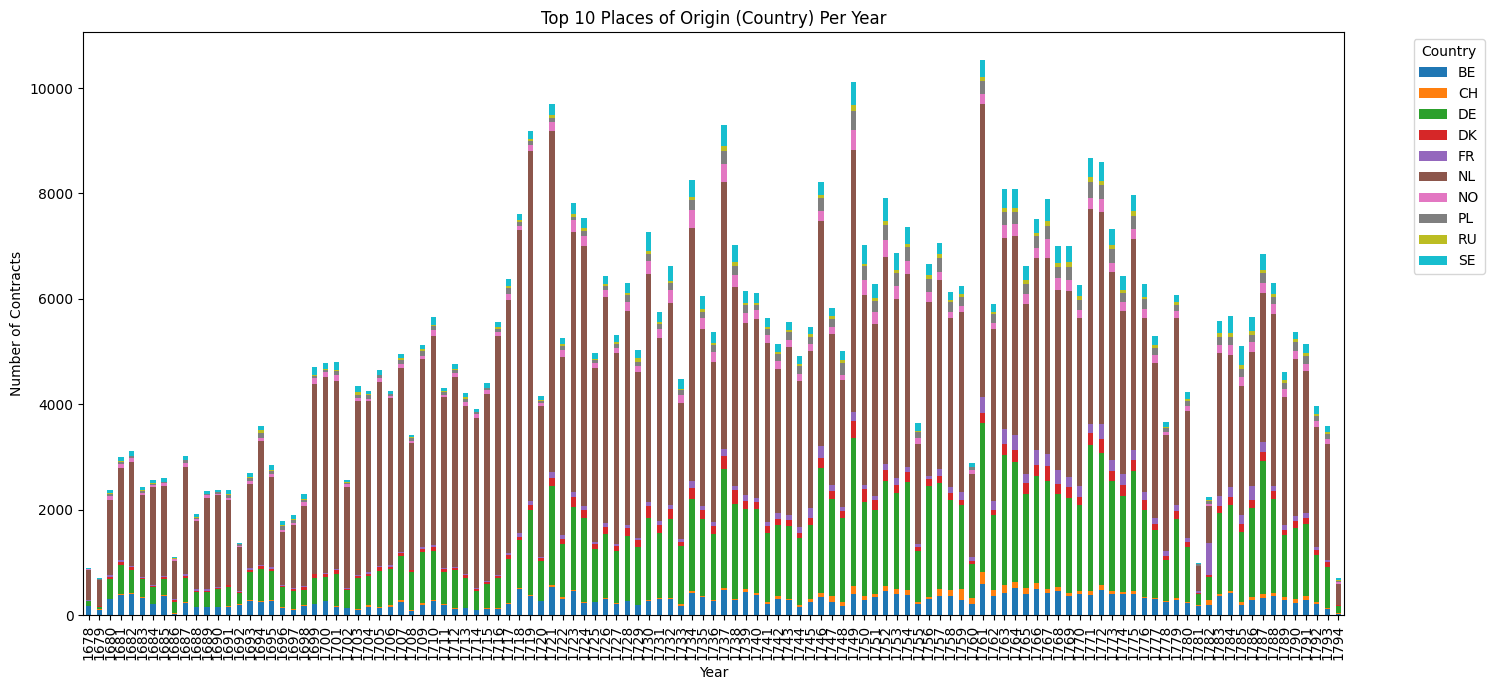

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date column is datetime
df_contracts_ranks_places_standardized['date_begin_contract'] = pd.to_datetime(df_contracts_ranks_places_standardized['date_begin_contract'], errors='coerce')
df_contracts_ranks_places_standardized['year_begin'] = df_contracts_ranks_places_standardized['date_begin_contract'].dt.year

# Limit to top N places overall to keep plot readable
top_places_overall = df_contracts_ranks_places_standardized['country_code'].value_counts().head(10).index

# Filter only those rows
filtered = df_contracts_ranks_places_standardized[df_contracts_ranks_places_standardized['country_code'].isin(top_places_overall)]

# Group by year and place_of_origin
grouped = filtered.groupby(['year_begin', 'country_code']).size().unstack(fill_value=0)

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(15, 7), title='Top 10 Places of Origin (Country) Per Year')
plt.ylabel('Number of Contracts')
plt.xlabel('Year')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

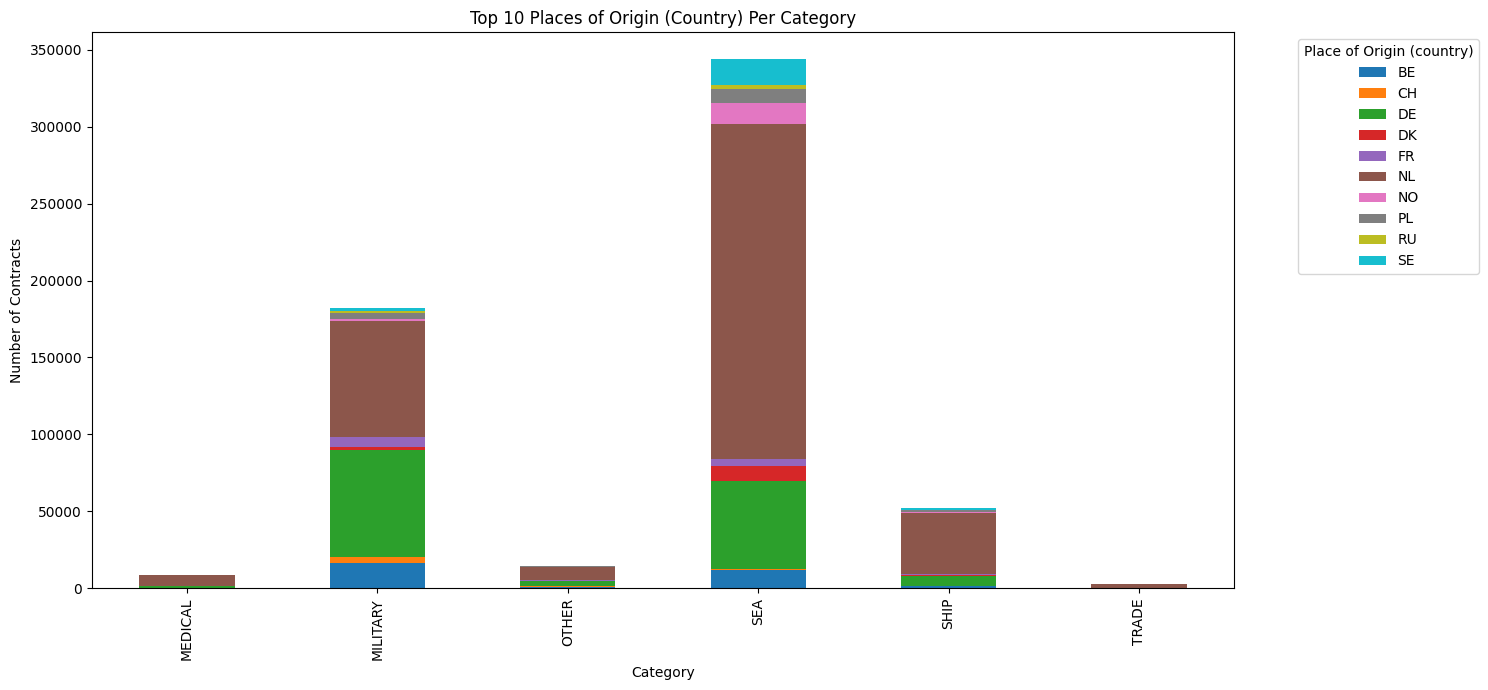

In [106]:
top_countries_overall = df_contracts_ranks_places_standardized['country_code'].value_counts().head(10).index
filtered = df_contracts_ranks_places_standardized[df_contracts_ranks_places_standardized['country_code'].isin(top_countries_overall)]
grouped = filtered.groupby(['category', 'country_code']).size().unstack(fill_value=0)

grouped.plot(kind='bar', stacked=True, figsize=(15, 7), title='Top 10 Places of Origin (Country) Per Category')
plt.ylabel('Number of Contracts')
plt.xlabel('Category')
plt.legend(title='Place of Origin (country)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

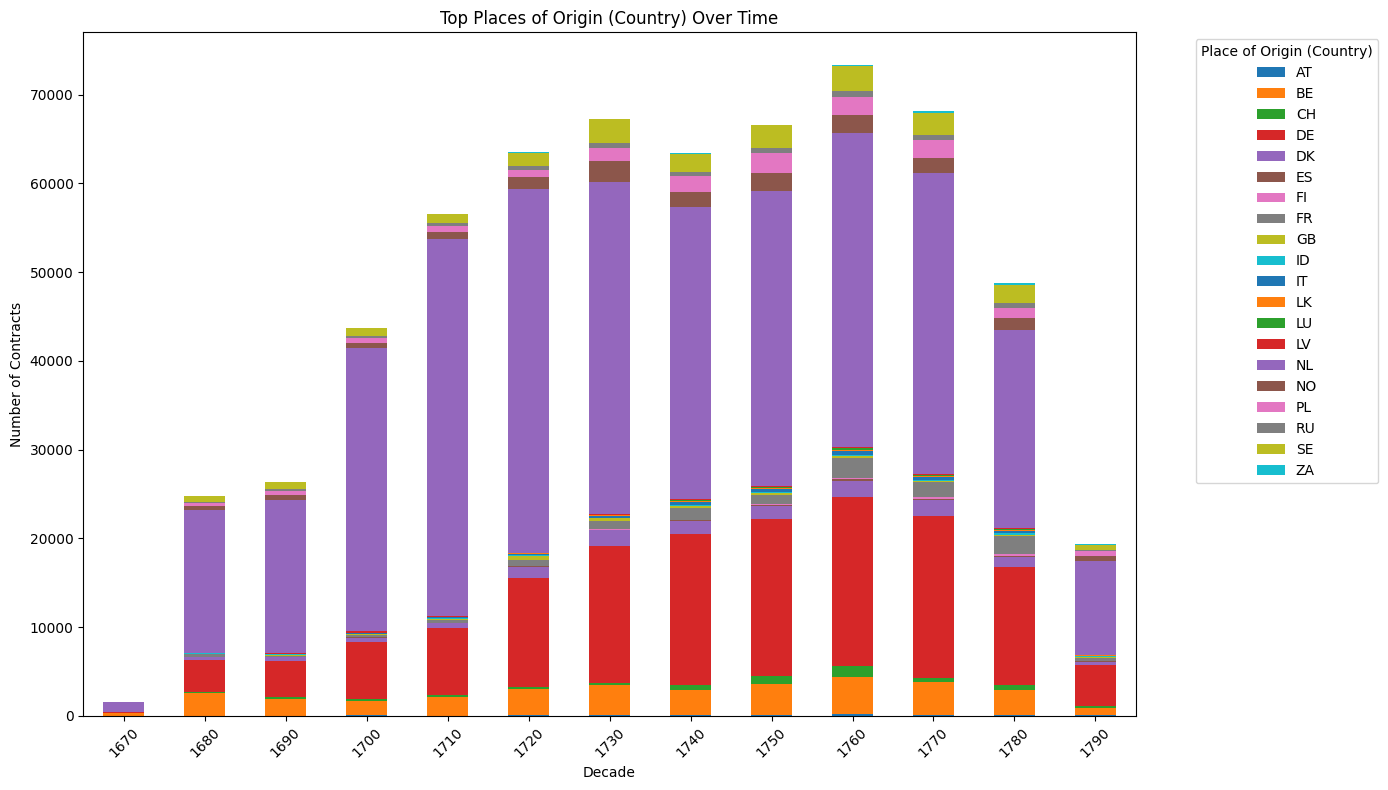

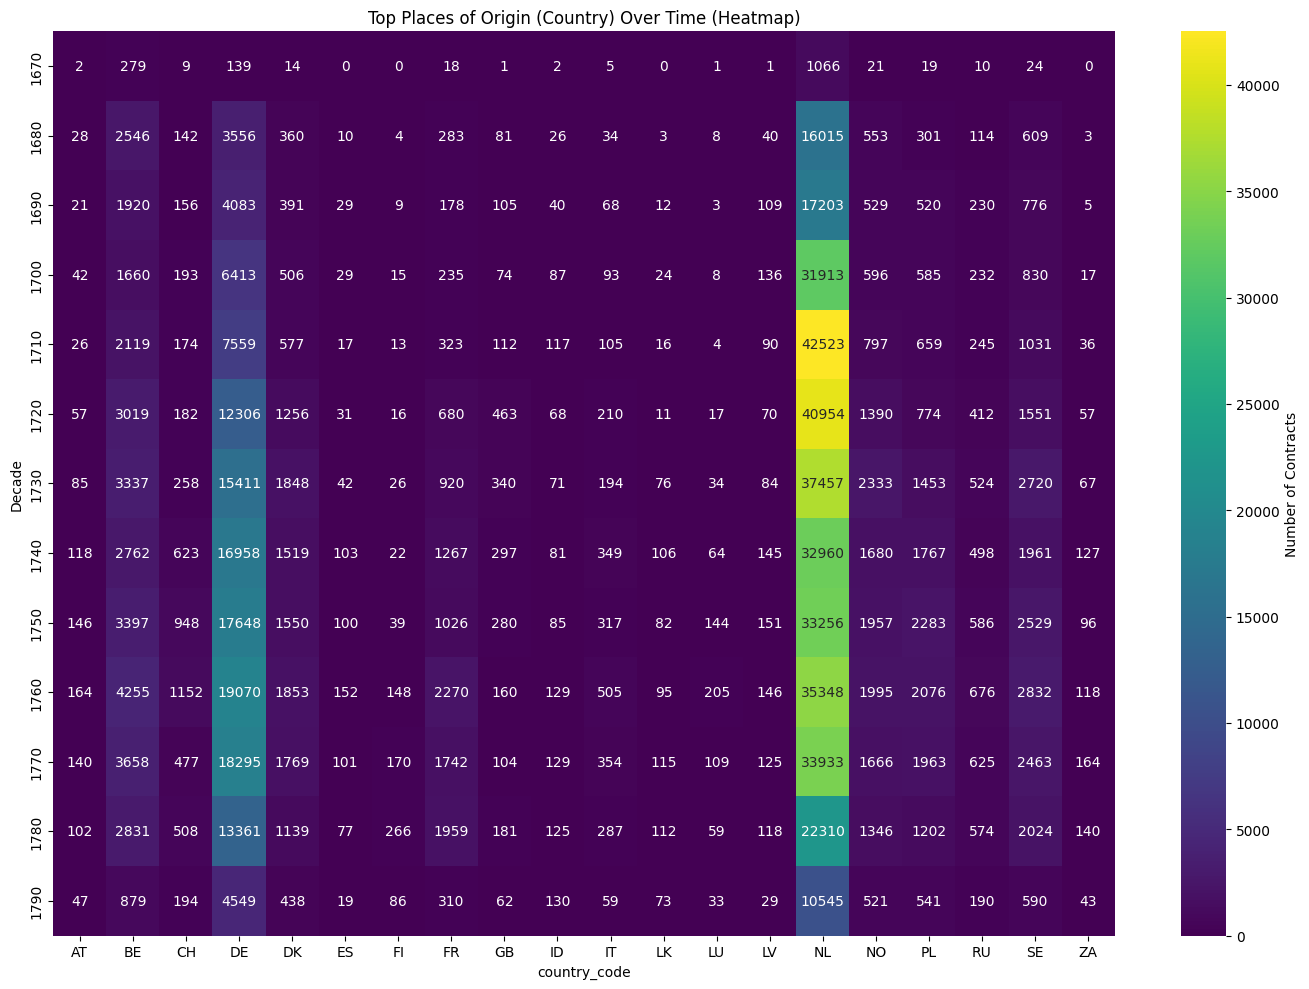

In [107]:
if df_contracts_ranks_places_standardized.columns.value_counts()['country_code'] > 1:
    # Get column positions
    cols_pos = [i for i, col in enumerate(df_contracts_ranks_places_standardized.columns) if col == 'country_code']
    # Keep the first occurrence and rename others
    for i, pos in enumerate(cols_pos[1:], 1):
        df_contracts_ranks_places_standardized.columns.values[pos] = f'country_code_{i}'

# Alternative approach: Create a count table directly instead of using pivot_table
# Group by decade and place of origin
country_counts = df_contracts_ranks_places_standardized.groupby(['decade', 'country_code']).size().reset_index(name='count')

# Get top 20 places overall
top_countries_overall = df_contracts_ranks_places_standardized['country_code'].value_counts().nlargest(20).index.tolist()

# Filter for only the top places
country_counts_filtered = country_counts[country_counts['country_code'].isin(top_countries_overall)]

# Reshape the data into the desired format (wide format)
countries_by_decade = country_counts_filtered.pivot(index='decade', columns='country_code', values='count').fillna(0)

# Plot the data
plt.figure(figsize=(14, 8))
countries_by_decade.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Top Places of Origin (Country) Over Time')
plt.xlabel('Decade')
plt.ylabel('Number of Contracts')
plt.xticks(rotation=45)
plt.legend(title='Place of Origin (Country)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create a heatmap for another visualization option
plt.figure(figsize=(14, 10))
sns.heatmap(countries_by_decade, cmap='viridis', annot=True, fmt='.0f', cbar_kws={'label': 'Number of Contracts'})
plt.title('Top Places of Origin (Country) Over Time (Heatmap)')
plt.ylabel('Decade')
plt.tight_layout()
plt.show()

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_59299/2624906557.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['category_avg_wage'] = filtered_data['category'].map(rank_avg_wages)
/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_59299/2624906557.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['wage_ratio'] = filtered_data['median_wage'] / filtered_data['category_avg_wage']


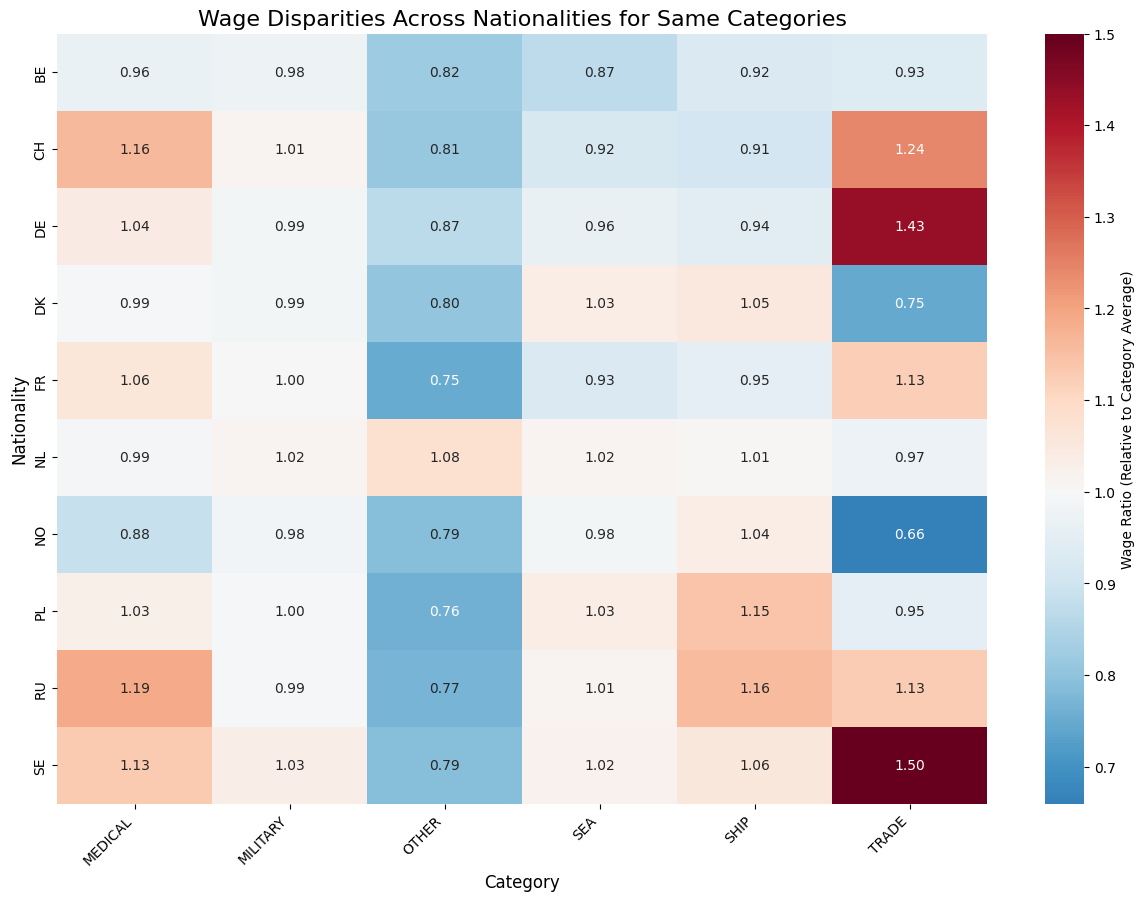

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Add country/nationality information (using country_code from places data)
# For better grouping, we may want to standardize country information
if 'country_code' in df_contracts_ranks_places_standardized.columns:
    # Use country_code as nationality
    df_contracts_ranks_places_standardized['nationality'] = df_contracts_ranks_places_standardized['country_code']

# 1. Wage Analysis by Nationality for Same Rank
def analyze_wages_by_nationality():
    """
    Compare wages across nationalities for the same ranks to identify potential wage discrimination
    """
    # Group by rank and nationality, calculate mean wage
    if 'median_wage' in df_contracts_ranks_places_standardized.columns and 'nationality' in df_contracts_ranks_places_standardized.columns:
        # Focus on ranks with significant representation across multiple nationalities
        # Find ranks that have employees from multiple countries
        rank_nationality_counts = df_contracts_ranks_places_standardized.groupby('category')['nationality'].nunique()
        diverse_ranks = rank_nationality_counts[rank_nationality_counts > 2].index
        
        # Filter for these diverse ranks
        diverse_df = df_contracts_ranks_places_standardized[df_contracts_ranks_places_standardized['category'].isin(diverse_ranks)]
        
        # Group by nationality and rank
        nationality_rank_wages = diverse_df.groupby(['nationality', 'category'])['median_wage'].mean().reset_index()
        
        # Get the top nationalities by count for better readability
        top_nationalities = diverse_df['nationality'].value_counts().nlargest(10).index
        filtered_data = nationality_rank_wages[nationality_rank_wages['nationality'].isin(top_nationalities)]
        
        # Normalize wages against average for each rank to show relative differences
        rank_avg_wages = diverse_df.groupby('category')['median_wage'].mean().to_dict()
        filtered_data['category_avg_wage'] = filtered_data['category'].map(rank_avg_wages)
        filtered_data['wage_ratio'] = filtered_data['median_wage'] / filtered_data['category_avg_wage']
        
        # Create the visualization
        plt.figure(figsize=(15, 10))
        
        # Plot wage ratio heatmap
        pivot_data = filtered_data.pivot(index='nationality', columns='category', values='wage_ratio')
        
        # Fill NAs and clip extreme values for better visualization
        pivot_data = pivot_data.fillna(1.0).clip(0.5, 1.5)
        
        # Plot heatmap
        sns.heatmap(pivot_data, cmap="RdBu_r", center=1.0, 
                    annot=True, fmt=".2f", cbar_kws={'label': 'Wage Ratio (Relative to Category Average)'})
        
        plt.title('Wage Disparities Across Nationalities for Same Categories', fontsize=16)
        plt.xlabel('Category', fontsize=12)
        plt.ylabel('Nationality', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        
        return plt
    else:
        return "Required wage or nationality data not available"
    
analyze_wages_by_nationality()
plt.show()

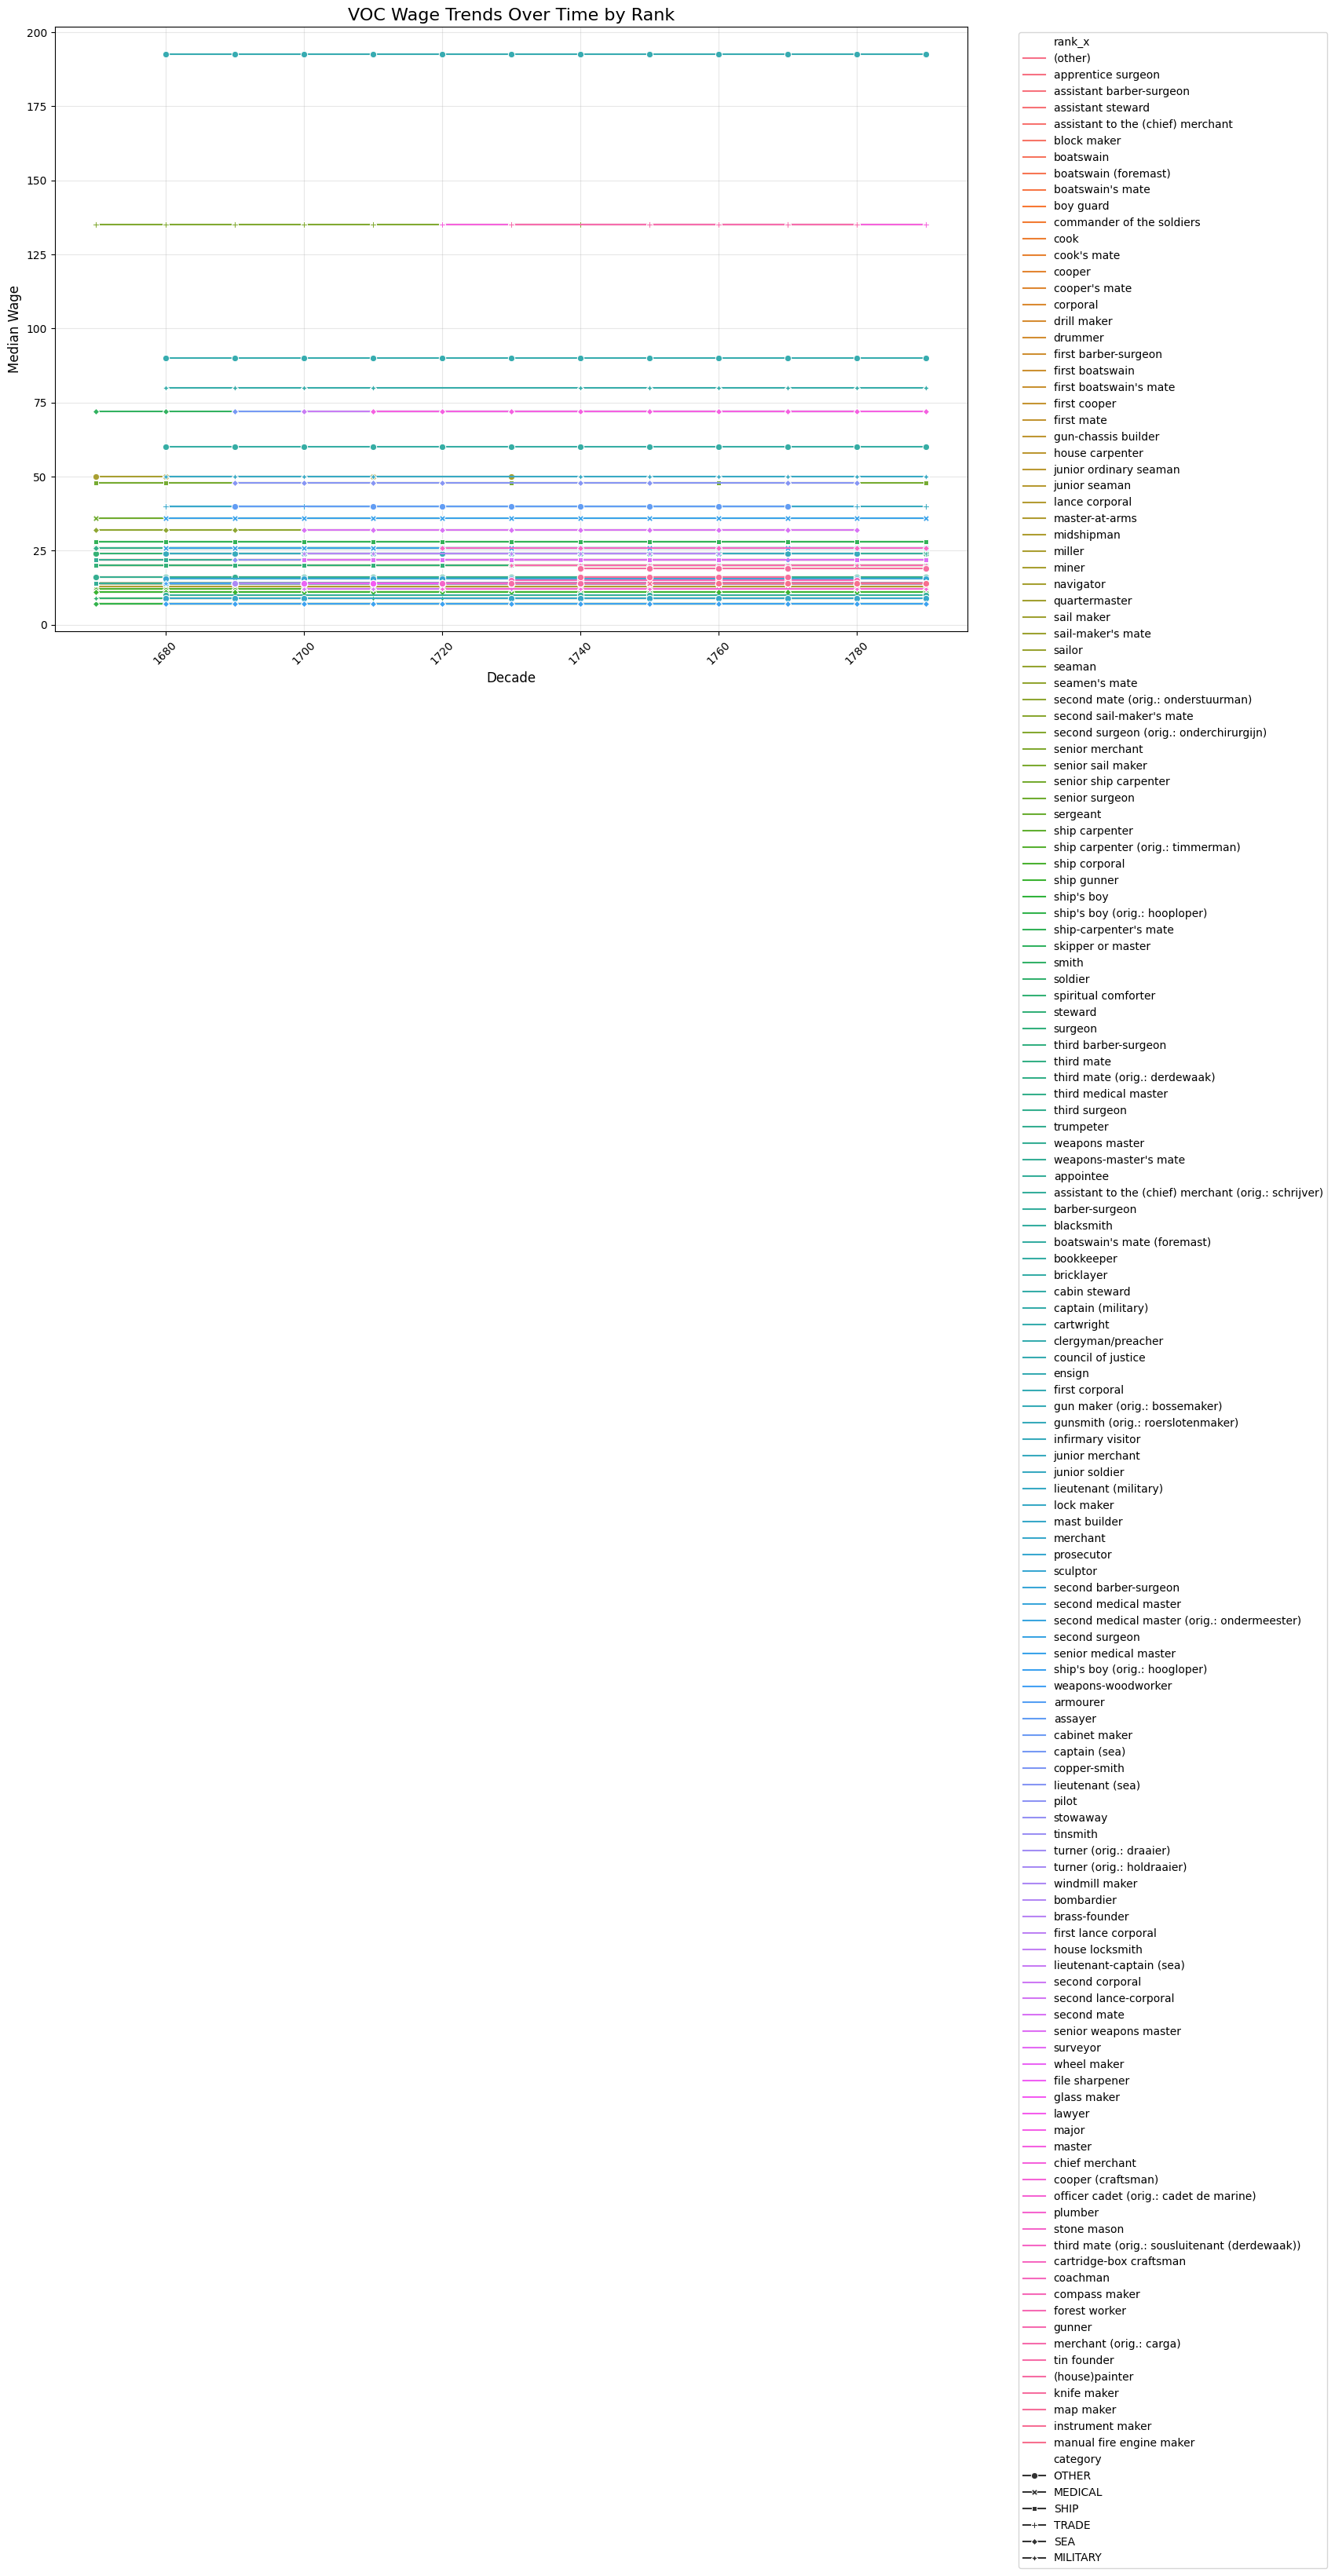

In [109]:
# 2. Wage Trend Analysis Over Time by Rank
def analyze_wage_trends_over_time():
    """
    Track how wages for the same rank changed over time
    """
    if 'median_wage' in df_contracts_ranks_places_standardized.columns and 'decade' in df_contracts_ranks_places_standardized.columns:
        # Focus on ranks with long history for meaningful trends
        # Group by decade and rank
        time_rank_wages = df_contracts_ranks_places_standardized.groupby(['decade', 'rank_x', 'category'])['median_wage'].mean().reset_index()
        
        # Filter to ranks with data across multiple decades
        rank_decade_counts = df_contracts_ranks_places_standardized.groupby('rank_x')['decade'].nunique()
        historical_ranks = rank_decade_counts[rank_decade_counts > 3].index
        
        # Filter for these historical ranks
        historical_df = time_rank_wages[time_rank_wages['rank_x'].isin(historical_ranks)]
        
        # Create the visualization - line chart showing wage trends over time
        plt.figure(figsize=(15, 10))
        
        # Plot multiple lines, one for each rank
        sns.lineplot(data=historical_df, x='decade', y='median_wage', hue='rank_x', 
                    style='category', markers=True, dashes=False)
        
        plt.title('VOC Wage Trends Over Time by Rank', fontsize=16)
        plt.xlabel('Decade', fontsize=12)
        plt.ylabel('Median Wage', fontsize=12)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        
        # Adjust legend for readability
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        return plt
    else:
        return "Required temporal wage data not available"

analyze_wage_trends_over_time()
plt.savefig('wage_trends_over_time.png')

In [120]:
# 3. Interactive Wage Comparison Dashboard
def create_wage_comparison_dashboard():
    """
    Create an interactive dashboard to compare wages across nationalities and time periods
    """
    # Create a subplot figure
    fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=(
        'Wage Distribution by Nationality', 
        'Nationality Wage Gap Over Time'
    ),
    specs=[
        [{"type": "box"}],
        [{"type": "scatter"}]
    ]
)
    
    # Panel 1: Box plot of wage distribution by nationality
    top_nationalities = df_contracts_ranks_places_standardized['nationality'].value_counts().nlargest(8).index
    nationality_data = df_contracts_ranks_places_standardized[df_contracts_ranks_places_standardized['nationality'].isin(top_nationalities)]
    
    for i, nationality in enumerate(top_nationalities):
        nat_data = nationality_data[nationality_data['nationality'] == nationality]
        fig.add_trace(
            go.Box(
                y=nat_data['median_wage'],
                name=nationality,
                boxpoints='outliers'
            ),
            row=1, col=1
        )
    
    
    # Panel 2: Line chart of nationality wage gaps over time
    if 'decade' in df_contracts_ranks_places_standardized.columns:
        # Calculate average wage by nationality and decade
        nat_time_wages = df_contracts_ranks_places_standardized.groupby(['decade', 'nationality'])['median_wage'].mean().reset_index()
        
        # Calculate overall average wage by decade
        decade_avg = df_contracts_ranks_places_standardized.groupby('decade')['median_wage'].mean().reset_index()
        decade_avg_dict = dict(zip(decade_avg['decade'], decade_avg['median_wage']))
        
        # Calculate relative wage (compared to decade average)
        nat_time_wages['decade_avg'] = nat_time_wages['decade'].map(decade_avg_dict)
        nat_time_wages['wage_ratio'] = nat_time_wages['median_wage'] / nat_time_wages['decade_avg']
        
        # Filter for top nationalities only
        nat_time_filtered = nat_time_wages[nat_time_wages['nationality'].isin(top_nationalities)]
        
        # Add a line for each nationality
        for nationality in top_nationalities:
            nat_data = nat_time_filtered[nat_time_filtered['nationality'] == nationality]
            if not nat_data.empty:
                fig.add_trace(
                    go.Scatter(
                        x=nat_data['decade'],
                        y=nat_data['wage_ratio'],
                        mode='lines+markers',
                        name=nationality,
                        line=dict(width=2)
                    ),
                    row=2, col=1
                )
    
    
    # Update layout
    fig.update_layout(
        height=800,
        width=1200,
        title_text="VOC Wage Analysis Dashboard",
        showlegend=False,
    )
    
    # Update axes labels
    fig.update_xaxes(title_text="Nationality", row=1, col=1)
    fig.update_yaxes(title_text="Median Wage", row=1, col=1)
    
    fig.update_xaxes(title_text="Decade", row=2, col=1)
    fig.update_yaxes(title_text="Wage Ratio (vs. Overall Average)", row=2, col=1)
    
    return fig

In [121]:
dashboard = create_wage_comparison_dashboard()
dashboard.write_html('voc_wage_dashboard.html')